In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
%matplotlib inline

In [41]:
dataset_ATR = pd.read_csv('../../indata/ATR_203_20230328.csv', sep=',')
dataset_ATR.head()

C:\Users\USER88~1\AppData\Local\Temp/ipykernel_19520/547998309.py:1: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_ATR = pd.read_csv('../../indata/ATR_203_20230328.csv', sep=',')


Trafikföretag  Trafikföretagsnr  Linje  Estimated       Datum  \
0  Nobina Linköping              9205    203          1  2020-06-15   
1  Nobina Linköping              9205    203          1  2020-06-15   
2  Nobina Linköping              9205    203          1  2020-06-15   
3  Nobina Linköping              9205    203          1  2020-06-15   
4  Nobina Linköping              9205    203          1  2020-06-15   

              Tidpunkt Hållplatstid  Timme Halvtimme     Kvart  ...  \
0  2020-06-15 05:24:55        05:24    5.0  05:00:00  05:15:00  ...   
1  2020-06-15 05:43:00        05:43    5.0  05:30:00  05:30:00  ...   
2  2020-06-15 05:40:52        05:40    5.0  05:30:00  05:30:00  ...   
3  2020-06-15 05:23:00        05:23    5.0  05:00:00  05:15:00  ...   
4  2020-06-15 04:49:07        04:49    4.0  04:30:00  04:45:00  ...   

   Hållplatsläge      StopPointGID  Hållplatsnr  Omlopp Påstigande  \
0              A  9022005001243001         1243     503        1.0   
1              A  9022005000219001          219     503        0.0   
2              B  9022005001338002         1338     503        0.0   
3             A5  9022005000050005           50     503        1.0   
4              A  9022005001338001         1338     503        1.0   

   Avstigande  Ombord Passagerare sittande Beläggning  Beläggning turer  
0         0.0     2.0          Okänt antal        NaN               NaN  
1         0.0     0.0          Okänt antal        NaN               NaN  
2         2.0     0.0          Okänt antal        NaN               NaN  
3         0.0     1.0          Okänt antal        NaN               NaN  
4         0.0     6.0          Okänt antal        NaN               NaN  

[5 rows x 28 columns]

In [42]:
current_line = dataset_ATR.iloc[0]['Linje']
current_line

203

In [43]:
# Filtrera bort de parametrar som inte har relevans 
# Centrala parametrar: tur, linje, sträcka (hållplatser)
dataset_ATR_selection = dataset_ATR[['SequenceInJourney', 'JourneyGID', 'VehicleGID', 'Hållplatsnamn', 'Datum', 'Tidpunkt', 'Avg.tid', 'Ombord']]
dataset_ATR_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543490 entries, 0 to 1543489
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   SequenceInJourney  1543490 non-null  int64  
 1   JourneyGID         1543490 non-null  int64  
 2   VehicleGID         1531095 non-null  float64
 3   Hållplatsnamn      1543490 non-null  object 
 4   Datum              1543490 non-null  object 
 5   Tidpunkt           1529693 non-null  object 
 6   Avg.tid            1543490 non-null  object 
 7   Ombord             1529693 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 94.2+ MB


In [44]:
dataset_ATR_selection = dataset_ATR_selection.dropna()

In [154]:
selected_GID = 9015005020300031

In [155]:
# Filtrera på en JourneyGID
filter_journeyGID = dataset_ATR_selection['JourneyGID'] == selected_GID
data_filter_journeyGID = dataset_ATR_selection.loc[filter_journeyGID]
data_filter_journeyGID.head()

SequenceInJourney        JourneyGID    VehicleGID  \
277                  9  9015005020300031  9.031006e+15   
278                  1  9015005020300031  9.031006e+15   
279                  3  9015005020300031  9.031006e+15   
280                  8  9015005020300031  9.031006e+15   
281                 14  9015005020300031  9.031006e+15   

               Hållplatsnamn       Datum             Tidpunkt Avg.tid  Ombord  
277              Ryd centrum  2020-06-15  2020-06-15 11:00:52   10:43     5.0  
278   Linköpings resecentrum  2020-06-15  2020-06-15 10:43:43   10:43     7.0  
279          Trädgårdstorget  2020-06-15  2020-06-15 10:47:18   10:43     8.0  
280                  Solhaga  2020-06-15  2020-06-15 10:58:35   10:43     7.0  
281  Rydsvägens ändhållplats  2020-06-15  2020-06-15 11:06:59   10:43     2.0

In [156]:
dataset_ATR_selection_avg_tid = data_filter_journeyGID.groupby('Avg.tid').mean().index.values.tolist()
dataset_ATR_selection_avg_tid

['08:43', '10:43']

In [157]:
list_gids = dataset_ATR_selection.groupby('JourneyGID').mean().index.values.tolist()

In [158]:
for i in range(0, len(list_gids)):
    if list_gids[i] == selected_GID:
        print('This is the index you are looking for: ', i)

This is the index you are looking for:  30


In [159]:
# Filtrera på en Avgångstid
avg_tid = dataset_ATR_selection_avg_tid[0]
filter_journeyAVGtid = data_filter_journeyGID['Avg.tid'] == avg_tid
data_filter_journeyAVGtid = data_filter_journeyGID.loc[filter_journeyAVGtid]
data_filter_journeyAVGtid.head()

SequenceInJourney        JourneyGID    VehicleGID  \
59030                  6  9015005020300031  9.031006e+15   
59031                  7  9015005020300031  9.031006e+15   
59032                  9  9015005020300031  9.031006e+15   
59034                  8  9015005020300031  9.031006e+15   
59035                 14  9015005020300031  9.031006e+15   

                 Hållplatsnamn       Datum             Tidpunkt Avg.tid  \
59030                Vallaplan  2020-08-18  2020-08-18 08:57:23   08:43   
59031          Gamla Linköping  2020-08-18  2020-08-18 08:58:40   08:43   
59032              Ryd centrum  2020-08-18  2020-08-18 09:03:16   08:43   
59034                  Solhaga  2020-08-18  2020-08-18 09:00:49   08:43   
59035  Rydsvägens ändhållplats  2020-08-18  2020-08-18 08:39:47   08:43   

       Ombord  
59030     1.0  
59031     0.0  
59032    -4.0  
59034    -1.0  
59035    -6.0

In [166]:
def day_detector(data_filter_journeyAVGtid):
    list_dates = data_filter_journeyAVGtid.groupby('Datum').mean().index.values.tolist()
    day_array = []
    for i in range(0, len(list_dates)):
        datetime_object = datetime.strptime(list_dates[i], '%Y-%m-%d')
        day_array.append(datetime_object.weekday())
    first_day = min(day_array)
    last_day = max(day_array)
    first_position = 0
    for i in range(0, len(day_array)):
        if day_array[i] == 0:
            first_position = i
            break
    set_of_days = []
    for i in range(first_position, len(day_array)):
        print(day_array[i])
        set_of_days.append(day_array[i])
        if day_array[i] == last_day:
            break
    return set_of_days

In [167]:
set_of_days = day_detector(data_filter_journeyAVGtid)
set_of_days

0
1
2
3
4


[0, 1, 2, 3, 4]

In [168]:
# Hitta de index med maximal sekvens
index_max = data_filter_journeyAVGtid[['SequenceInJourney']].idxmax()
data_filter_journeyAVGtid.iloc[3]

SequenceInJourney                      8
JourneyGID              9015005020300031
VehicleGID            9031005920505688.0
Hållplatsnamn                    Solhaga
Datum                         2020-08-18
Tidpunkt             2020-08-18 09:00:49
Avg.tid                            08:43
Ombord                              -1.0
Name: 59034, dtype: object

In [170]:
sequenceJourneys = data_filter_journeyAVGtid.groupby('Hållplatsnamn').mean().sort_values(by=['SequenceInJourney'])['SequenceInJourney']
sequenceJourneys

Hållplatsnamn
Linköpings resecentrum      1.000000
Kungsgatan                  2.000000
Stora Torget                2.982422
Trädgårdstorget             3.000000
Barnhemsgatan               3.989286
Parkgatan                   4.979769
Vallaplan                   5.977876
Gamla Linköping             6.981481
Solhaga                     7.983213
Ryd centrum                 8.985743
Mårdtorpsgatan              9.990826
Hangaren                   10.992424
Alsättersgatan             11.985507
Björnkärrsskolan           12.993151
Rydsvägens ändhållplats    13.982425
Name: SequenceInJourney, dtype: float64

In [171]:
stop_names = data_filter_journeyAVGtid.groupby('Hållplatsnamn').mean().sort_values(by=['SequenceInJourney']).index.values.tolist()
stop_names

['Linköpings resecentrum',
 'Kungsgatan',
 'Stora Torget',
 'Trädgårdstorget',
 'Barnhemsgatan',
 'Parkgatan',
 'Vallaplan',
 'Gamla Linköping',
 'Solhaga',
 'Ryd centrum',
 'Mårdtorpsgatan',
 'Hangaren',
 'Alsättersgatan',
 'Björnkärrsskolan',
 'Rydsvägens ändhållplats']

In [172]:
sequenceJourneys = data_filter_journeyAVGtid.groupby('SequenceInJourney').mean().index.values.tolist()
max_sequence = sequenceJourneys[-1]
max_sequence

14

In [173]:
if len(stop_names) > max_sequence:
    for i in range(0, len(sequenceJourneys)-1):
        if sequenceJourneys[i+1] - sequenceJourneys[i] == 0:
            stop_names.pop(i+1)
stop_names

['Linköpings resecentrum',
 'Kungsgatan',
 'Stora Torget',
 'Trädgårdstorget',
 'Barnhemsgatan',
 'Parkgatan',
 'Vallaplan',
 'Gamla Linköping',
 'Solhaga',
 'Ryd centrum',
 'Mårdtorpsgatan',
 'Hangaren',
 'Alsättersgatan',
 'Björnkärrsskolan',
 'Rydsvägens ändhållplats']

In [174]:
data_filter_journeyAVGtid_sorted = data_filter_journeyAVGtid.sort_values(by=['Tidpunkt'])
data_filter_journeyAVGtid_sorted.head(10)

SequenceInJourney        JourneyGID    VehicleGID  \
59035                 14  9015005020300031  9.031006e+15   
59038                 14  9015005020300031  9.031006e+15   
59030                  6  9015005020300031  9.031006e+15   
59031                  7  9015005020300031  9.031006e+15   
59034                  8  9015005020300031  9.031006e+15   
59032                  9  9015005020300031  9.031006e+15   
60716                  1  9015005020300031  9.031006e+15   
60711                  2  9015005020300031  9.031006e+15   
60715                  3  9015005020300031  9.031006e+15   
60710                  5  9015005020300031  9.031006e+15   

                 Hållplatsnamn       Datum             Tidpunkt Avg.tid  \
59035  Rydsvägens ändhållplats  2020-08-18  2020-08-18 08:39:47   08:43   
59038  Rydsvägens ändhållplats  2020-08-18  2020-08-18 08:39:47   08:43   
59030                Vallaplan  2020-08-18  2020-08-18 08:57:23   08:43   
59031          Gamla Linköping  2020-08-18  2020-08-18 08:58:40   08:43   
59034                  Solhaga  2020-08-18  2020-08-18 09:00:49   08:43   
59032              Ryd centrum  2020-08-18  2020-08-18 09:03:16   08:43   
60716   Linköpings resecentrum  2020-08-19  2020-08-19 08:44:54   08:43   
60711               Kungsgatan  2020-08-19  2020-08-19 08:47:27   08:43   
60715             Stora Torget  2020-08-19  2020-08-19 08:51:53   08:43   
60710                Parkgatan  2020-08-19  2020-08-19 08:54:45   08:43   

       Ombord  
59035    -6.0  
59038    -2.0  
59030     1.0  
59031     0.0  
59034    -1.0  
59032    -4.0  
60716     5.0  
60711     6.0  
60715     8.0  
60710     6.0

In [176]:
saved_rows = []
counter = 0
for i in range(0, len(data_filter_journeyAVGtid_sorted)):
    this_value = data_filter_journeyAVGtid_sorted.iloc[i]['SequenceInJourney']
    for j in range(counter, len(sequenceJourneys)):
        if this_value == sequenceJourneys[j]:
            saved_rows.append(data_filter_journeyAVGtid_sorted.iloc[i])
            #print(str(sequenceJourneys[j]) + ' --> This one exsists! :)')
            counter = counter + 1
            if counter == max_sequence:
                #print('Restet counter...')
                counter = 0
                j = 0
            break
        else:
            #print(str(sequenceJourneys[j]) + ' --> ADD')
            new_row = data_filter_journeyAVGtid_sorted.iloc[i].copy()
            new_row['SequenceInJourney'] = sequenceJourneys[j]
            new_row['Hållplatsnamn'] = stop_names[counter]
            saved_rows.append(new_row)
            counter = counter + 1
            if counter == max_sequence:
                #print('Resetet counter...')
                counter = 0
            j = 0     

In [177]:
df_train_set = pd.DataFrame(saved_rows).reset_index(drop=True)
df_train_set.head()

SequenceInJourney        JourneyGID    VehicleGID           Hållplatsnamn  \
0                  1  9015005020300031  9.031006e+15  Linköpings resecentrum   
1                  2  9015005020300031  9.031006e+15              Kungsgatan   
2                  3  9015005020300031  9.031006e+15            Stora Torget   
3                  4  9015005020300031  9.031006e+15         Trädgårdstorget   
4                  5  9015005020300031  9.031006e+15           Barnhemsgatan   

        Datum             Tidpunkt Avg.tid  Ombord  
0  2020-08-18  2020-08-18 08:39:47   08:43    -6.0  
1  2020-08-18  2020-08-18 08:39:47   08:43    -6.0  
2  2020-08-18  2020-08-18 08:39:47   08:43    -6.0  
3  2020-08-18  2020-08-18 08:39:47   08:43    -6.0  
4  2020-08-18  2020-08-18 08:39:47   08:43    -6.0

In [226]:
df_train_set.tail()

SequenceInJourney        JourneyGID    VehicleGID  \
7989                 10  9015005020300031  9.031006e+15   
7990                 11  9015005020300031  9.031006e+15   
7991                 12  9015005020300031  9.031006e+15   
7992                 13  9015005020300031  9.031006e+15   
7993                 14  9015005020300031  9.031006e+15   

                Hållplatsnamn       Datum             Tidpunkt Avg.tid  Ombord  
7989              Ryd centrum  2023-03-24  2023-03-24 09:02:19   08:43     3.0  
7990                 Hangaren  2023-03-24  2023-03-24 09:02:19   08:43     3.0  
7991                 Hangaren  2023-03-24  2023-03-24 09:03:34   08:43     2.0  
7992         Björnkärrsskolan  2023-03-24  2023-03-24 09:03:34   08:43     2.0  
7993  Rydsvägens ändhållplats  2023-03-24  2023-03-24 09:06:31   08:43     1.0

In [271]:
datetime_before_last = datetime.strptime(idx_before_last, '%Y-%m-%d %H:%M:%S')
datetime_last = datetime.strptime(idx_last, '%Y-%m-%d %H:%M:%S')
print(datetime_before_last)
print(datetime_last)

2023-03-23 08:43:16
2023-03-24 08:43:30


In [272]:
datetime_before_last.weekday()

3

In [273]:
datetime_last.weekday()

4

In [274]:
next_day = 0
for i in range(0, len(set_of_days)):
    if set_of_days[i] == datetime_last.weekday():
        print(set_of_days)
        next_day = (i+1) % len(set_of_days)
next_day

[0, 1, 2, 3, 4]


0

In [275]:
from datetime import timedelta
for i in range(0, 6):
    td = timedelta(days=i)
    last_date = datetime_last.date()
    next_date = datetime_last.date() + td
    if next_date.weekday() == next_day:
        break
next_date

datetime.date(2023, 3, 27)

last_datetime = df_train_set.iloc[-1]['Tidpunkt']
last_stop = df_train_set.iloc[-1]['SequenceInJourney']
pd_last_datetime = pd.to_datetime(last_datetime)
pd_last_datetime

In [276]:
first_one = df_train_set.index[df_train_set['SequenceInJourney'] == 1].tolist()[0]
first_one

0

In [277]:
time_serie_one_tour = df_train_set[first_one:first_one+max_sequence]['Tidpunkt']
time_serie_one_tour

0     2020-08-18 08:39:47
1     2020-08-18 08:39:47
2     2020-08-18 08:39:47
3     2020-08-18 08:39:47
4     2020-08-18 08:39:47
5     2020-08-18 08:39:47
6     2020-08-18 08:39:47
7     2020-08-18 08:39:47
8     2020-08-18 08:39:47
9     2020-08-18 08:39:47
10    2020-08-18 08:39:47
11    2020-08-18 08:39:47
12    2020-08-18 08:39:47
13    2020-08-18 08:39:47
Name: Tidpunkt, dtype: object

In [278]:
date_time = pd.to_datetime(time_serie_one_tour)
date_time

0    2020-08-18 08:39:47
1    2020-08-18 08:39:47
2    2020-08-18 08:39:47
3    2020-08-18 08:39:47
4    2020-08-18 08:39:47
5    2020-08-18 08:39:47
6    2020-08-18 08:39:47
7    2020-08-18 08:39:47
8    2020-08-18 08:39:47
9    2020-08-18 08:39:47
10   2020-08-18 08:39:47
11   2020-08-18 08:39:47
12   2020-08-18 08:39:47
13   2020-08-18 08:39:47
Name: Tidpunkt, dtype: datetime64[ns]

In [279]:
# Detect a time serie for one tour
date_time_forcast = []
for i in range(0, len(date_time)):
    date_time_forcast.append(pd.to_datetime(last_datetime[0:10] + ' ' + str(date_time.iloc[i].time())))
date_time_forcast

[Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47'),
 Timestamp('2023-03-24 08:39:47')]

In [280]:
from datetime import timedelta
date_forcast = []
last_day = pd_last_datetime.date()
stops_forcast = []
sequence = []
journeyGID = []
avgtid = []
for i in range(1, 6):   
    for j in range(0, len(time_serie_one_tour)):
        td = timedelta(days=difference_tour_days) 
        test = pd.to_datetime(str(next_date) + ' ' + str(date_time_forcast[j].time()))
        if next_date.weekday() < set_of_days[-1]:
            date_forcast.append(test)
            stops_forcast.append(stop_names[j])
            sequence.append(j+1)
            journeyGID.append(selected_GID)
            avgtid.append(avg_tid)    
    next_date = next_date + td
    last_day = next_date

Weekend:  5


In [281]:
df_result_forcats = pd.DataFrame(list(zip(sequence, journeyGID, avgtid, date_forcast, stops_forcast)),
               columns =['SequenceInJourney', 'JourneyGID', 'Avg.tid', 'Tidpunkt', 'Hållplatsnamn'])
df_result_forcats

SequenceInJourney        JourneyGID Avg.tid            Tidpunkt  \
0                   1  9015005020300031   08:43 2023-03-27 08:39:47   
1                   2  9015005020300031   08:43 2023-03-27 08:39:47   
2                   3  9015005020300031   08:43 2023-03-27 08:39:47   
3                   4  9015005020300031   08:43 2023-03-27 08:39:47   
4                   5  9015005020300031   08:43 2023-03-27 08:39:47   
..                ...               ...     ...                 ...   
65                 10  9015005020300031   08:43 2023-03-31 08:39:47   
66                 11  9015005020300031   08:43 2023-03-31 08:39:47   
67                 12  9015005020300031   08:43 2023-03-31 08:39:47   
68                 13  9015005020300031   08:43 2023-03-31 08:39:47   
69                 14  9015005020300031   08:43 2023-03-31 08:39:47   

             Hållplatsnamn  
0   Linköpings resecentrum  
1               Kungsgatan  
2             Stora Torget  
3          Trädgårdstorget  
4            Barnhemsgatan  
..                     ...  
65             Ryd centrum  
66          Mårdtorpsgatan  
67                Hangaren  
68          Alsättersgatan  
69        Björnkärrsskolan  

[70 rows x 5 columns]

In [263]:
def plot_passengersOnboard(dataset, param, journeGID):
    
    # Visualising the results      
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    fig.autofmt_xdate(rotation=45)
    ax.plot(dataset[param].values)
    ax.grid(True)

    title = 'Passagerare ' + param + ' journeGID ' + str(journeGID)
    plt.title(title)
    #plt.xlabel(dataset['Tidpunkt'].values)
    plt.ylabel('Antal Passagerare')

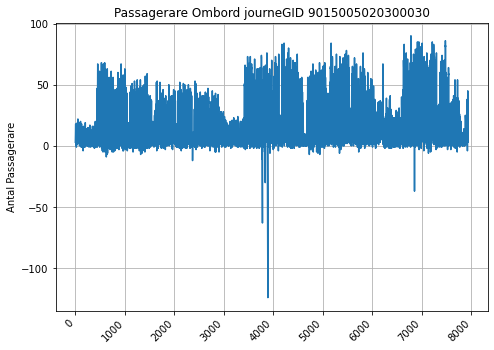

In [92]:
plot_passengersOnboard(data_journeyGID_sorted, 'Ombord', selected_GID)

In [93]:
# Adjustment 1 - inga påstigande vid endstation
for i, j in data_journeyGID_sorted.iterrows():
    if j.SequenceInJourney == max_sequence:
        data_journeyGID_sorted._set_value(i,'Ombord', 0.0)
data_journeyGID_sorted.head()

SequenceInJourney        JourneyGID    VehicleGID  \
272                  1  9015005020300030  9.031006e+15   
269                  4  9015005020300030  9.031006e+15   
273                  5  9015005020300030  9.031006e+15   
270                  6  9015005020300030  9.031006e+15   
266                  7  9015005020300030  9.031006e+15   

               Hållplatsnamn             Tidpunkt Avg.tid  Ombord  Påstigande  \
272  Rydsvägens ändhållplats  2020-06-15 09:36:36   09:36     3.0         3.0   
269            Rydsvägen 236  2020-06-15 09:38:58   09:36     6.0         3.0   
273           Mårdtorpsgatan  2020-06-15 09:41:04   09:36     8.0         2.0   
270              Ryd centrum  2020-06-15 09:42:47   09:36    17.0         9.0   
266                  Solhaga  2020-06-15 09:44:32   09:36    18.0         1.0   

     Avstigande  
272         1.0  
269         0.0  
273         0.0  
270         0.0  
266         0.0

In [94]:
# Adjustment 2 - ta bort rader med värde Ombord < 0 som icke är vid endstationer
for i, j in data_journeyGID_sorted.iterrows():
    if (j.SequenceInJourney != max_sequence) and (j.SequenceInJourney != min_sequence):
        if j.Ombord < 0:
            data_journeyGID_sorted._set_value(i,'Ombord', 0.0)
data_journeyGID_sorted.head()

SequenceInJourney        JourneyGID    VehicleGID  \
272                  1  9015005020300030  9.031006e+15   
269                  4  9015005020300030  9.031006e+15   
273                  5  9015005020300030  9.031006e+15   
270                  6  9015005020300030  9.031006e+15   
266                  7  9015005020300030  9.031006e+15   

               Hållplatsnamn             Tidpunkt Avg.tid  Ombord  Påstigande  \
272  Rydsvägens ändhållplats  2020-06-15 09:36:36   09:36     3.0         3.0   
269            Rydsvägen 236  2020-06-15 09:38:58   09:36     6.0         3.0   
273           Mårdtorpsgatan  2020-06-15 09:41:04   09:36     8.0         2.0   
270              Ryd centrum  2020-06-15 09:42:47   09:36    17.0         9.0   
266                  Solhaga  2020-06-15 09:44:32   09:36    18.0         1.0   

     Avstigande  
272         1.0  
269         0.0  
273         0.0  
270         0.0  
266         0.0

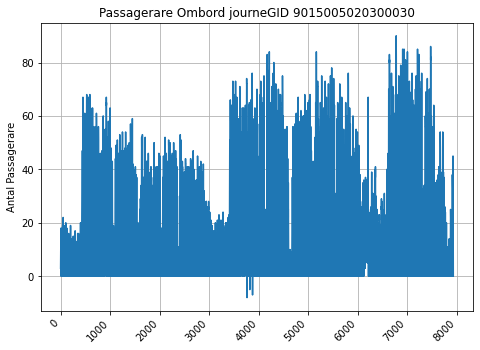

In [95]:
plot_passengersOnboard(data_journeyGID_sorted, 'Ombord', selected_GID)

In [99]:
data_journeyGID_sorted = data_journeyGID_sorted.reset_index(drop=True)
data_journeyGID_sorted.tail(50)

SequenceInJourney        JourneyGID    VehicleGID  \
7885                 14  9015005020300030  9.031006e+15   
7886                  1  9015005020300030  9.031006e+15   
7887                  6  9015005020300030  9.031006e+15   
7888                  7  9015005020300030  9.031006e+15   
7889                  8  9015005020300030  9.031006e+15   
7890                  9  9015005020300030  9.031006e+15   
7891                 10  9015005020300030  9.031006e+15   
7892                 11  9015005020300030  9.031006e+15   
7893                 12  9015005020300030  9.031006e+15   
7894                 13  9015005020300030  9.031006e+15   
7895                 14  9015005020300030  9.031006e+15   
7896                  1  9015005020300030  9.031006e+15   
7897                  2  9015005020300030  9.031006e+15   
7898                  4  9015005020300030  9.031006e+15   
7899                  6  9015005020300030  9.031006e+15   
7900                  7  9015005020300030  9.031006e+15   
7901                  8  9015005020300030  9.031006e+15   
7902                  9  9015005020300030  9.031006e+15   
7903                 10  9015005020300030  9.031006e+15   
7904                 11  9015005020300030  9.031006e+15   
7905                 12  9015005020300030  9.031006e+15   
7906                 13  9015005020300030  9.031006e+15   
7907                 14  9015005020300030  9.031006e+15   
7908                  1  9015005020300030  9.031006e+15   
7909                  2  9015005020300030  9.031006e+15   
7910                  3  9015005020300030  9.031006e+15   
7911                  4  9015005020300030  9.031006e+15   
7912                  5  9015005020300030  9.031006e+15   
7913                  6  9015005020300030  9.031006e+15   
7914                  7  9015005020300030  9.031006e+15   
7915                  8  9015005020300030  9.031006e+15   
7916                  9  9015005020300030  9.031006e+15   
7917                 10  9015005020300030  9.031006e+15   
7918                 11  9015005020300030  9.031006e+15   
7919                 12  9015005020300030  9.031006e+15   
7920                 13  9015005020300030  9.031006e+15   
7921                 14  9015005020300030  9.031006e+15   
7922                  1  9015005020300030  9.031006e+15   
7923                  2  9015005020300030  9.031006e+15   
7924                  3  9015005020300030  9.031006e+15   
7925                  4  9015005020300030  9.031006e+15   
7926                  5  9015005020300030  9.031006e+15   
7927                  6  9015005020300030  9.031006e+15   
7928                  7  9015005020300030  9.031006e+15   
7929                  8  9015005020300030  9.031006e+15   
7930                 10  9015005020300030  9.031006e+15   
7931                 11  9015005020300030  9.031006e+15   
7932                 12  9015005020300030  9.031006e+15   
7933                 13  9015005020300030  9.031006e+15   
7934                 14  9015005020300030  9.031006e+15   

                Hållplatsnamn             Tidpunkt Avg.tid  Ombord  \
7885   Linköpings resecentrum  2023-01-05 08:00:22   07:37     0.0   
7886  Rydsvägens ändhållplats  2023-01-09 07:38:01   07:37     5.0   
7887              Ryd centrum  2023-01-09 07:44:12   07:37    11.0   
7888                  Solhaga  2023-01-09 07:46:18   07:37    14.0   
7889          Gamla Linköping  2023-01-09 07:49:38   07:37    15.0   
7890                Vallaplan  2023-01-09 07:51:33   07:37    16.0   
7891                Parkgatan  2023-01-09 07:52:36   07:37    14.0   
7892            Barnhemsgatan  2023-01-09 07:54:58   07:37    10.0   
7893             Stora Torget  2023-01-09 07:57:34   07:37     6.0   
7894               Kungsgatan  2023-01-09 07:59:31   07:37     4.0   
7895   Linköpings resecentrum  2023-01-09 08:02:17   07:37     0.0   
7896  Rydsvägens ändhållplats  2023-01-10 07:38:48   07:37     7.0   
7897         Björnkärrsskolan  2023-01-10 07:39:52   07:37     9.0   
7898            

In [122]:
len_pred = 2500
last_position = data_journeyGID_sorted.iloc[-len_pred]
last_position

SequenceInJourney                      4
JourneyGID              9015005020300030
VehicleGID            9031005920505670.0
Hållplatsnamn                   Hangaren
Tidpunkt             2022-03-30 07:41:54
Avg.tid                            07:37
Ombord                              32.0
Påstigande                           3.0
Avstigande                           0.0
Name: 949955, dtype: object

In [20]:
data_ai = data_journeyGID_sorted['Ombord'].values.reshape(-1, 1)
data_ai

array([[ 3.],
       [ 6.],
       [ 8.],
       ...,
       [12.],
       [ 9.],
       [ 0.]])

In [21]:
# Scaling the training_set (use standardisation or normalization)
# Since our output signal is continous (sigmoid function)
# --> NORMALIZATION is recommended
from sklearn.preprocessing import MinMaxScaler

# Implement a scaler with value (range) between 0 and 1
scaler = MinMaxScaler()

In [22]:
# Apply scaler in training set
training_set_scaled = scaler.fit_transform(data_ai)
training_set_scaled

array([[0.1122449 ],
       [0.14285714],
       [0.16326531],
       ...,
       [0.20408163],
       [0.17346939],
       [0.08163265]])

In [23]:
# Convert series to supervised learning - input predicting pollution outputs
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [24]:
# Frame as supervised learning
supervised_data = series_to_supervised(training_set_scaled, 1, 1)
supervised_data

var1(t-1)   var1(t)
1      0.112245  0.142857
2      0.142857  0.163265
3      0.163265  0.255102
4      0.255102  0.265306
5      0.265306  0.255102
...         ...       ...
7930   0.448980  0.387755
7931   0.387755  0.285714
7932   0.285714  0.204082
7933   0.204082  0.173469
7934   0.173469  0.081633

[7934 rows x 2 columns]

In [25]:
len(supervised_data)*0.2

1586.8000000000002

In [26]:
# 80% data for training and 20% data for test 
# Training --> 7415 * 0.8 = 5932
# Test --> 7415 - 5932 = 1483
supervised_values = supervised_data.values

In [27]:
n_train_time = round(len(supervised_values) * 0.8)
n_train_time

6347

In [28]:
# Trainingset --> 20210101 to 20220206
train = supervised_values[:n_train_time, :]
len(train)

6347

In [29]:
# Testing 20% --> 1 114 476 to 1 393 094
n_test_stop = len(supervised_values)
test = supervised_values[n_train_time:n_test_stop, :]
len(test)

1587

In [30]:
# Split into input and outputs --> all values exept the last column is X, the last column is y
train_X, train_y = train[:, :-1], train[:, -1]
len(train_y)

6347

In [31]:
# This is where it becomes different when we dont have any data to validate our result wiht
# Then we only have text_X
test_X, test_y = test[:, :-1], test[:, -1]
len(test_X)

1587

In [32]:
# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(6347, 1, 1) (6347,) (1587, 1, 1) (1587,)


In [33]:
# Neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
'''
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
'''
neurons = 50
# Initializing the RNN 
# The output is continous value --> use regression
regressor = Sequential()

# Add the first layer to the neural network
regressor.add(LSTM(units = neurons, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2])))

# Dropout regulation (use to be 20%)
# --> this is the number of neurons to be ignored
regressor.add(Dropout(0.2))

# Add more layers to the neural network
# Second layer
regressor.add(LSTM(units = neurons, return_sequences = True))
regressor.add(Dropout(0.2))

# Third layer
regressor.add(LSTM(units = neurons, return_sequences = True))
regressor.add(Dropout(0.2))

# Forth layer - last layer before output  layer
regressor.add(LSTM(units = neurons))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
# NOTE: Optimizer - RMSprops is recommended for RNN but Adam was detected to 
# be a better choice for this problem
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') #mean_squared_error

In [34]:
# Training the network
history = regressor.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/100
199/199 - 18s - loss: 0.0271 - val_loss: 0.0114 - 18s/epoch - 92ms/step
Epoch 2/100
199/199 - 1s - loss: 0.0094 - val_loss: 0.0117 - 1s/epoch - 7ms/step
Epoch 3/100
199/199 - 1s - loss: 0.0088 - val_loss: 0.0109 - 1s/epoch - 7ms/step
Epoch 4/100
199/199 - 1s - loss: 0.0086 - val_loss: 0.0115 - 1s/epoch - 7ms/step
Epoch 5/100
199/199 - 1s - loss: 0.0085 - val_loss: 0.0112 - 1s/epoch - 7ms/step
Epoch 6/100
199/199 - 1s - loss: 0.0083 - val_loss: 0.0114 - 1s/epoch - 7ms/step
Epoch 7/100
199/199 - 1s - loss: 0.0085 - val_loss: 0.0114 - 1s/epoch - 7ms/step
Epoch 8/100
199/199 - 1s - loss: 0.0082 - val_loss: 0.0114 - 1s/epoch - 7ms/step
Epoch 9/100
199/199 - 2s - loss: 0.0084 - val_loss: 0.0112 - 2s/epoch - 8ms/step
Epoch 10/100
199/199 - 1s - loss: 0.0081 - val_loss: 0.0110 - 1s/epoch - 7ms/step
Epoch 11/100
199/199 - 1s - loss: 0.0082 - val_loss: 0.0109 - 1s/epoch - 7ms/step
Epoch 12/100
199/199 - 1s - loss: 0.0082 - val_loss: 0.0111 - 1s/epoch - 7ms/step
Epoch 13/100
199/199 -

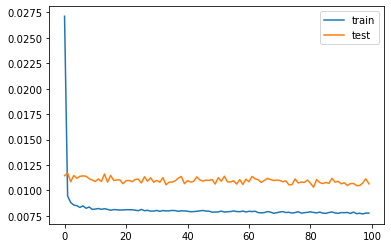

In [35]:
# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
# make a prediction
y_prediction = regressor.predict(test_X)
y_prediction

array([[0.42673224],
       [0.43349272],
       [0.39771473],
       ...,
       [0.27285144],
       [0.20345661],
       [0.18382366]], dtype=float32)

In [37]:
y_prediction = y_prediction.reshape(-1,1)
y_prediction_retrans = scaler.inverse_transform(y_prediction).round()
y_prediction_retrans

array([[34.],
       [34.],
       [31.],
       ...,
       [19.],
       [12.],
       [10.]], dtype=float32)

In [38]:
test_y = test_y.reshape(-1,1)
test_y_retrans = scaler.inverse_transform(test_y).round()
test_y_retrans

array([[38.],
       [33.],
       [27.],
       ...,
       [12.],
       [ 9.],
       [ 0.]])

In [ ]:
# Figure out the last position in the testset


In [39]:
# Datetime and stop name for presentation of the test and prediction set
start_int = len(data_journeyGID_sorted['Tidpunkt'])-len(y_prediction)
pd_test = data_journeyGID_sorted.iloc[start_int:,:]
pd_test.head()

SequenceInJourney        JourneyGID    VehicleGID  \
1113604                 10  9015005020300030  9.031006e+15   
1113605                 11  9015005020300030  9.031006e+15   
1113612                 12  9015005020300030  9.031006e+15   
1113603                 13  9015005020300030  9.031006e+15   
1113606                 14  9015005020300030  9.031006e+15   

                  Hållplatsnamn             Tidpunkt  Ombord  Påstigande  \
1113604               Parkgatan  2022-07-19 09:49:42    38.0         1.0   
1113605           Barnhemsgatan  2022-07-19 09:51:32    33.0         0.0   
1113612         Trädgårdstorget  2022-07-19 09:54:39    27.0         1.0   
1113603              Kungsgatan  2022-07-19 09:56:04    12.0         1.0   
1113606  Linköpings resecentrum  2022-07-19 10:00:14     0.0         0.0   

         Avstigande  
1113604         0.0  
1113605         5.0  
1113612         7.0  
1113603        16.0  
1113606        12.0

In [39]:
pd_test_selection = pd_test[['SequenceInJourney', 'Tidpunkt', 'Hållplatsnamn', 'Ombord']]
pd_test_selection.head()

SequenceInJourney             Tidpunkt            Hållplatsnamn  \
1098256                 14  2022-07-04 05:44:25  Rydsvägens ändhållplats   
1099339                  1  2022-07-05 05:23:12   Linköpings resecentrum   
1099340                  3  2022-07-05 05:26:35          Trädgårdstorget   
1099341                  8  2022-07-05 05:34:59                  Solhaga   
1099342                 14  2022-07-05 05:40:56  Rydsvägens ändhållplats   

         Ombord  
1098256     0.0  
1099339     1.0  
1099340     2.0  
1099341     1.0  
1099342     0.0

In [40]:
pd_test_selection['prediction'] = y_prediction_retrans
pd_test_selection.head(10)

C:\Users\USER88~1\AppData\Local\Temp/ipykernel_19388/635838839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_test_selection['prediction'] = y_prediction_retrans


SequenceInJourney             Tidpunkt            Hållplatsnamn  \
1098256                 14  2022-07-04 05:44:25  Rydsvägens ändhållplats   
1099339                  1  2022-07-05 05:23:12   Linköpings resecentrum   
1099340                  3  2022-07-05 05:26:35          Trädgårdstorget   
1099341                  8  2022-07-05 05:34:59                  Solhaga   
1099342                 14  2022-07-05 05:40:56  Rydsvägens ändhållplats   
1100484                  1  2022-07-06 05:24:05   Linköpings resecentrum   
1100486                  4  2022-07-06 05:29:27            Barnhemsgatan   
1100485                 14  2022-07-06 05:43:42  Rydsvägens ändhållplats   
1101594                  1  2022-07-07 05:23:13   Linköpings resecentrum   
1101595                  3  2022-07-07 05:26:30          Trädgårdstorget   

         Ombord  prediction  
1098256     0.0         2.0  
1099339     1.0         2.0  
1099340     2.0         1.0  
1099341     1.0         2.0  
1099342     0.0         1.0  
1100484     1.0         2.0  
1100486     0.0         1.0  
1100485     0.0         2.0  
1101594     1.0         2.0  
1101595     3.0         1.0

In [41]:
# Calculate number of rows to delete
row = pd_test_selection.iloc[0]
if row['SequenceInJourney'] != 1:
    index_adjustment = max_sequence - row['SequenceInJourney'] + 1
index_adjustment

1

In [42]:
pd_test_selection = pd_test_selection.drop(pd_test_selection.index[0:index_adjustment])
pd_test_selection.head(6)

SequenceInJourney             Tidpunkt            Hållplatsnamn  \
1099339                  1  2022-07-05 05:23:12   Linköpings resecentrum   
1099340                  3  2022-07-05 05:26:35          Trädgårdstorget   
1099341                  8  2022-07-05 05:34:59                  Solhaga   
1099342                 14  2022-07-05 05:40:56  Rydsvägens ändhållplats   
1100484                  1  2022-07-06 05:24:05   Linköpings resecentrum   
1100486                  4  2022-07-06 05:29:27            Barnhemsgatan   

         Ombord  prediction  
1099339     1.0         2.0  
1099340     2.0         1.0  
1099341     1.0         2.0  
1099342     0.0         1.0  
1100484     1.0         2.0  
1100486     0.0         1.0

In [43]:
pd_test_selection['error'] = abs(pd_test_selection['Ombord'] - pd_test_selection['prediction'])
pd_test_selection.head()

SequenceInJourney             Tidpunkt            Hållplatsnamn  \
1099339                  1  2022-07-05 05:23:12   Linköpings resecentrum   
1099340                  3  2022-07-05 05:26:35          Trädgårdstorget   
1099341                  8  2022-07-05 05:34:59                  Solhaga   
1099342                 14  2022-07-05 05:40:56  Rydsvägens ändhållplats   
1100484                  1  2022-07-06 05:24:05   Linköpings resecentrum   

         Ombord  prediction  error  
1099339     1.0         2.0    1.0  
1099340     2.0         1.0    1.0  
1099341     1.0         2.0    1.0  
1099342     0.0         1.0    1.0  
1100484     1.0         2.0    1.0

In [44]:
mean_error = pd_test_selection.mean(axis=0)
mean_error

C:\Users\USER88~1\AppData\Local\Temp/ipykernel_19388/1016517956.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_error = pd_test_selection.mean(axis=0)


SequenceInJourney    7.166448
Ombord               2.355177
prediction           2.499345
error                1.384010
dtype: float64

In [45]:
# Adjustment 2 - inga påstigande vid endstation
for i, j in pd_test_selection.iterrows():
    if j.SequenceInJourney == max_sequence:
        pd_test_selection._set_value(i,'prediction', 0.0)

In [46]:
min_index = pd_test_selection.index[pd_test_selection['SequenceInJourney'] == min_sequence].tolist()

In [47]:
max_index = pd_test_selection.index[pd_test_selection['SequenceInJourney'] == max_sequence].tolist()

In [48]:
tour_selection_1 = pd_test_selection.loc[min_index[0]:max_index[0]]

In [49]:
tour_selection_2 = pd_test_selection.loc[min_index[1]:max_index[1]]

In [50]:
tour_selection_3 = pd_test_selection.loc[min_index[2]:max_index[2]]

In [51]:
start_index = 0
stop_index = 0
saved_tours = []

if len(max_index) > len(min_index):
    stop_int = len(min_index)
if len(max_index) < len(min_index):
    stop_int = len(max_index)

for i in range(1, stop_int):
    tour = pd_test_selection.loc[min_index[start_index]:max_index[stop_index]]
    if len(tour) == 0:
        tour = pd_test_selection.loc[min_index[start_index]:max_index[stop_index + 1]]
        if len(tour) == 0:
            tour = pd_test_selection.loc[min_index[start_index]:max_index[stop_index + 2]]
            if len(tour) == 0:
                tour = pd_test_selection.loc[min_index[start_index]:max_index[stop_index + 3]]
        
    saved_tours.append(tour)
    print(tour)
    start_index = start_index + 1
    stop_index = stop_index + 1

         SequenceInJourney             Tidpunkt            Hållplatsnamn  \
1099339                  1  2022-07-05 05:23:12   Linköpings resecentrum   
1099340                  3  2022-07-05 05:26:35          Trädgårdstorget   
1099341                  8  2022-07-05 05:34:59                  Solhaga   
1099342                 14  2022-07-05 05:40:56  Rydsvägens ändhållplats   

         Ombord  prediction  error  
1099339     1.0         2.0    1.0  
1099340     2.0         1.0    1.0  
1099341     1.0         2.0    1.0  
1099342     0.0         0.0    1.0  
         SequenceInJourney             Tidpunkt            Hållplatsnamn  \
1100484                  1  2022-07-06 05:24:05   Linköpings resecentrum   
1100486                  4  2022-07-06 05:29:27            Barnhemsgatan   
1100485                 14  2022-07-06 05:43:42  Rydsvägens ändhållplats   

         Ombord  prediction  error  
1100484     1.0         2.0    1.0  
1100486     0.0         1.0    1.0  
1100485     0.0   

1371009     0.0         0.0    2.0  
         SequenceInJourney             Tidpunkt            Hållplatsnamn  \
1372996                  1  2022-12-22 05:23:20   Linköpings resecentrum   
1373001                  3  2022-12-22 05:26:48             Stora Torget   
1373002                  4  2022-12-22 05:28:41            Barnhemsgatan   
1372997                  5  2022-12-22 05:30:25                Parkgatan   
1373003                  7  2022-12-22 05:32:03          Gamla Linköping   
1373004                  8  2022-12-22 05:34:05                  Solhaga   
1372998                  9  2022-12-22 05:36:22              Ryd centrum   
1372999                 10  2022-12-22 05:37:23           Mårdtorpsgatan   
1373000                 14  2022-12-22 05:42:48  Rydsvägens ändhållplats   

         Ombord  prediction  error  
1372996     8.0         2.0    6.0  
1373001    10.0         6.0    4.0  
1373002     9.0         8.0    1.0  
1372997     8.0         7.0    1.0  
1373003     8.0  

In [52]:
# Select all tours with a predicted overload of passenger
tours_overload = []
load_limit = (66 + 43)/2
for i in range(0, len(saved_tours)):
    current_tour = saved_tours[i]['Ombord'].values
    for j in range(0, len(current_tour)):
        if current_tour[j] >= load_limit:
            tours_overload.append(saved_tours[i])
            break
print(len(tours_overload))

0


C:\Users\USER88~1\AppData\Local\Temp/ipykernel_19388/1311309442.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


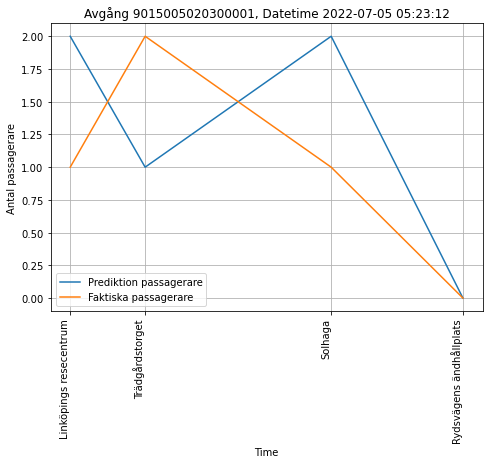

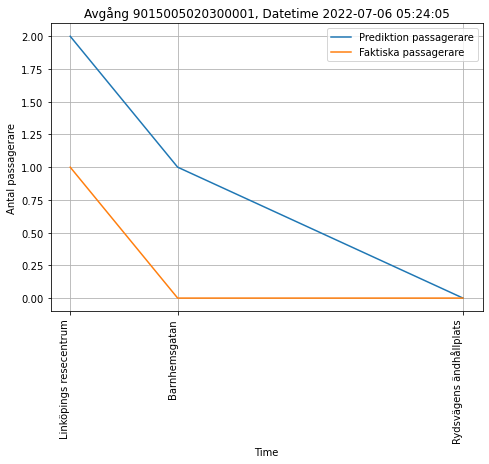

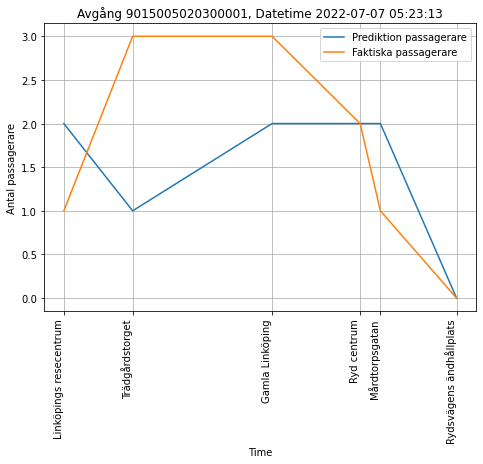

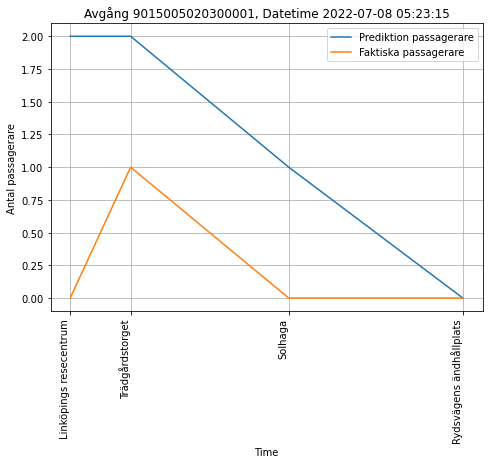

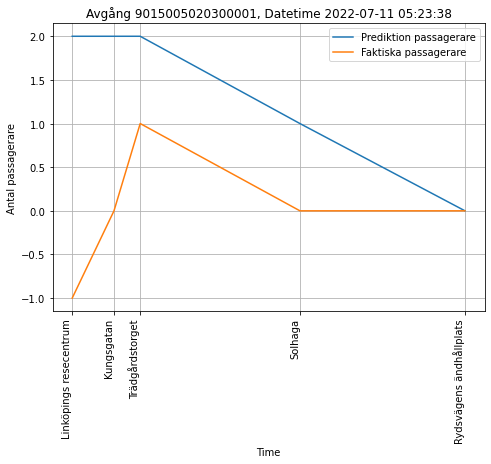

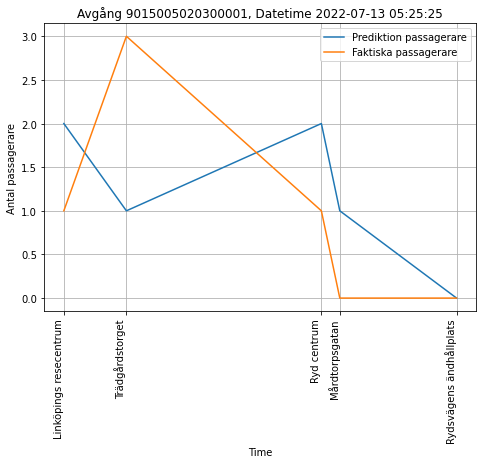

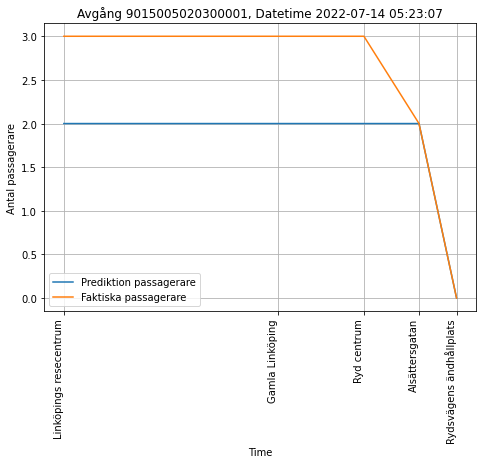

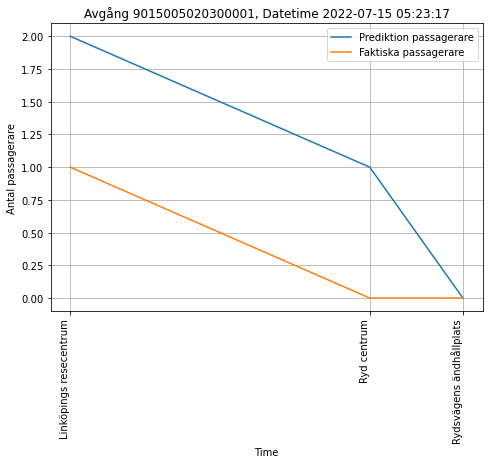

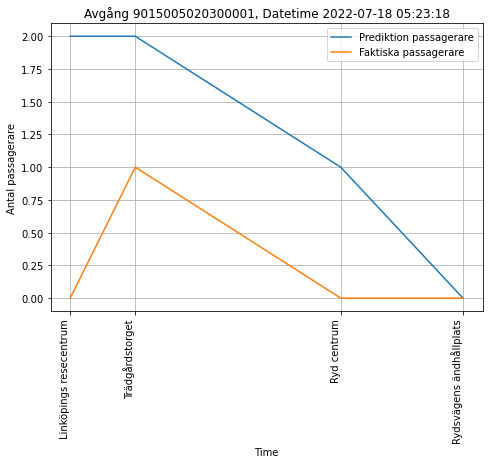

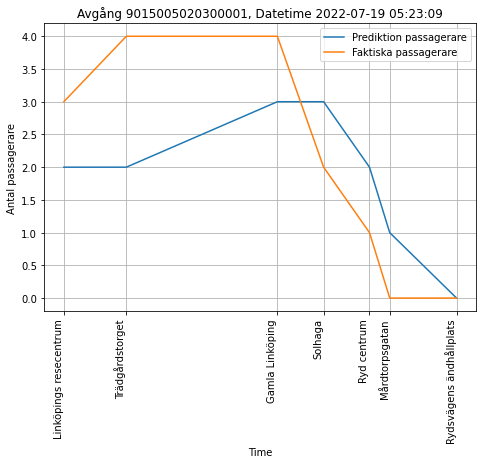

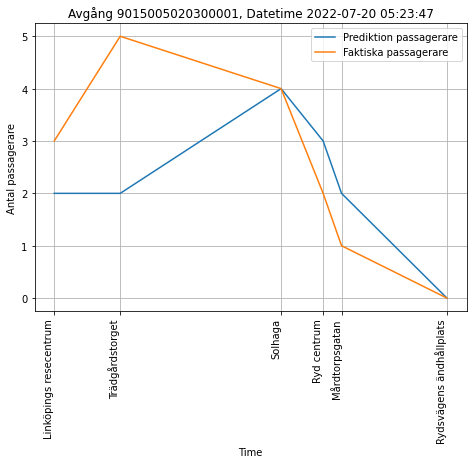

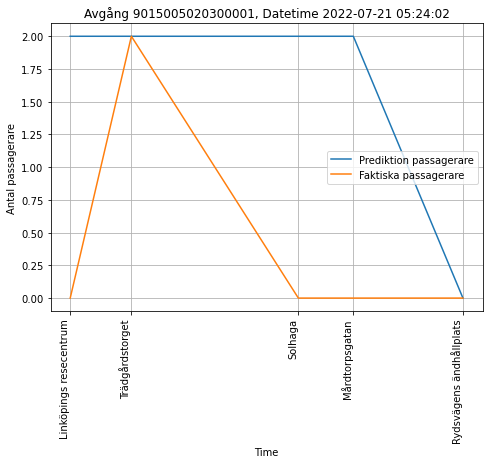

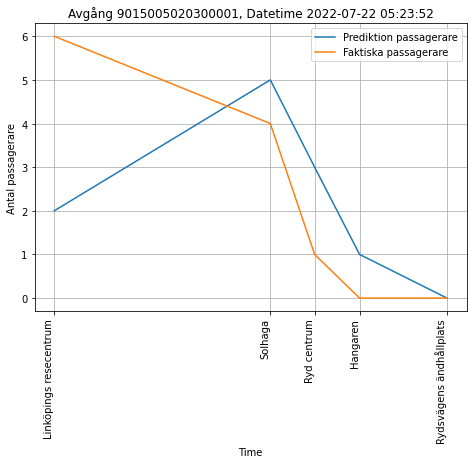

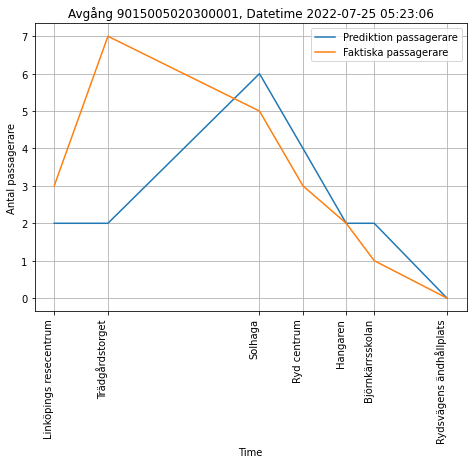

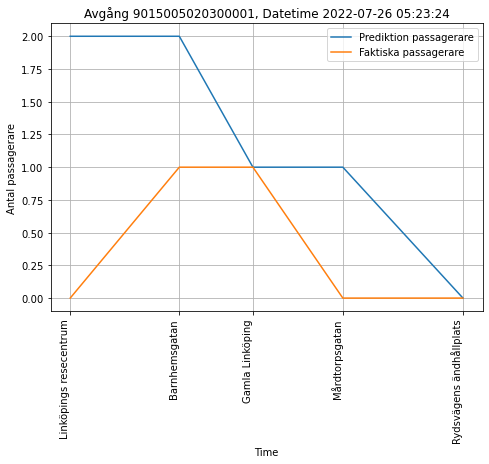

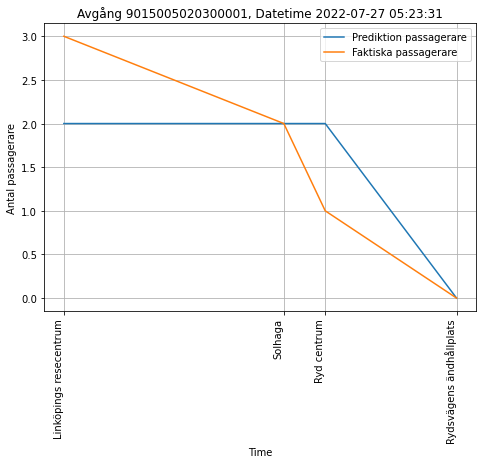

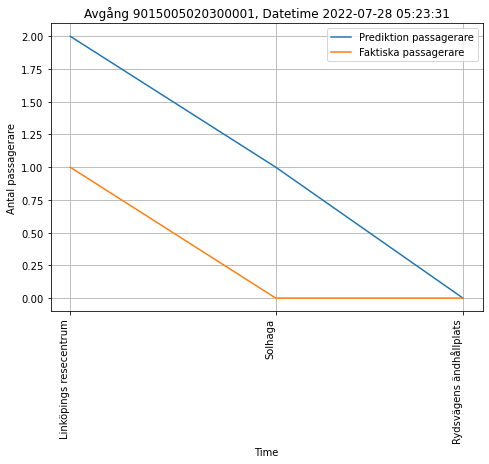

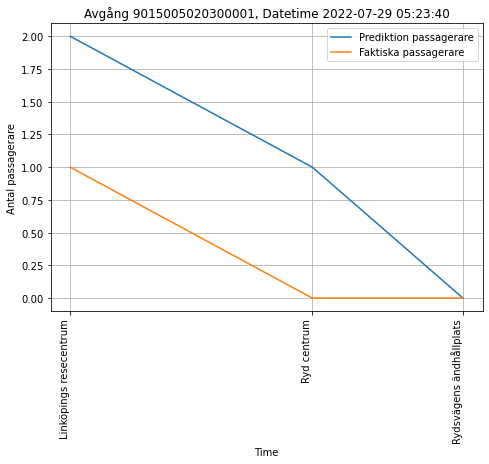

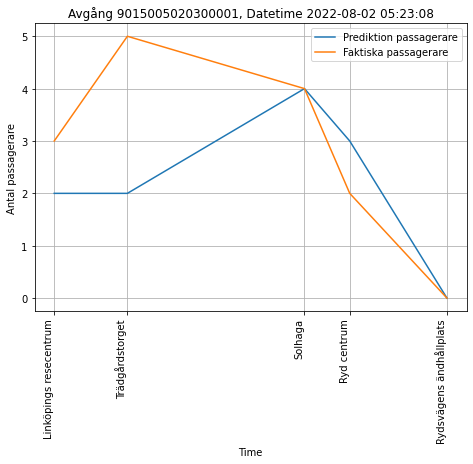

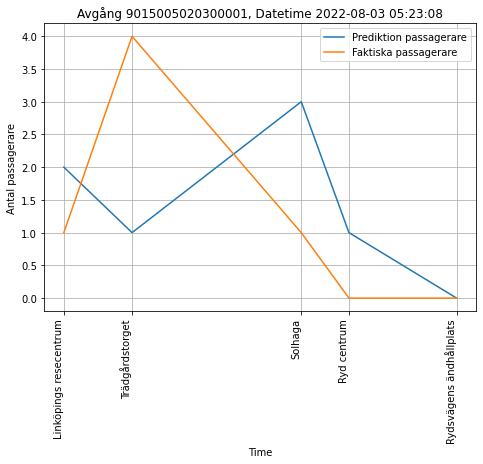

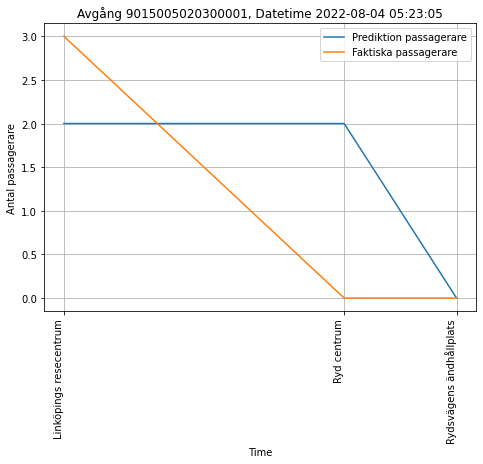

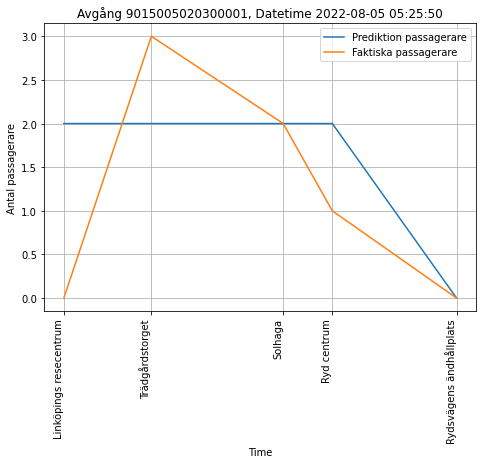

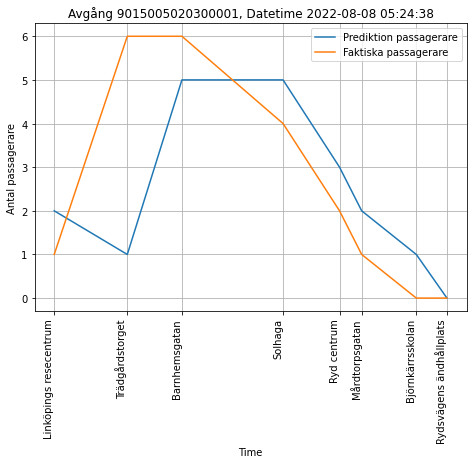

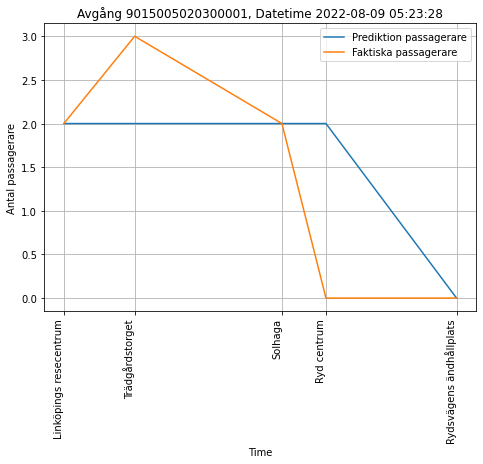

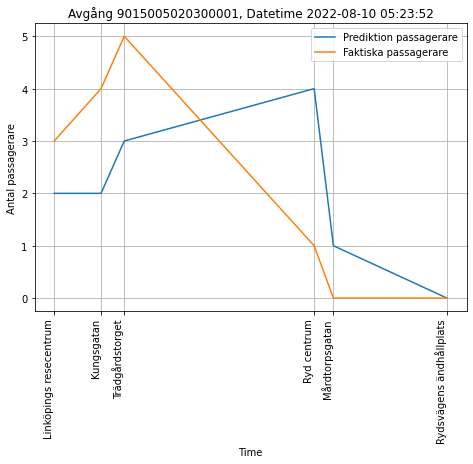

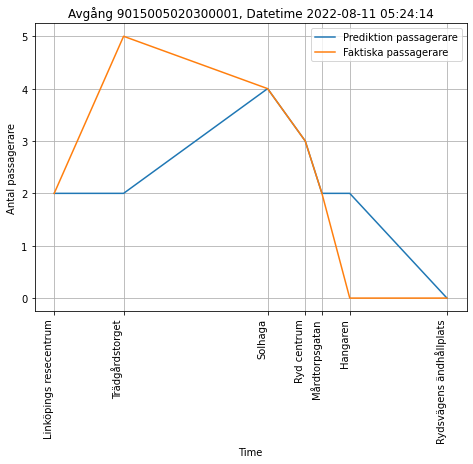

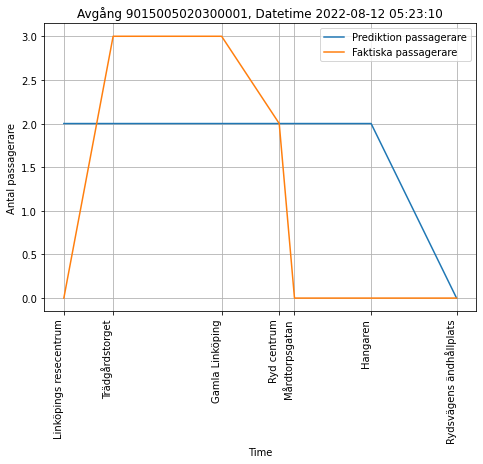

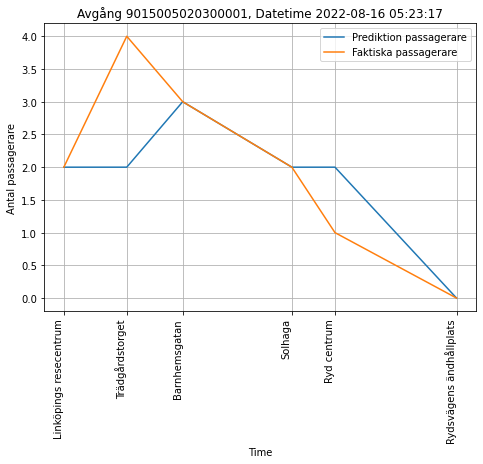

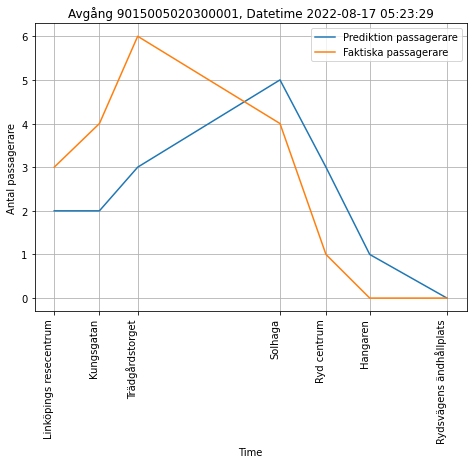

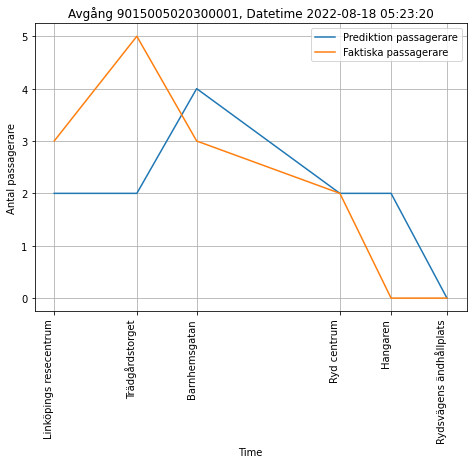

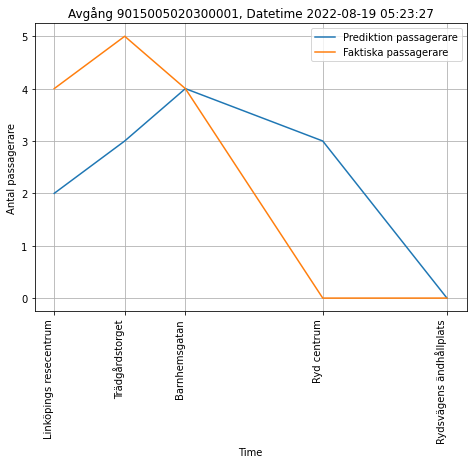

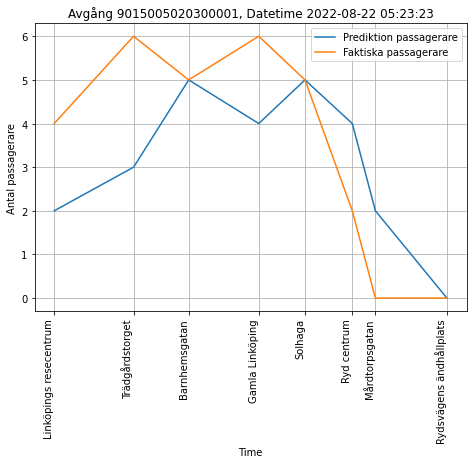

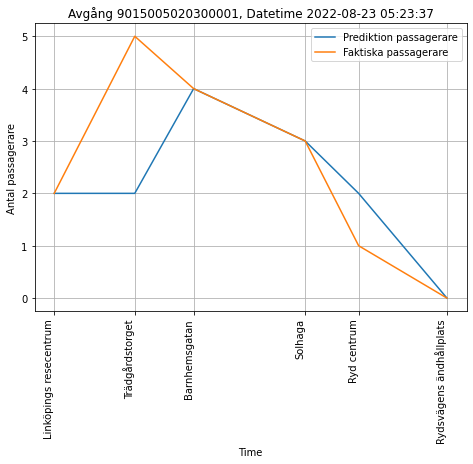

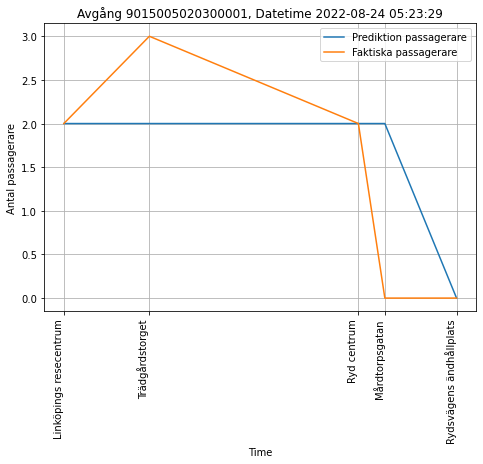

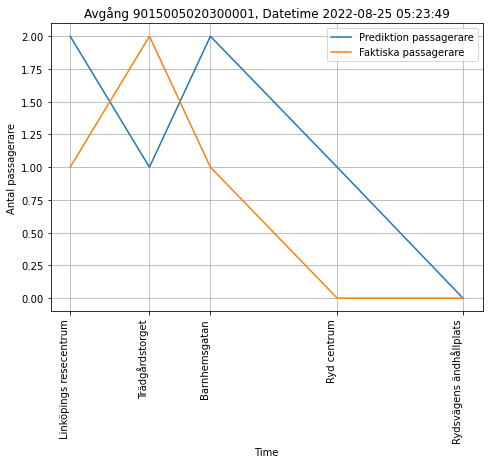

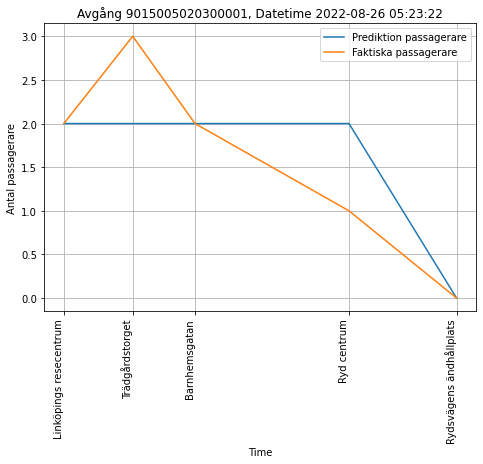

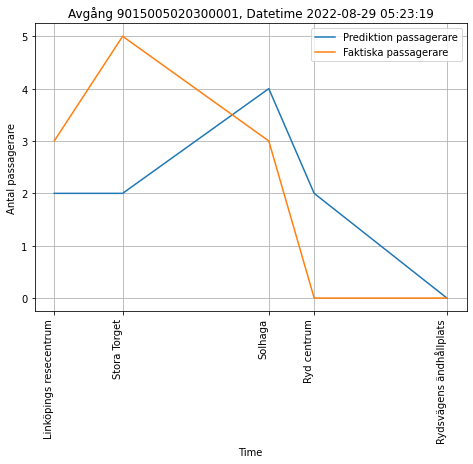

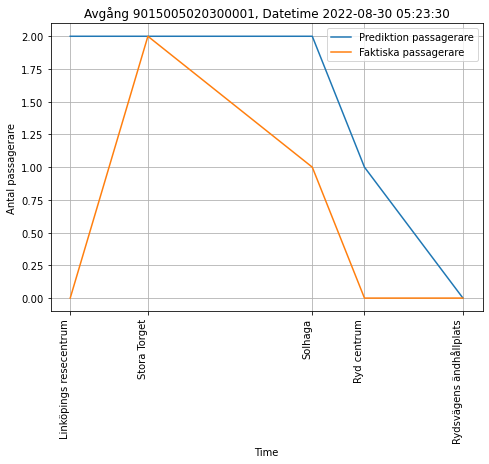

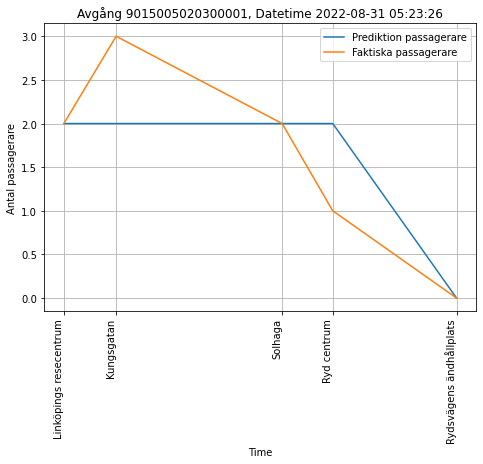

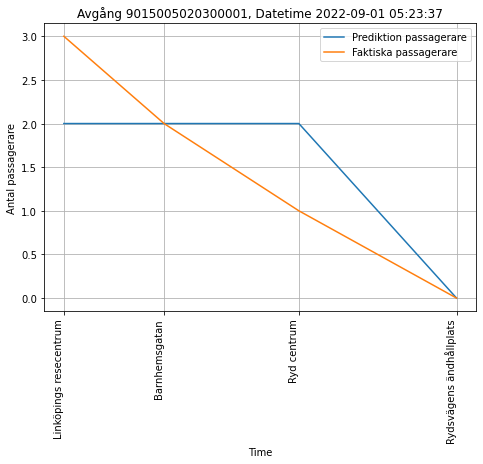

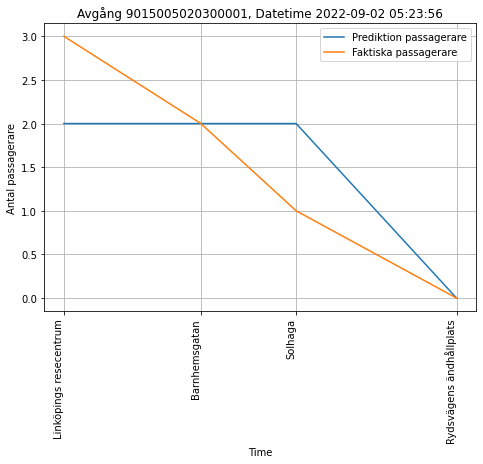

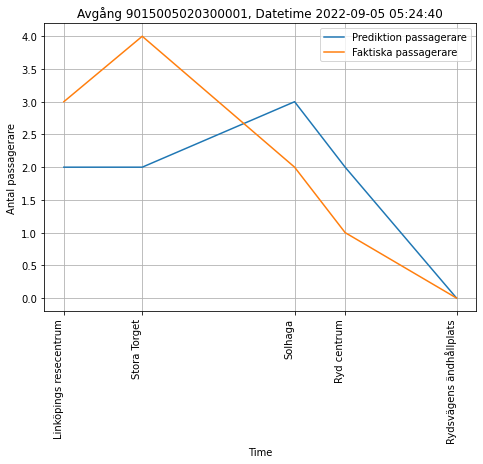

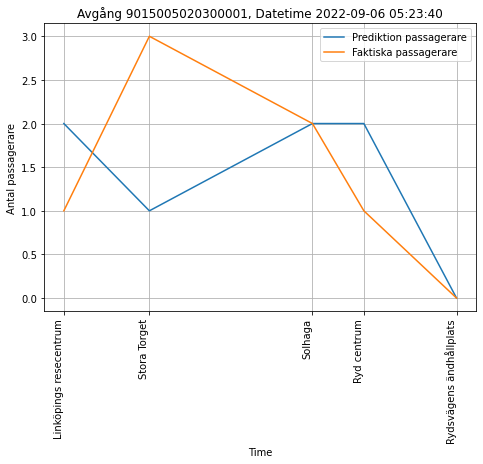

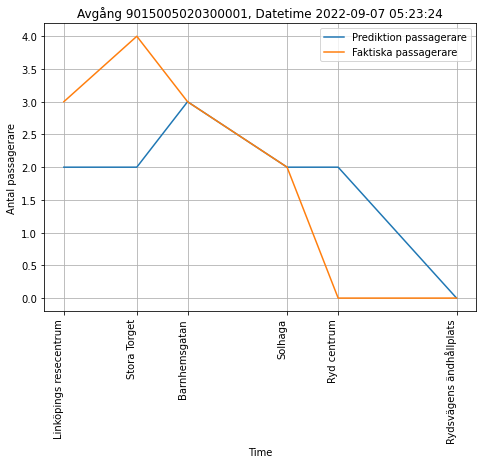

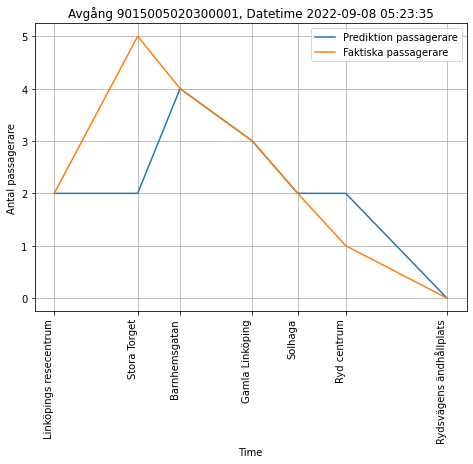

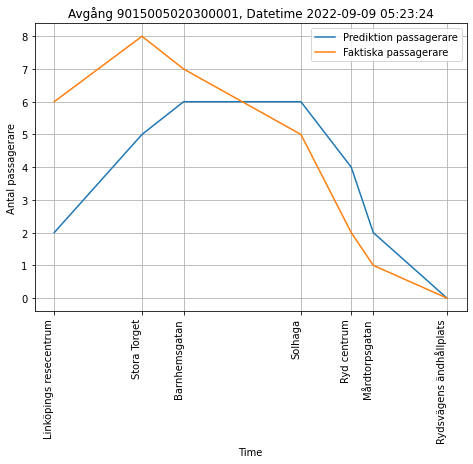

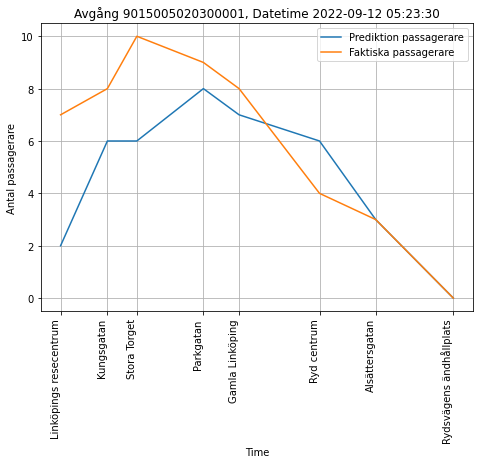

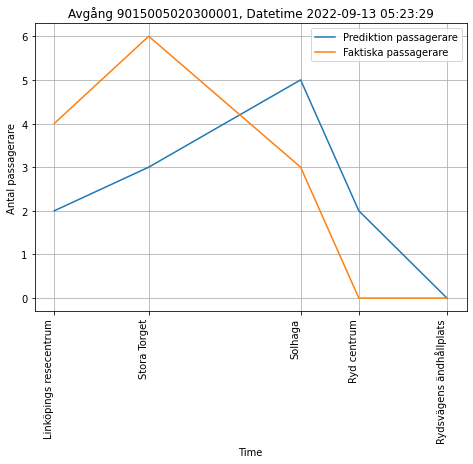

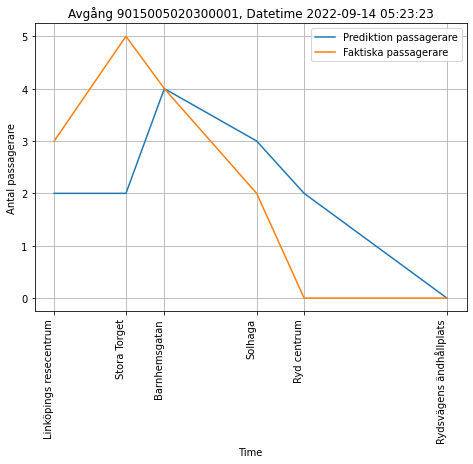

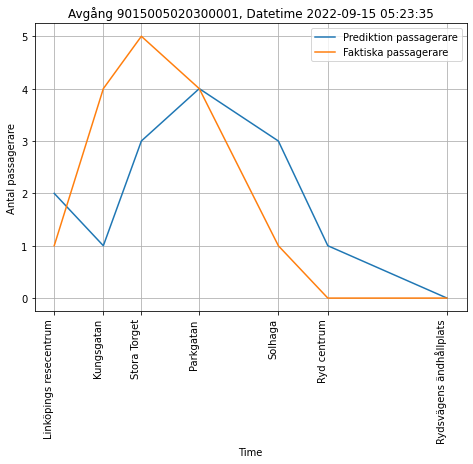

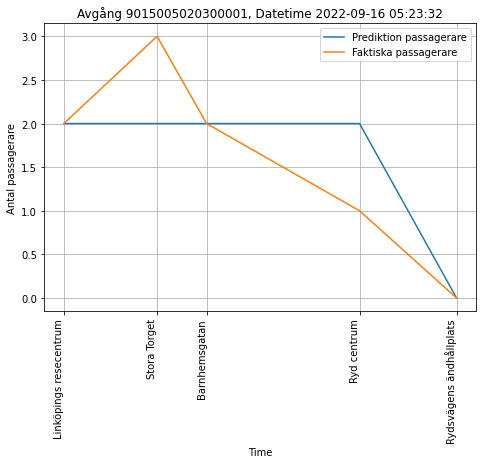

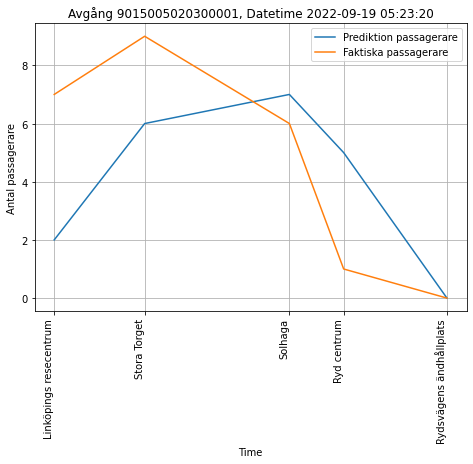

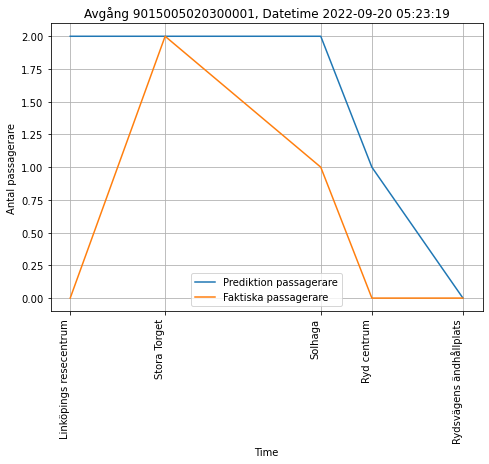

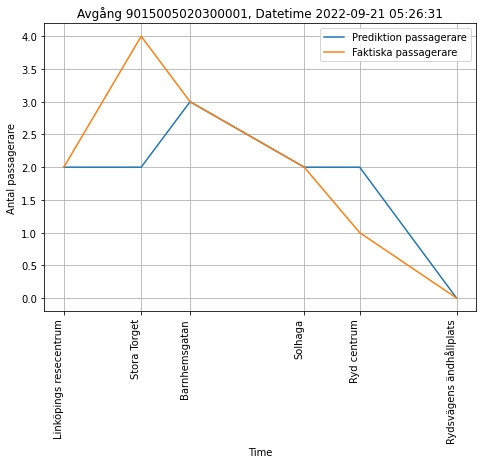

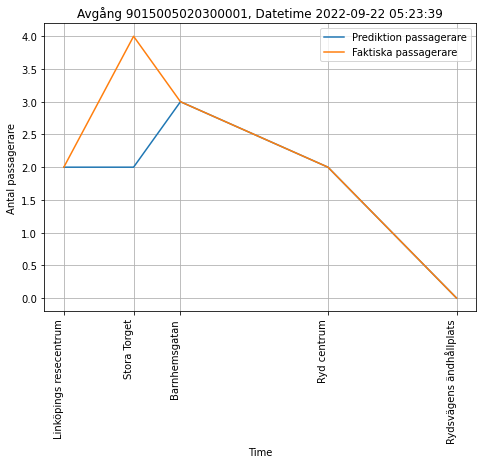

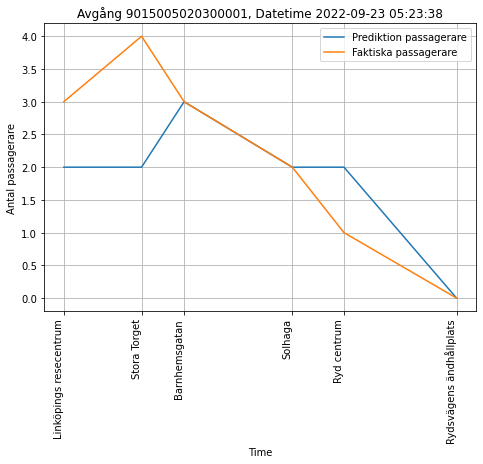

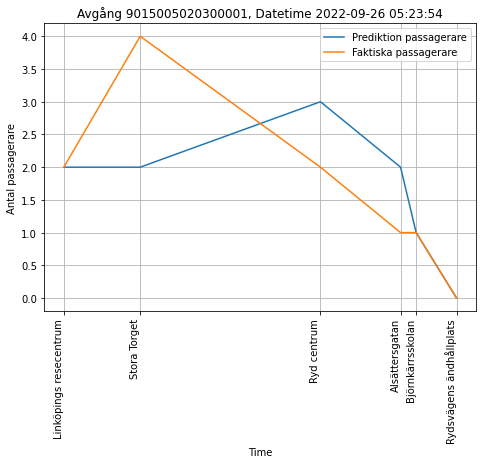

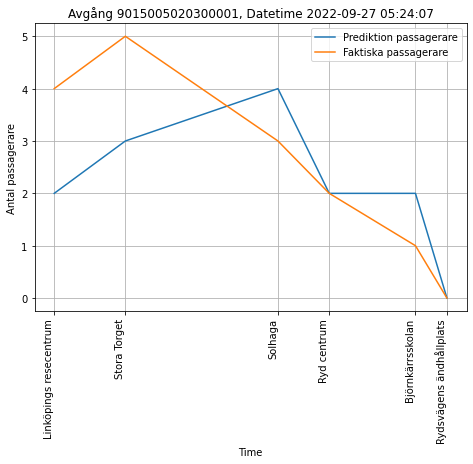

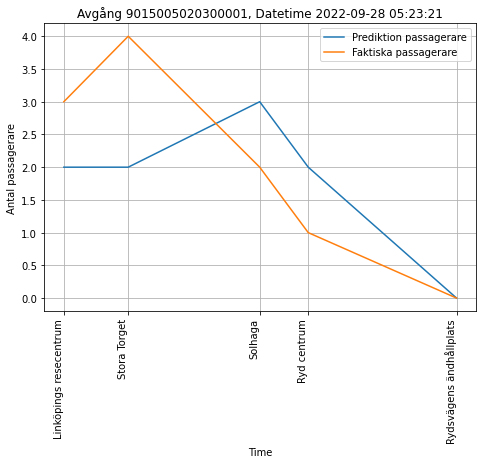

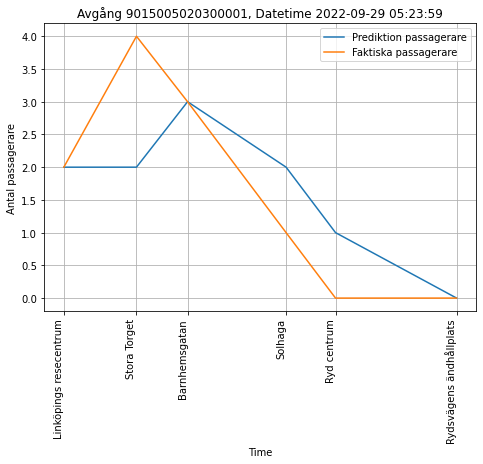

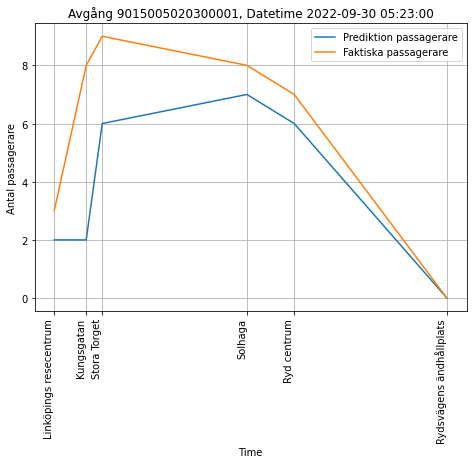

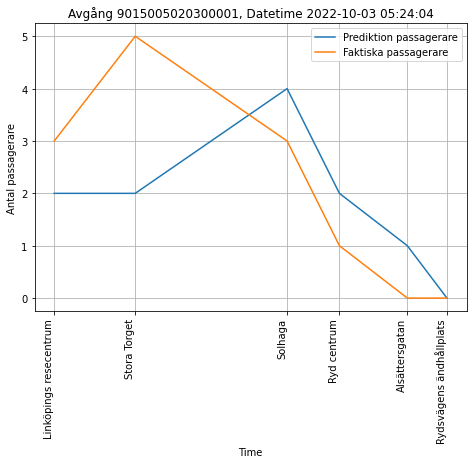

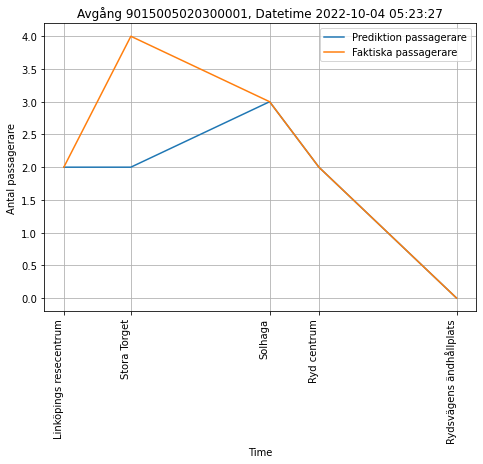

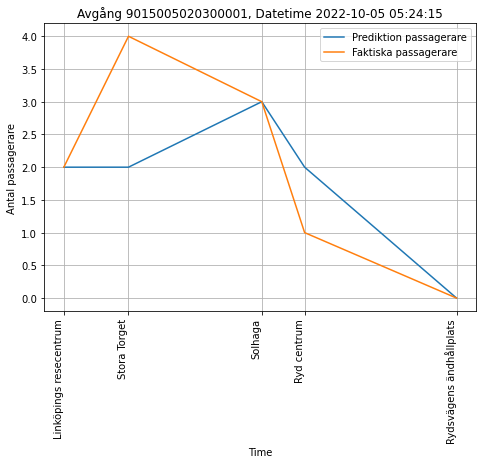

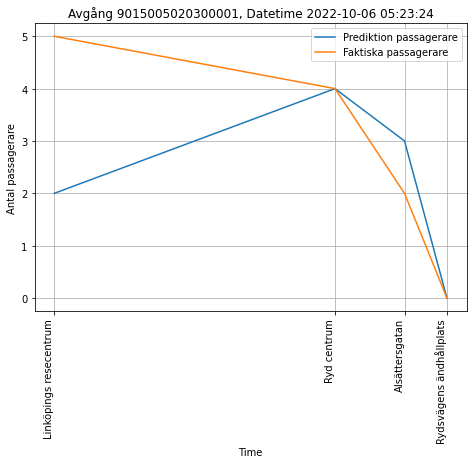

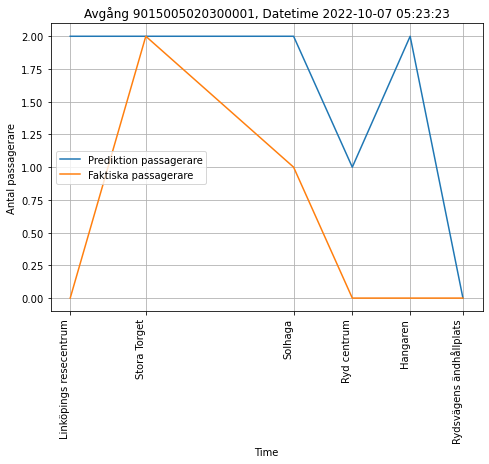

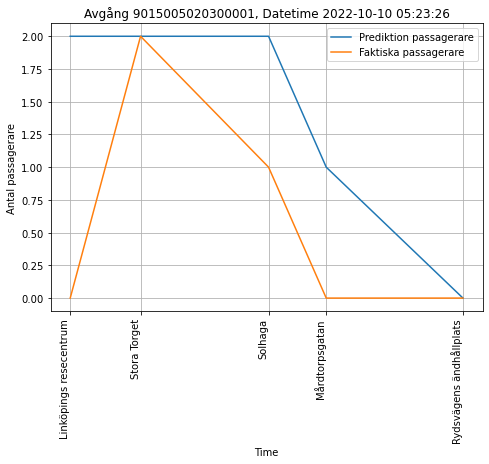

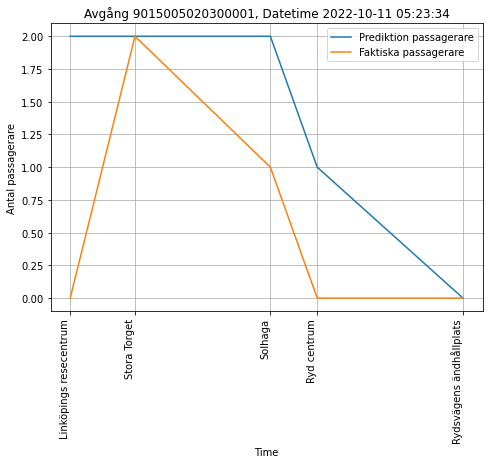

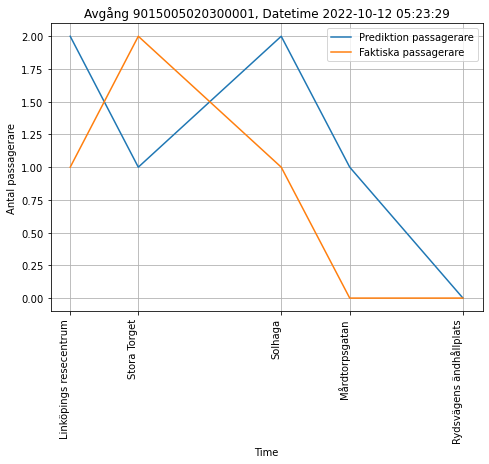

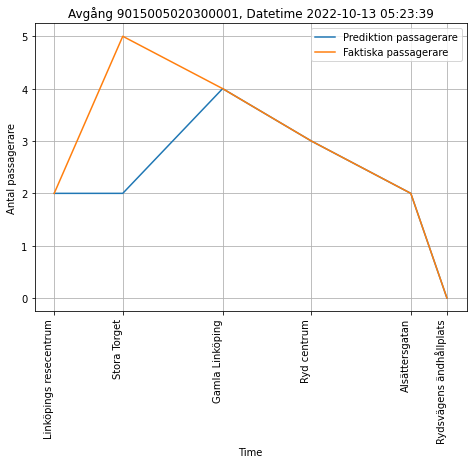

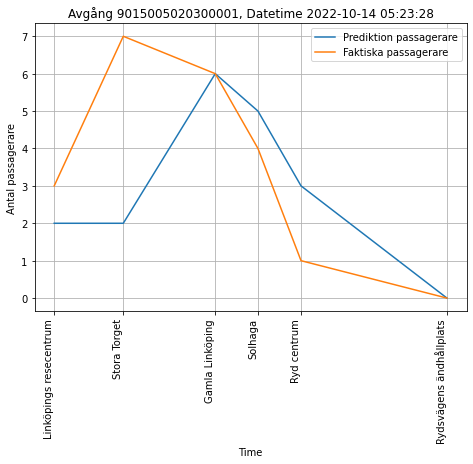

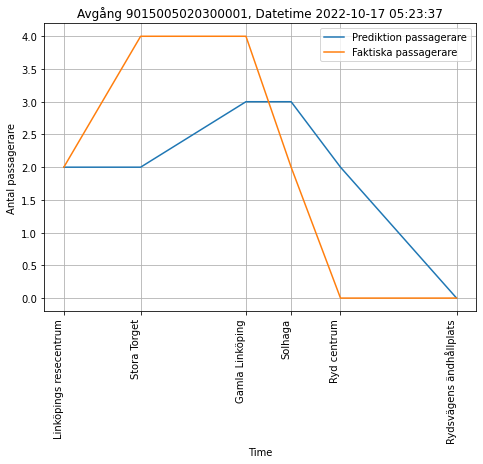

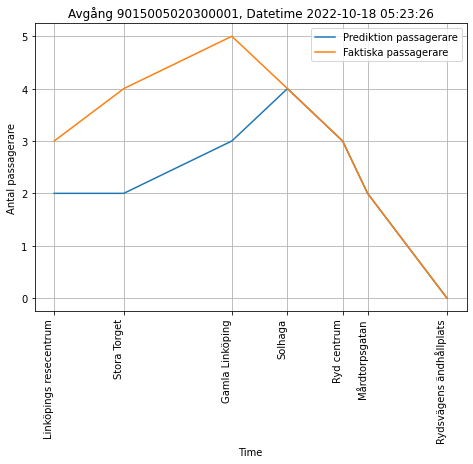

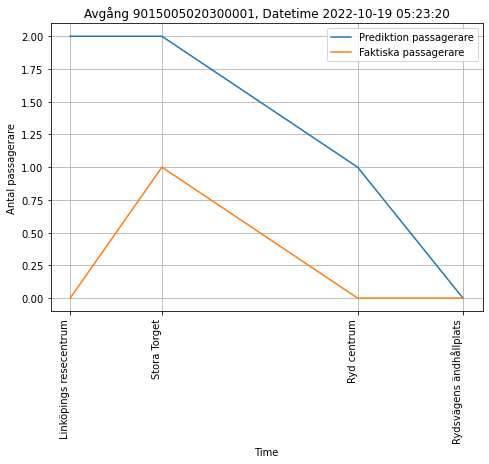

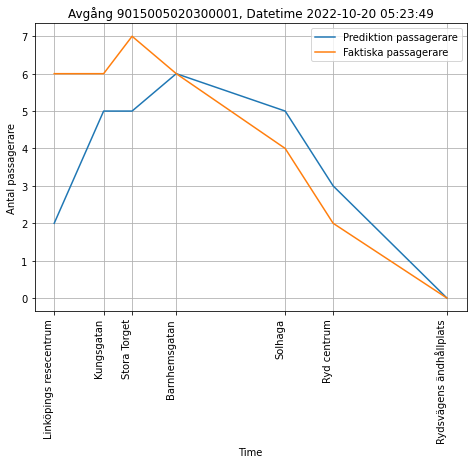

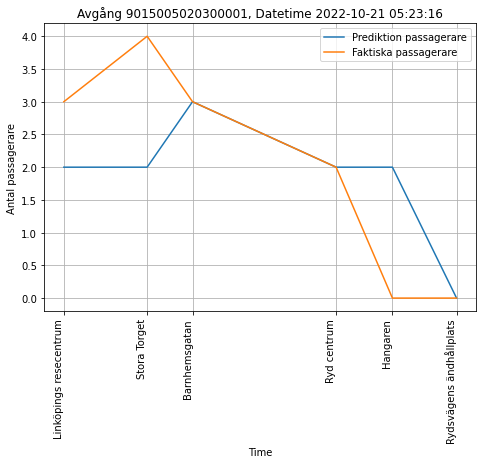

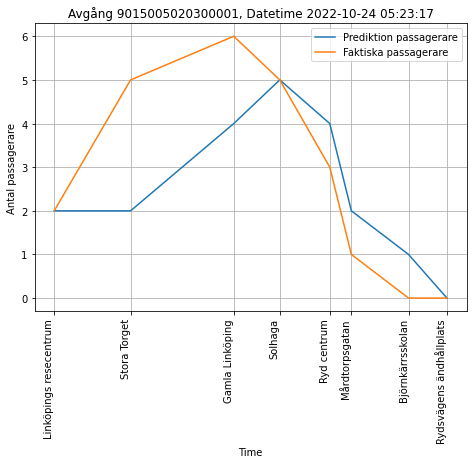

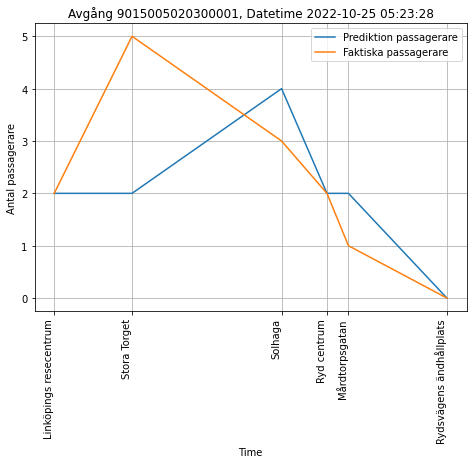

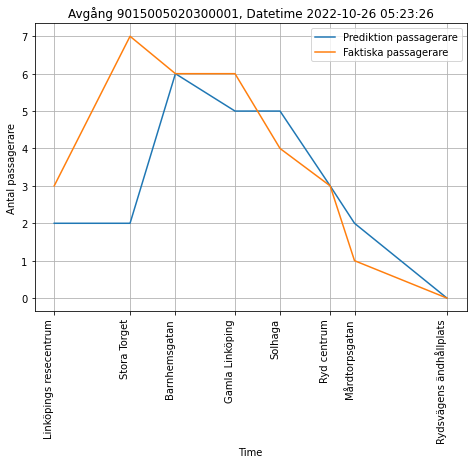

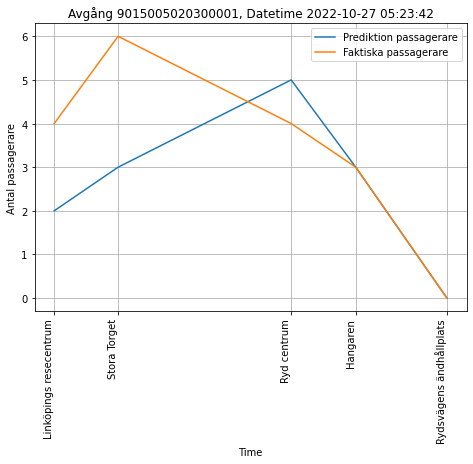

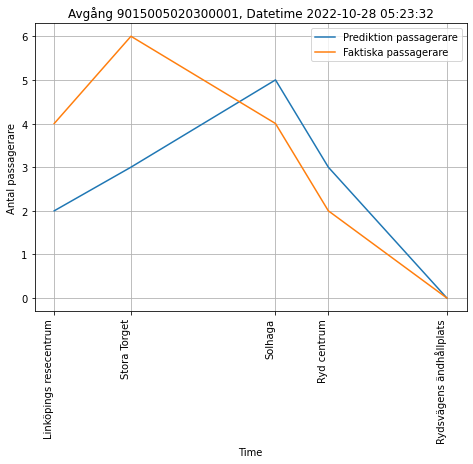

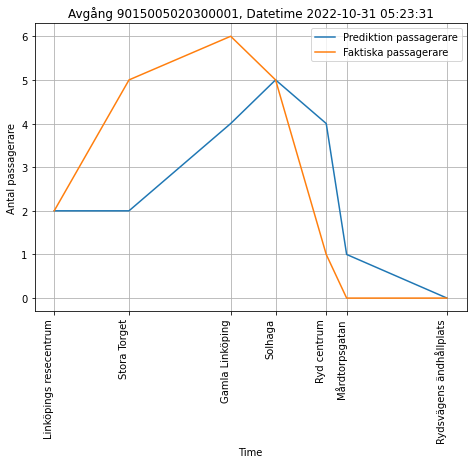

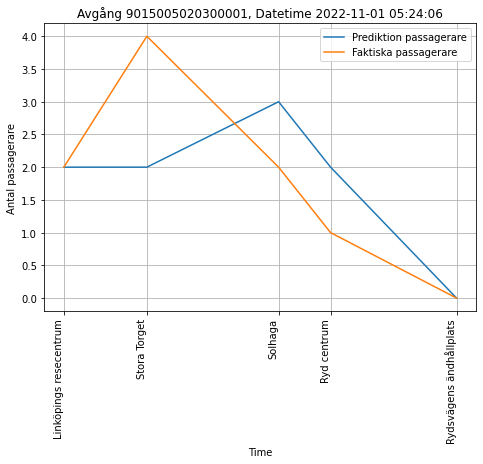

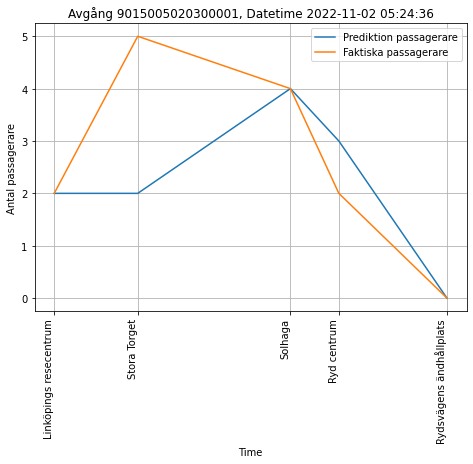

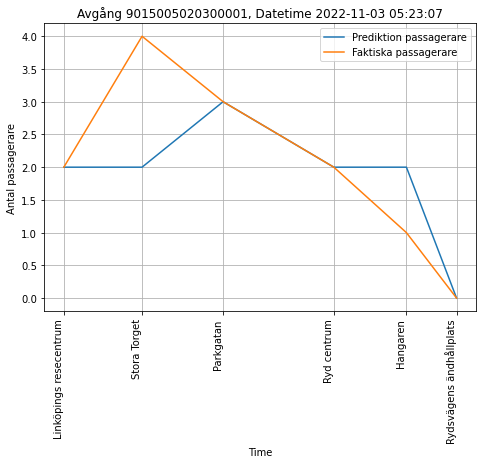

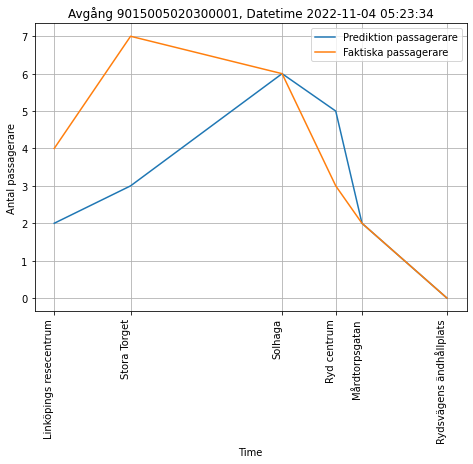

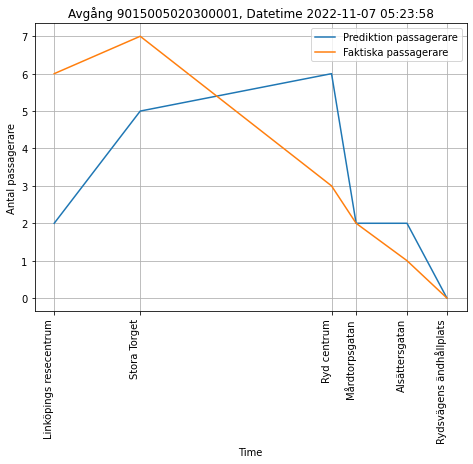

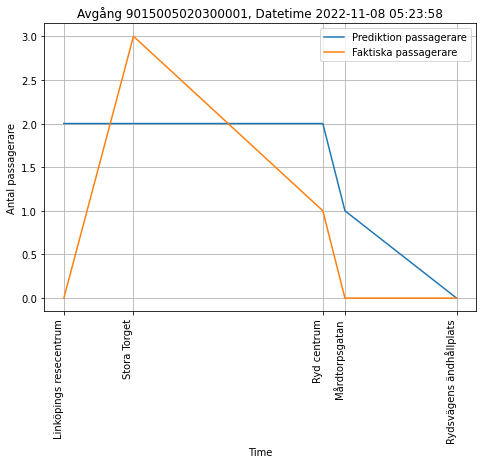

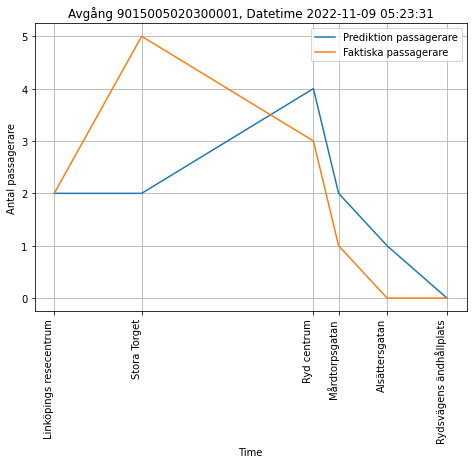

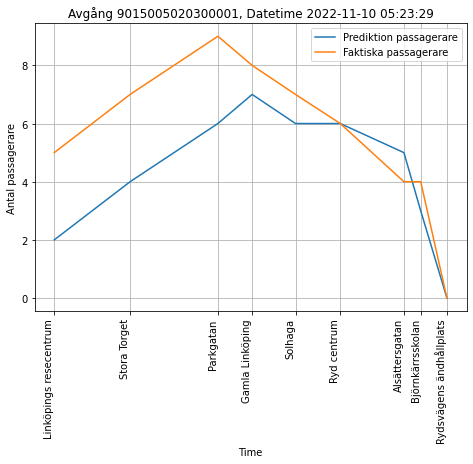

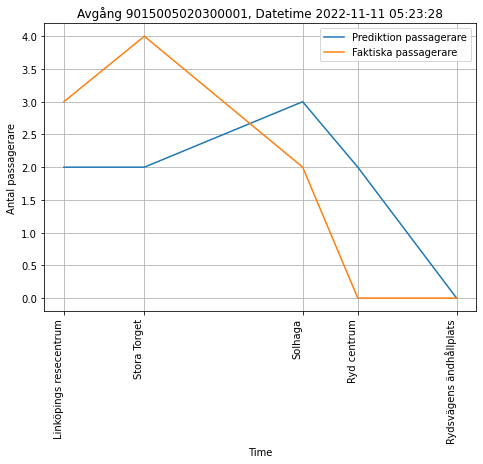

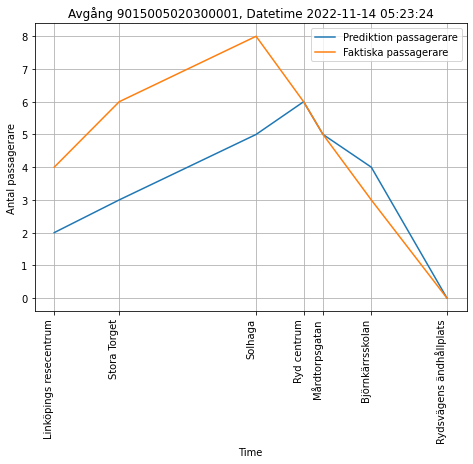

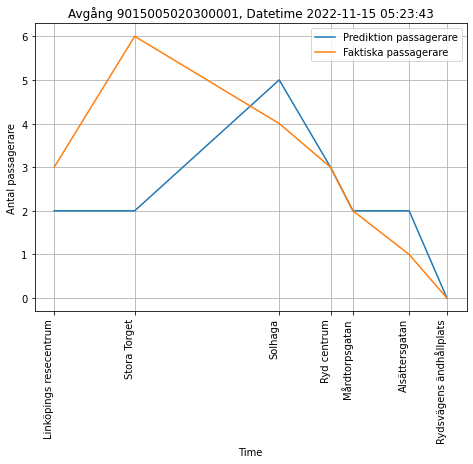

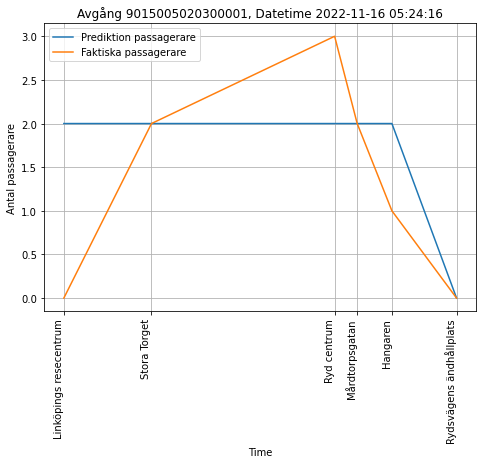

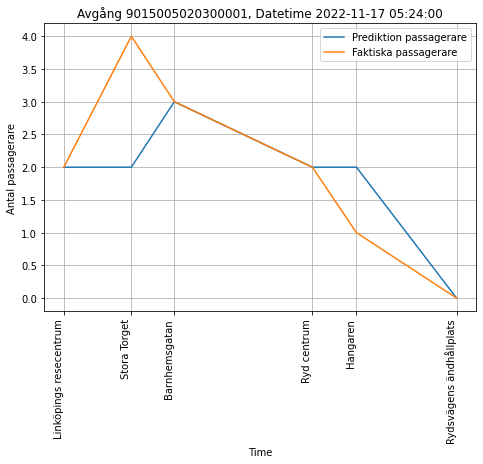

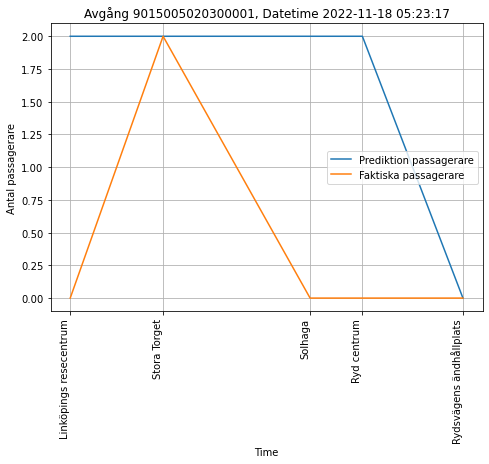

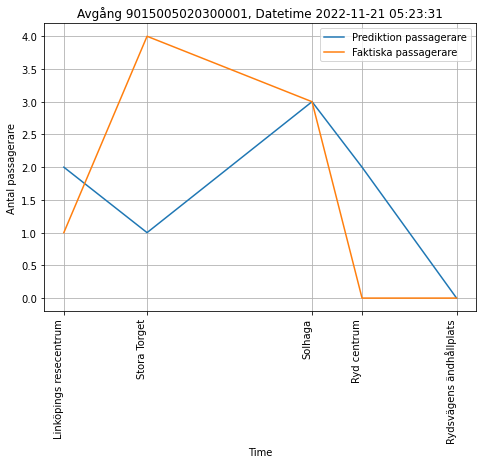

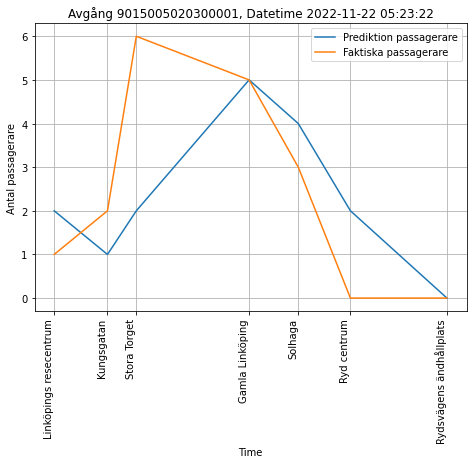

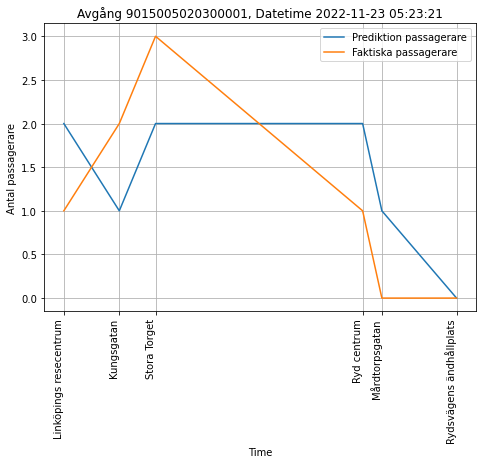

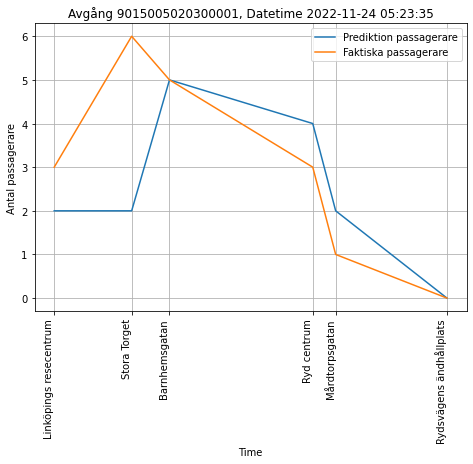

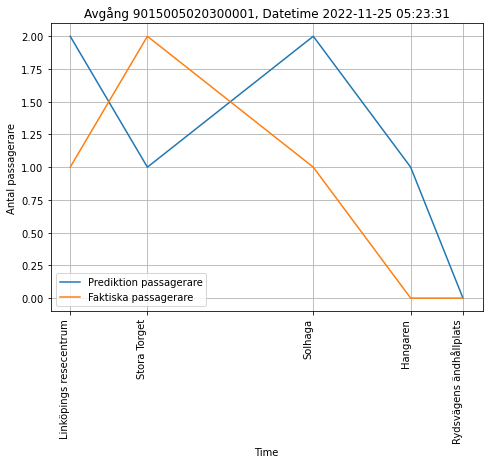

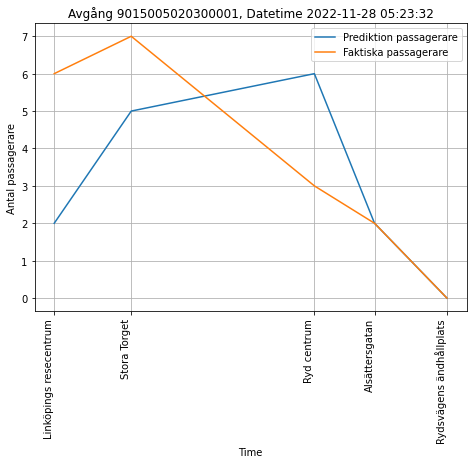

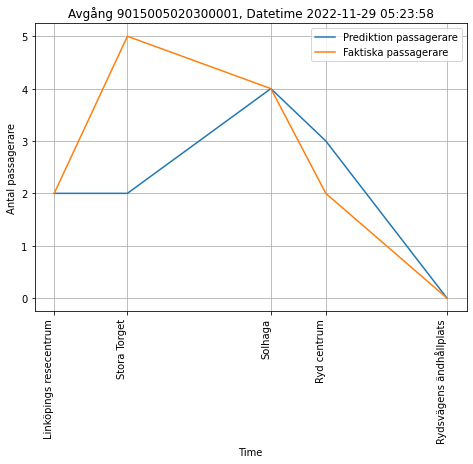

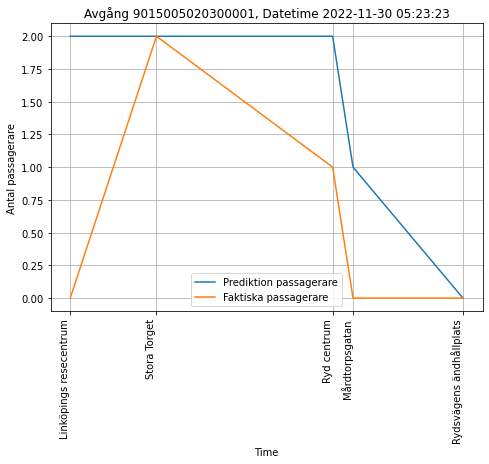

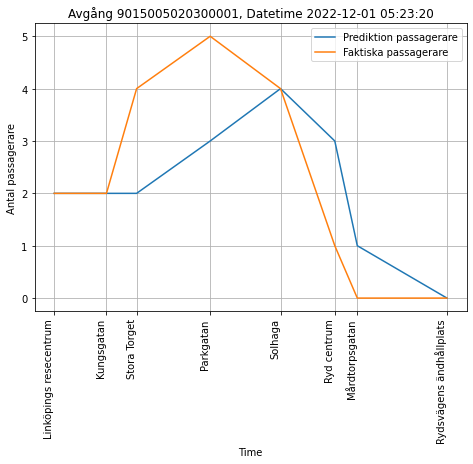

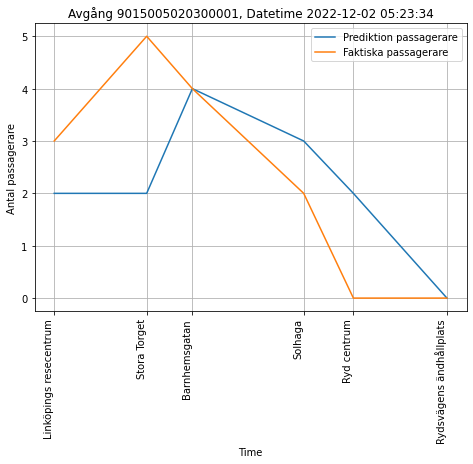

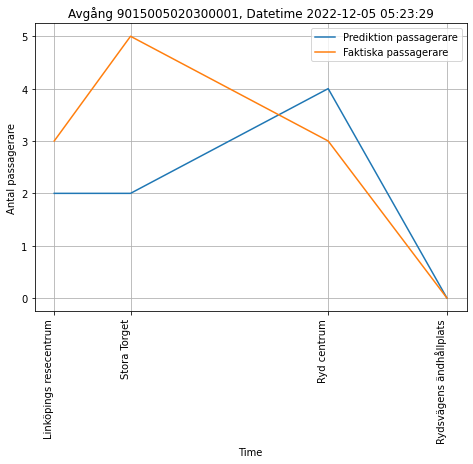

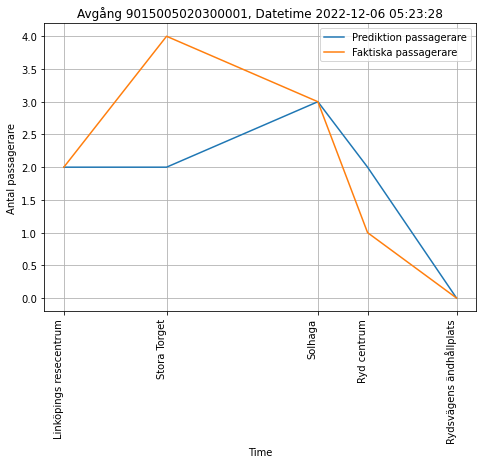

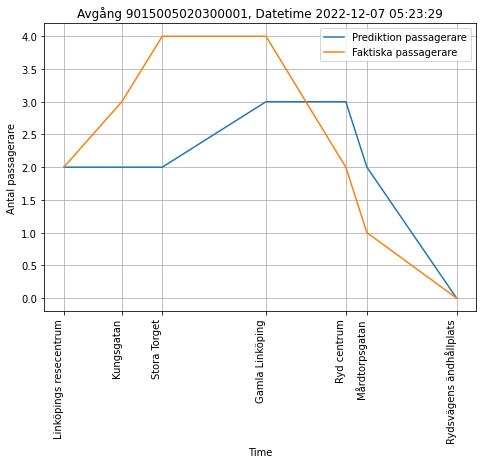

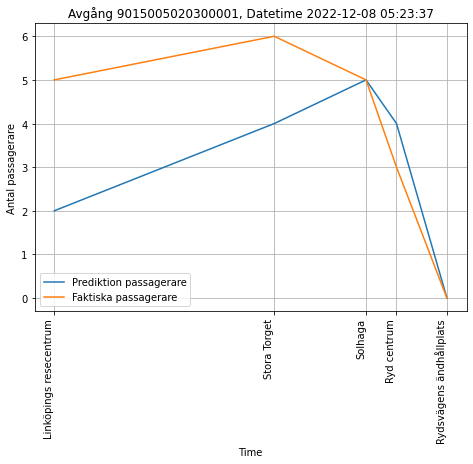

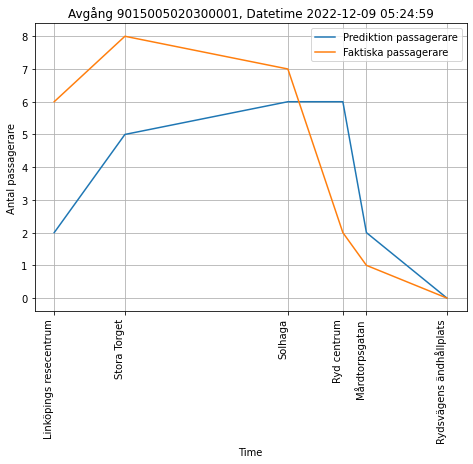

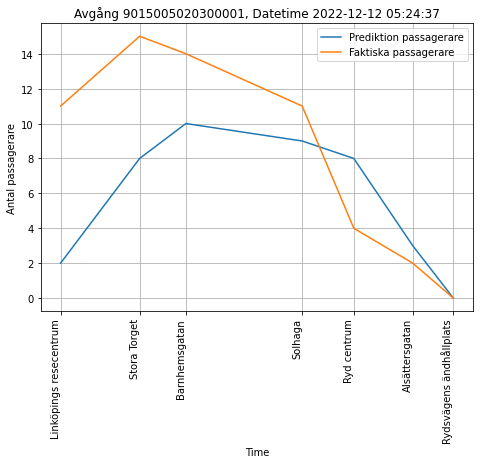

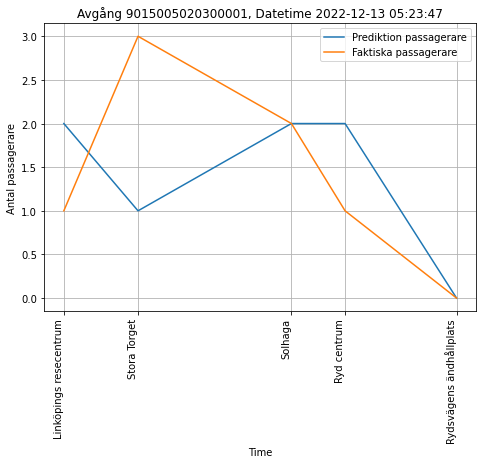

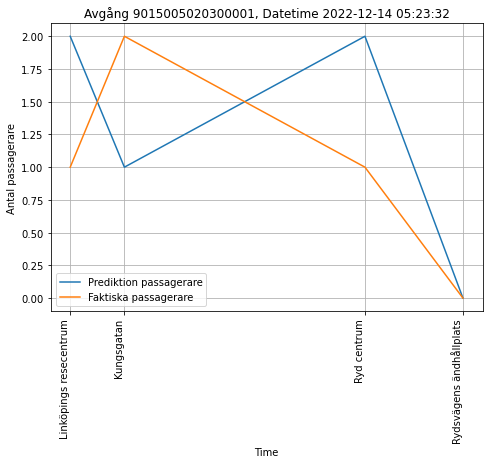

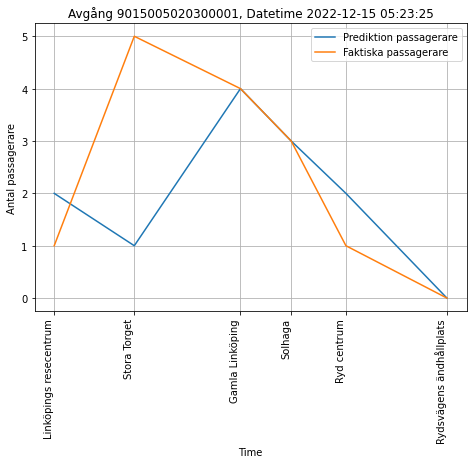

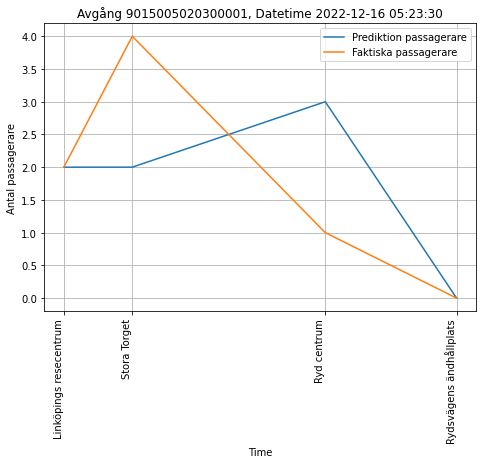

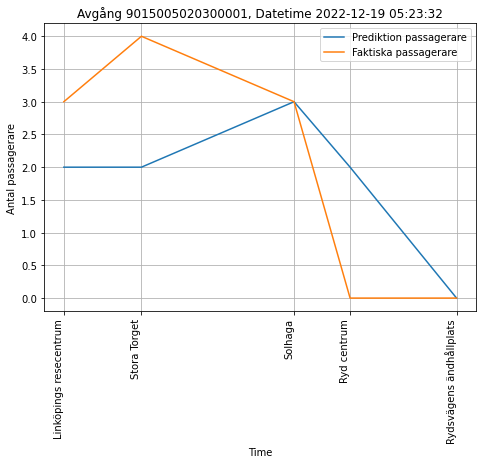

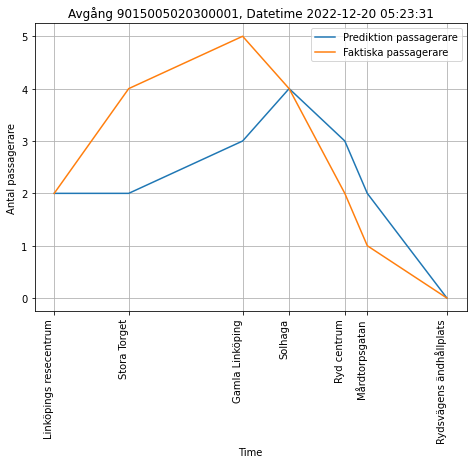

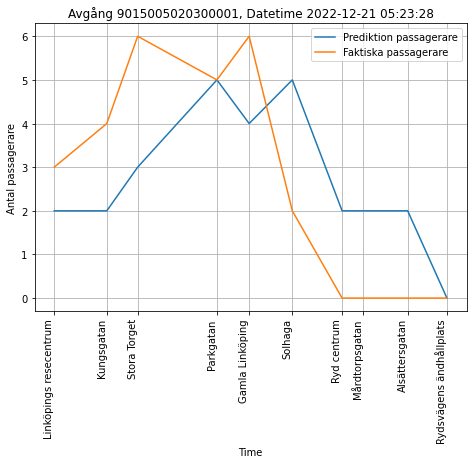

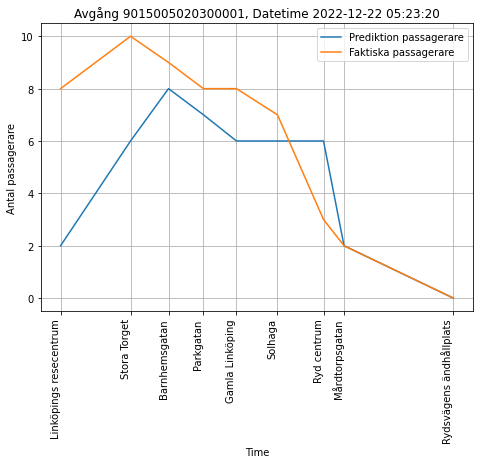

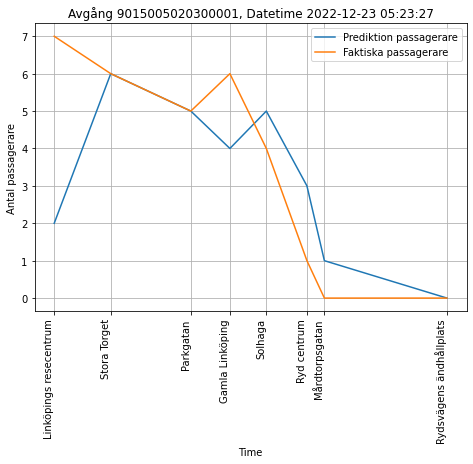

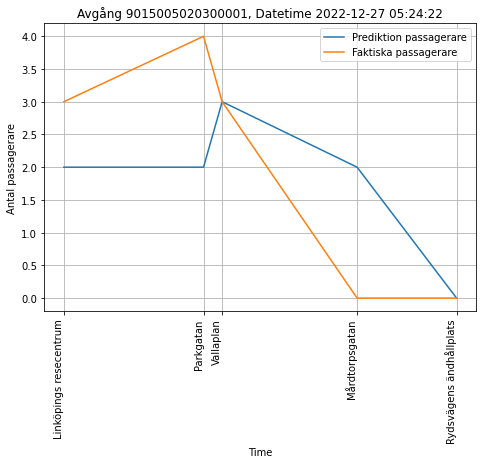

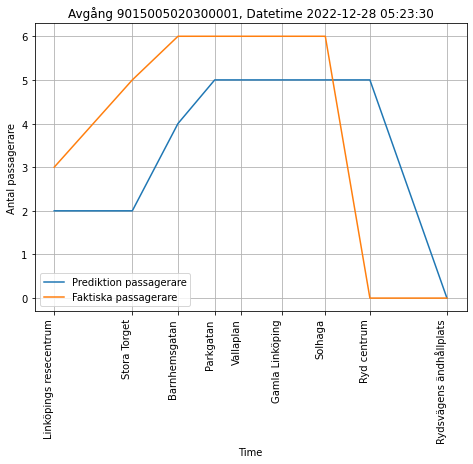

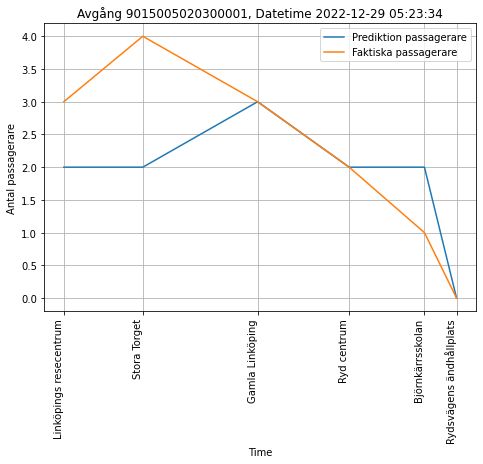

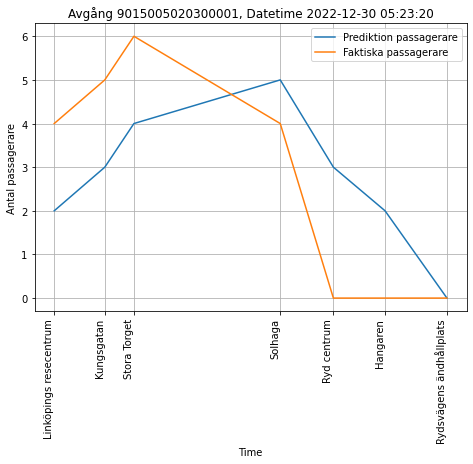

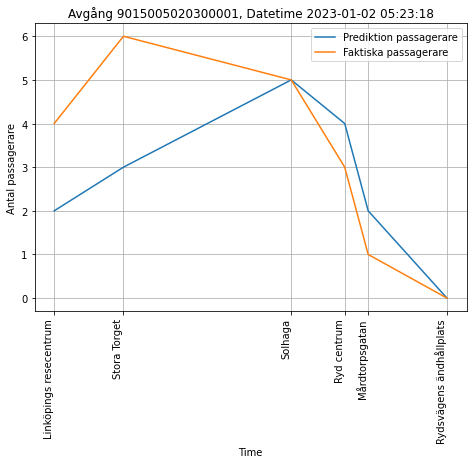

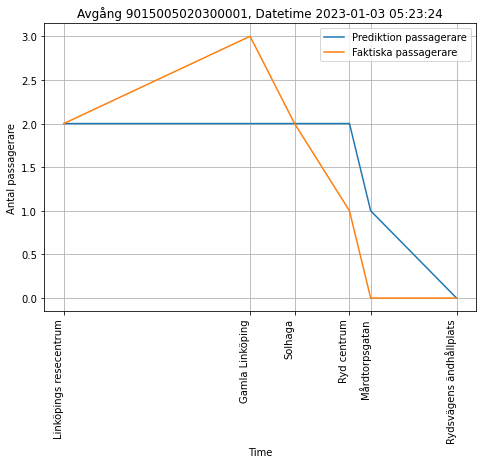

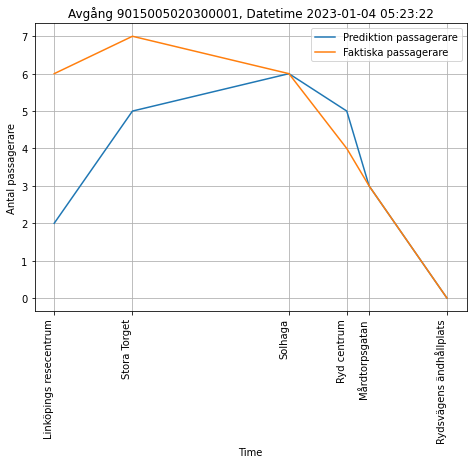

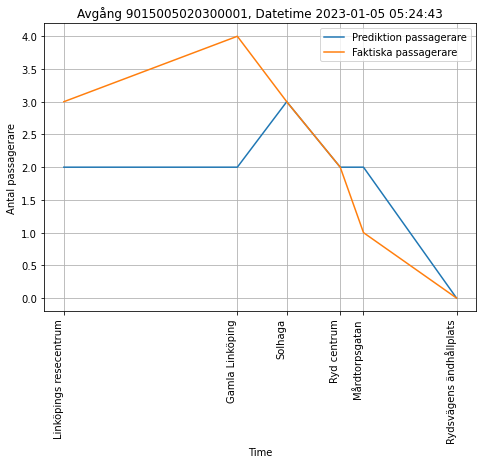

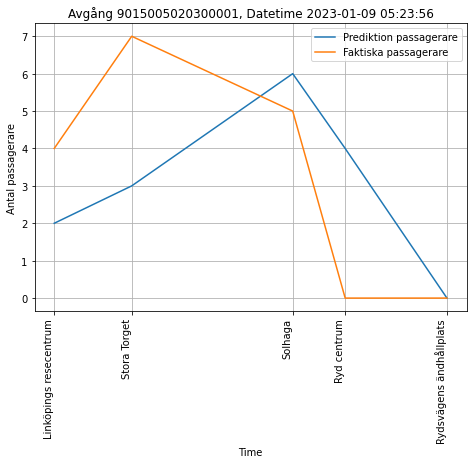

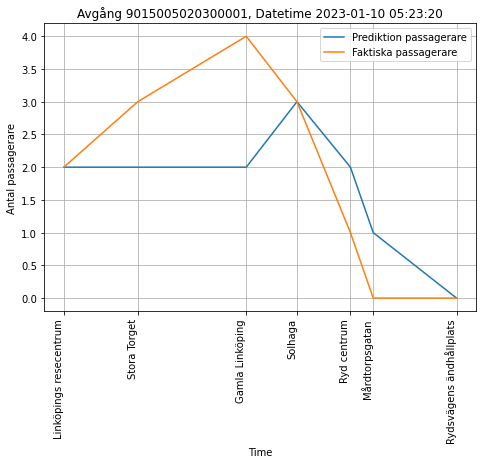

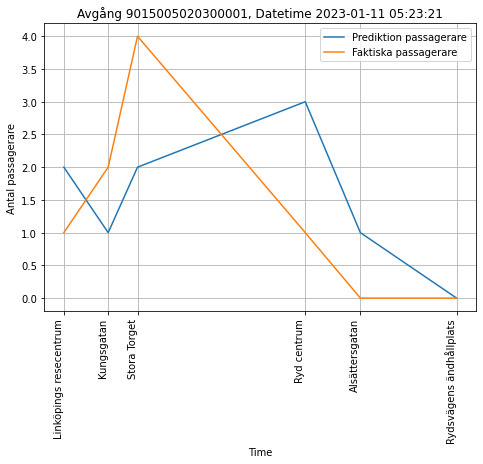

In [53]:
for i in range(0, len(saved_tours)):
    date_time = pd.to_datetime(saved_tours[i]['Tidpunkt'])
    stopname = saved_tours[i]['Hållplatsnamn']
    x_1 = date_time
    y_1 = saved_tours[i]['prediction']
    y_2 = saved_tours[i]['Ombord']
    
    # Visualising the results      
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    fig.autofmt_xdate(rotation=90)
    ax.plot(x_1, y_1)
    ax.plot(x_1, y_2)
    xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xftm)

    ax.grid(True)
    title = 'Avgång ' + str(selected_GID) + ', Datetime ' + saved_tours[i]['Tidpunkt'].iloc[0]
    plt.xlabel('Time')
    plt.ylabel('Antal passagerare')
    plt.title(title)
    plt.xticks(x_1, stopname)   
    plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])

In [54]:
date_time = pd.to_datetime(pd_test_selection['Tidpunkt'])

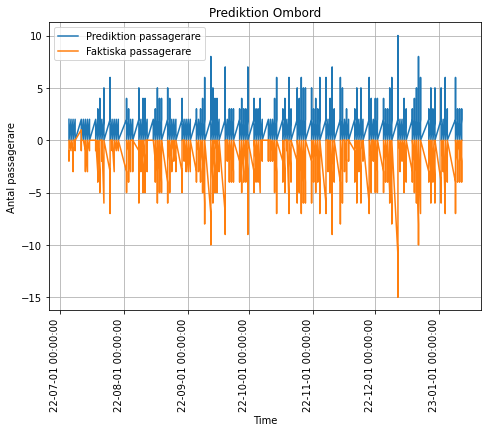

In [55]:
# Visualising the results      
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.autofmt_xdate(rotation=90)
ax.plot(date_time, pd_test_selection['prediction'])
ax.plot(date_time, -1*pd_test_selection['Ombord'])
xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xftm)

ax.grid(True)

plt.title('Prediktion Ombord')
plt.xlabel('Time')
plt.ylabel('Antal passagerare')
plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])

In [56]:
tour_selection_1

SequenceInJourney             Tidpunkt            Hållplatsnamn  \
1099339                  1  2022-07-05 05:23:12   Linköpings resecentrum   
1099340                  3  2022-07-05 05:26:35          Trädgårdstorget   
1099341                  8  2022-07-05 05:34:59                  Solhaga   
1099342                 14  2022-07-05 05:40:56  Rydsvägens ändhållplats   

         Ombord  prediction  error  
1099339     1.0         2.0    1.0  
1099340     2.0         1.0    1.0  
1099341     1.0         2.0    1.0  
1099342     0.0         0.0    1.0

In [57]:
date_time = pd.to_datetime(tour_selection_1['Tidpunkt'])
stopname = tour_selection_1['Hållplatsnamn']
stopname

1099339     Linköpings resecentrum
1099340            Trädgårdstorget
1099341                    Solhaga
1099342    Rydsvägens ändhållplats
Name: Hållplatsnamn, dtype: object

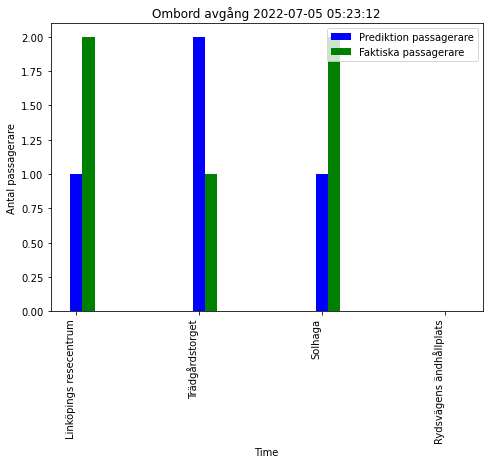

In [58]:
X = np.arange(len(tour_selection_1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.autofmt_xdate(rotation=90)
ax.bar(X + 0.00, tour_selection_1['Ombord'].values, color = 'b', width = 0.1)
ax.bar(X + 0.10, tour_selection_1['prediction'].values, color = 'g', width = 0.1)

xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xftm)
title = 'Ombord avgång ' + tour_selection_1['Tidpunkt'].iloc[0]
plt.xlabel('Time')
plt.ylabel('Antal passagerare')
plt.title(title)
plt.xticks(X, stopname)   
plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])

C:\Users\USER88~1\AppData\Local\Temp/ipykernel_19388/2923658565.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


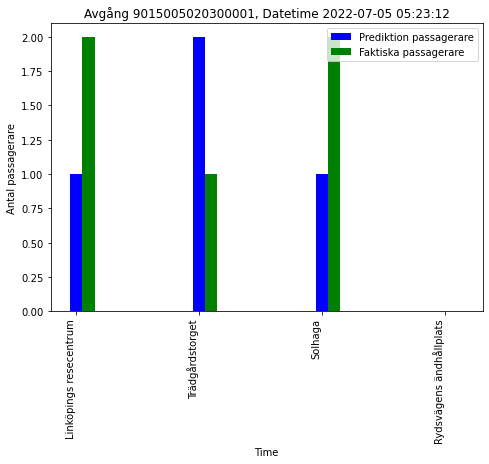

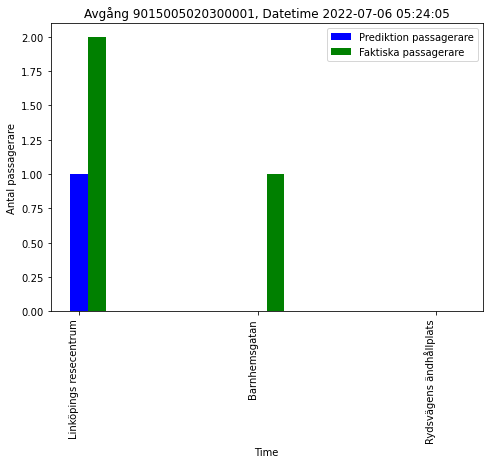

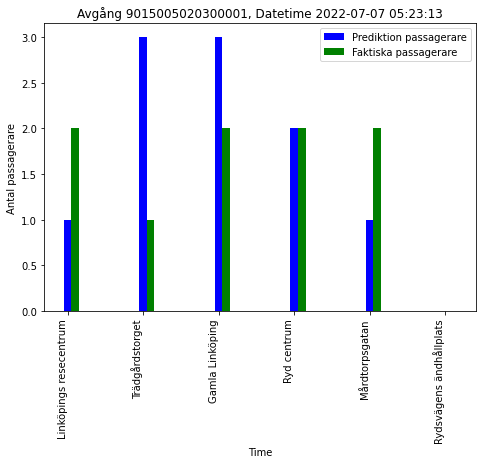

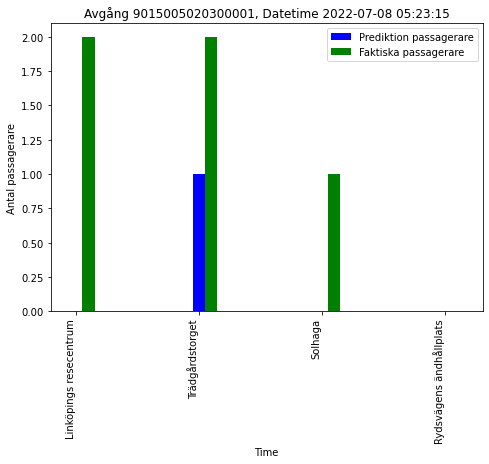

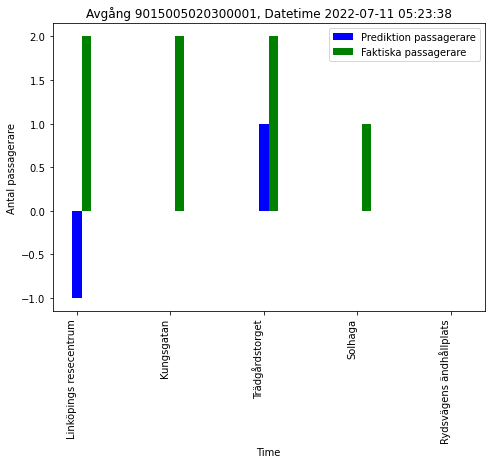

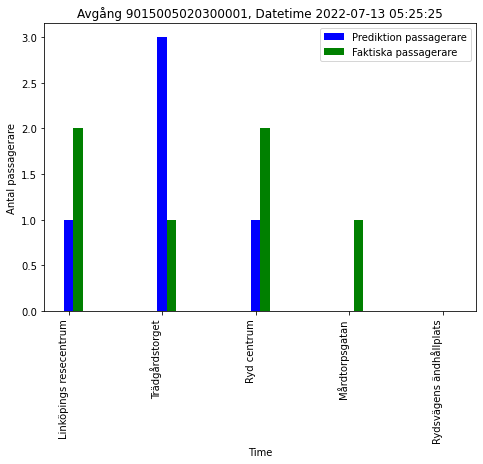

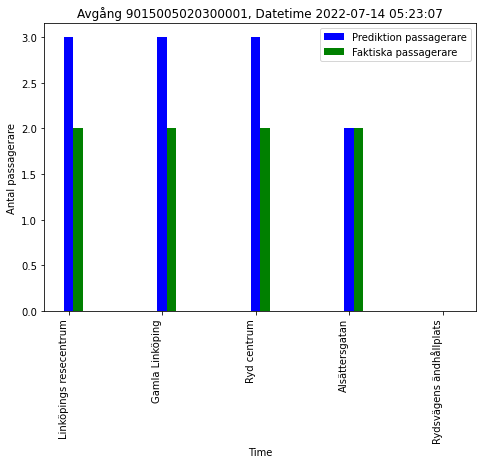

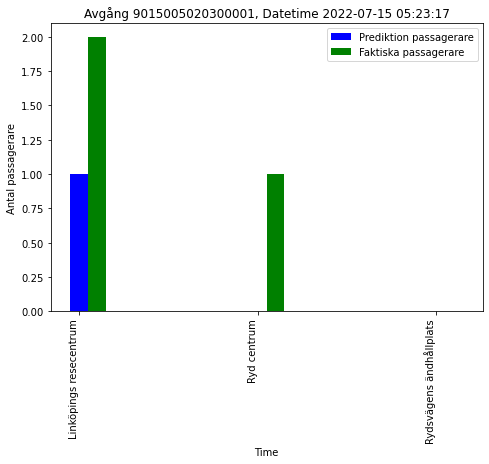

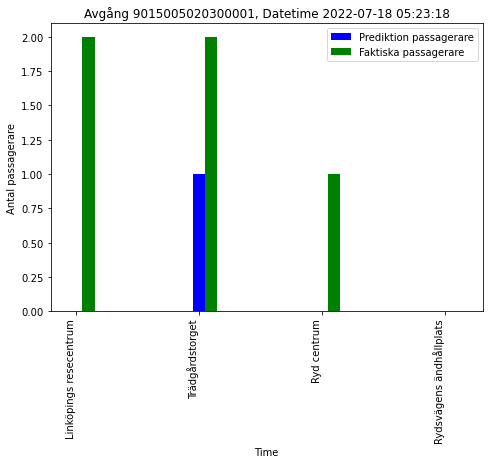

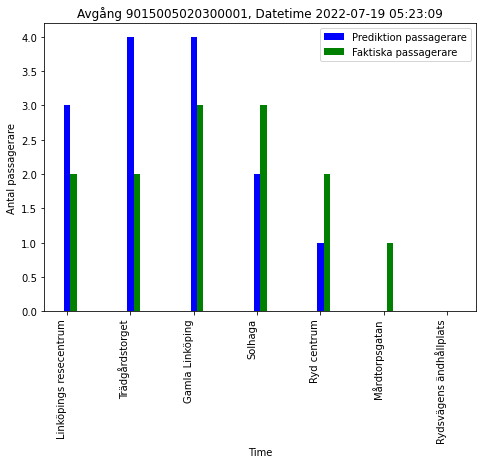

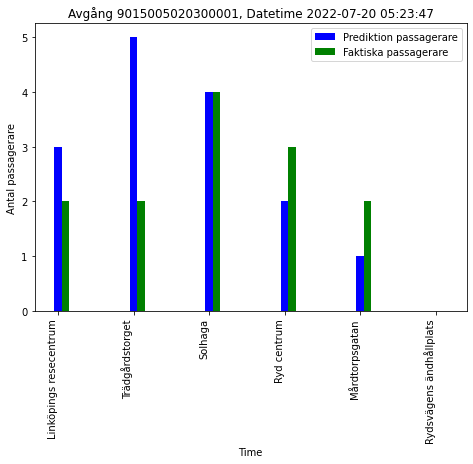

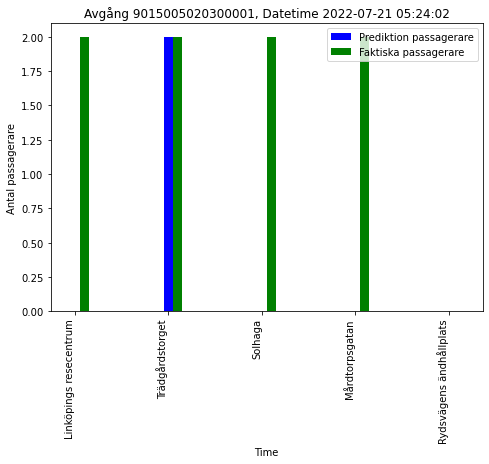

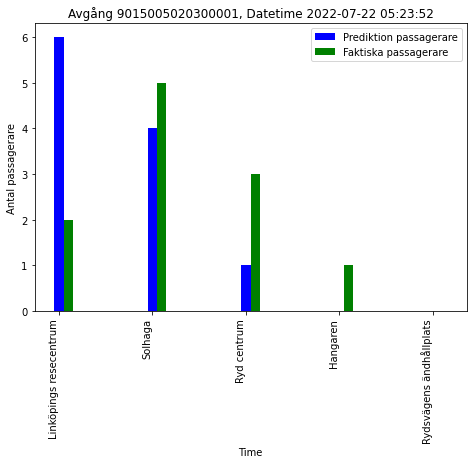

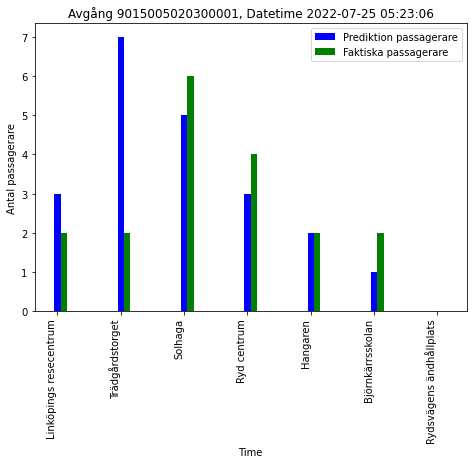

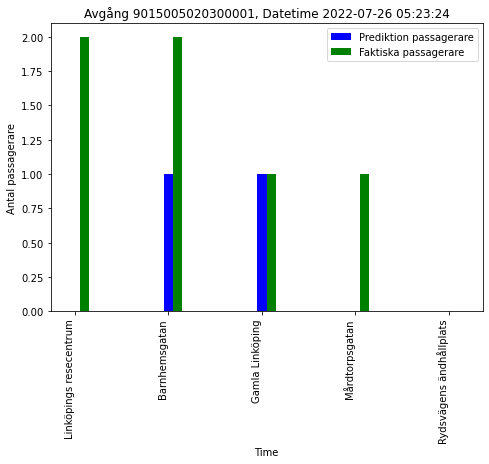

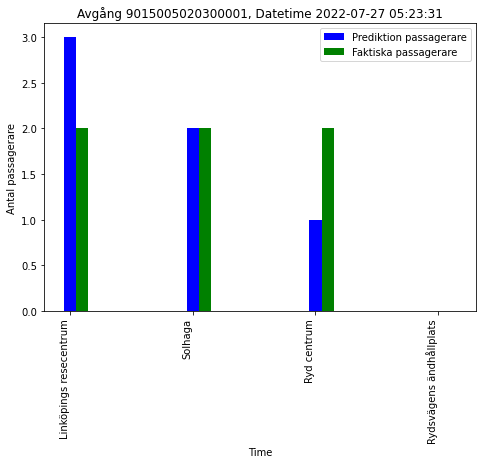

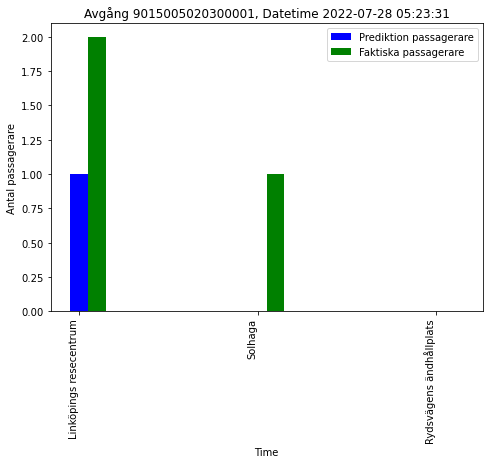

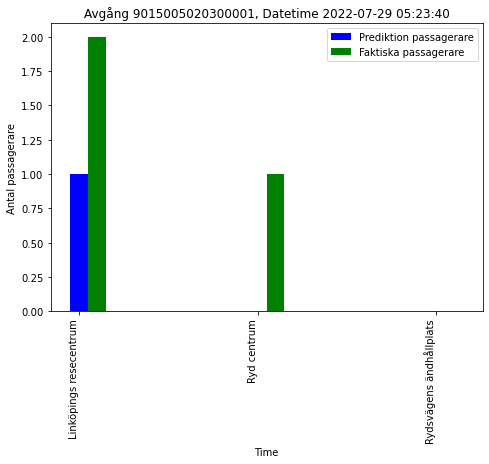

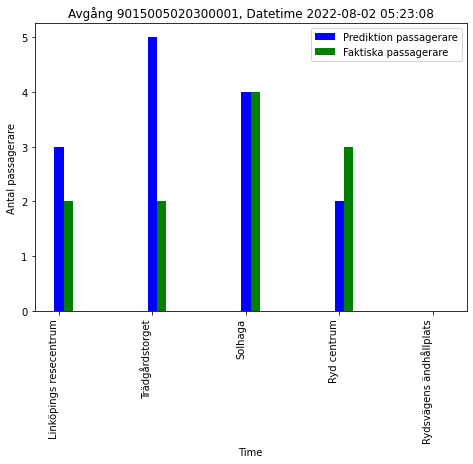

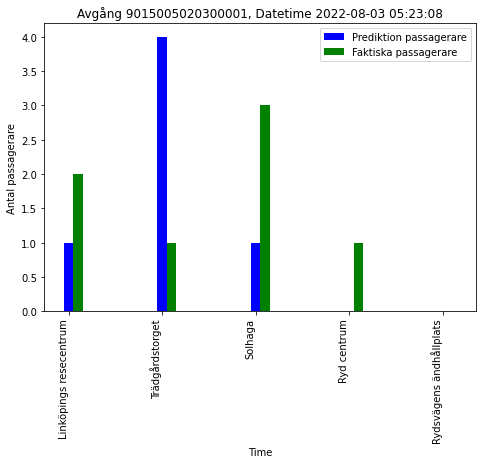

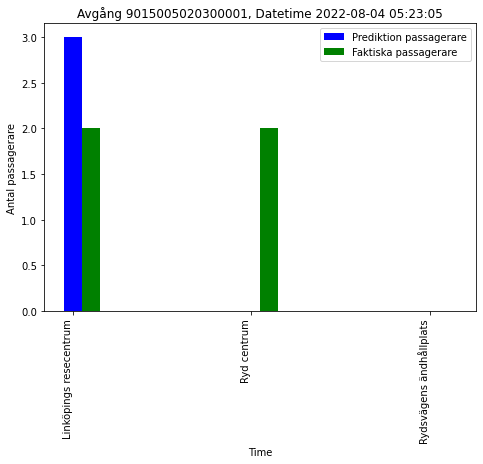

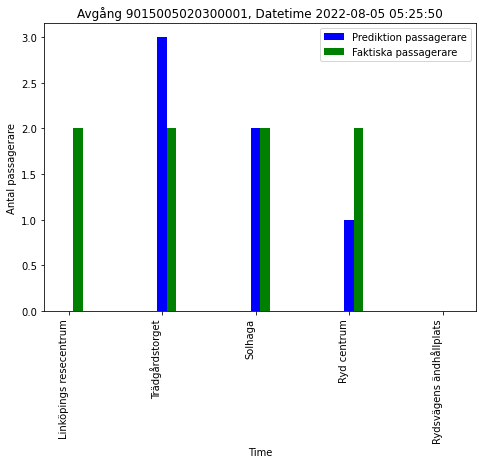

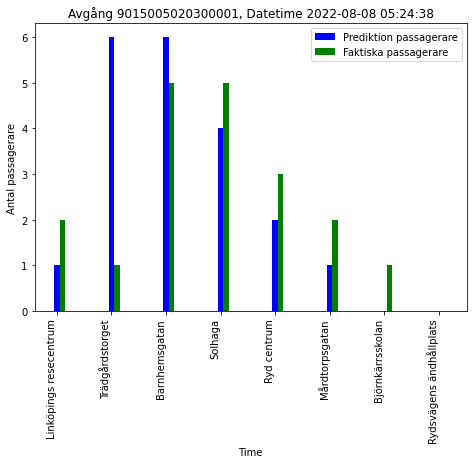

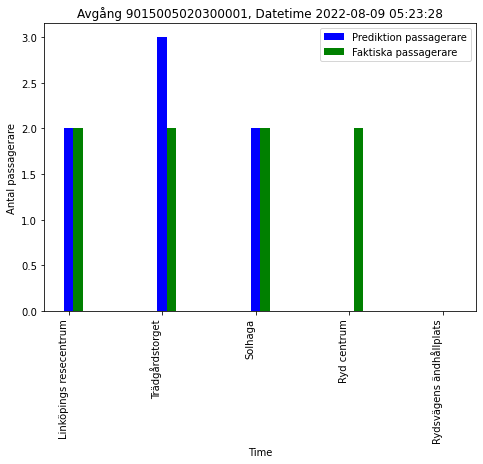

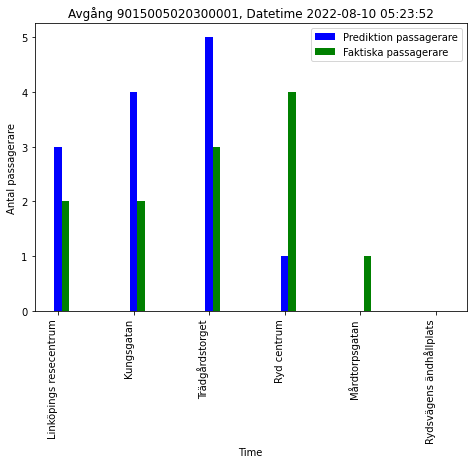

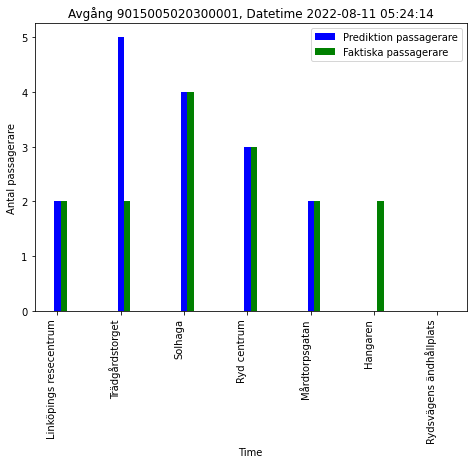

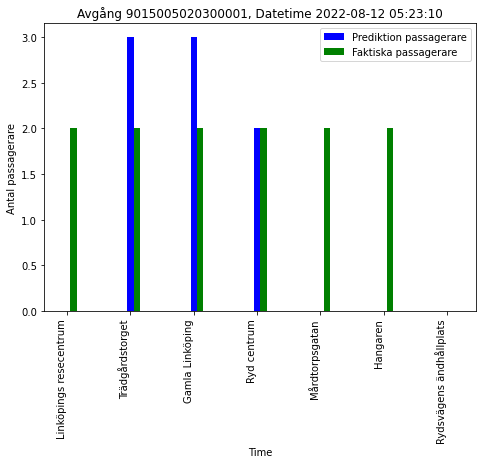

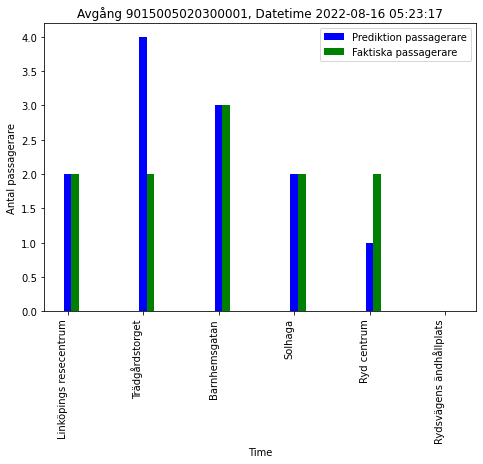

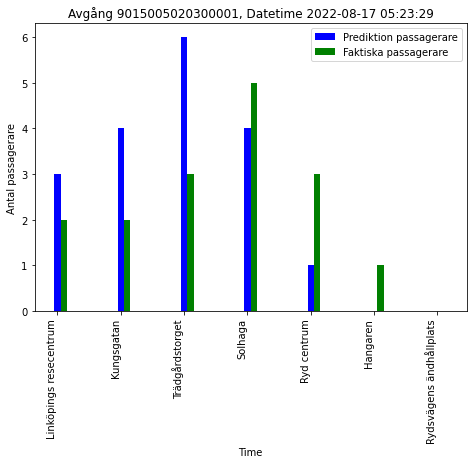

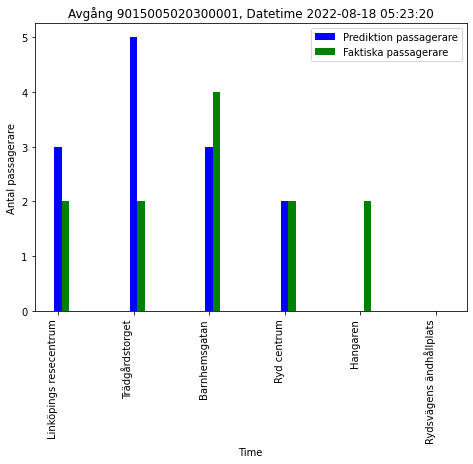

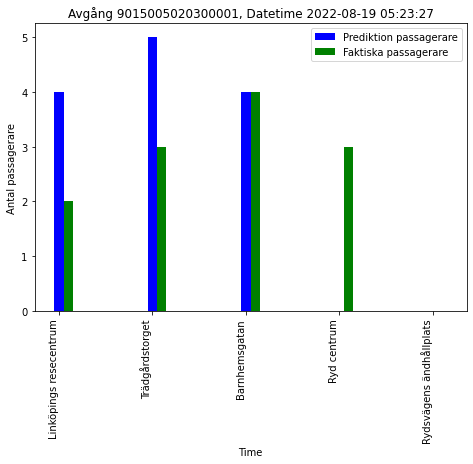

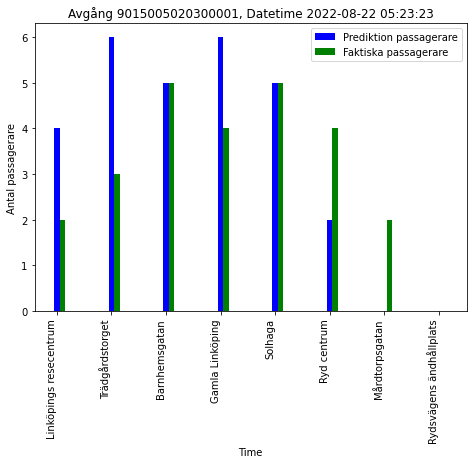

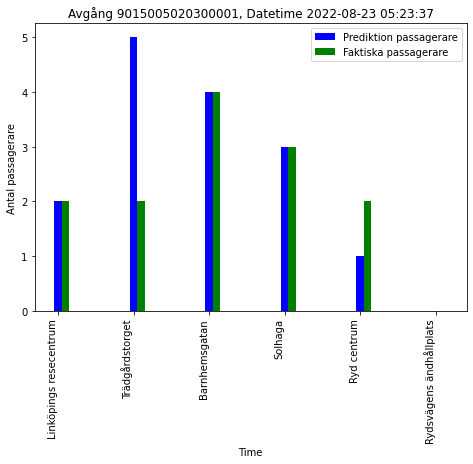

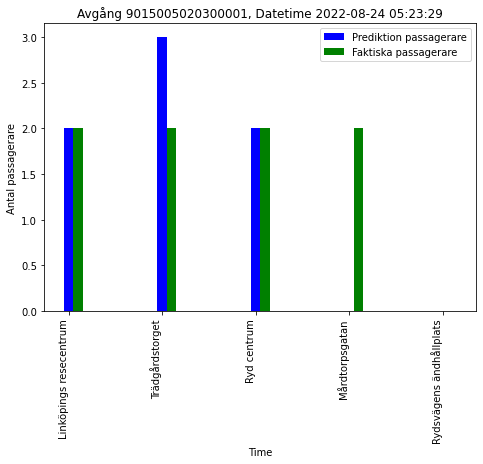

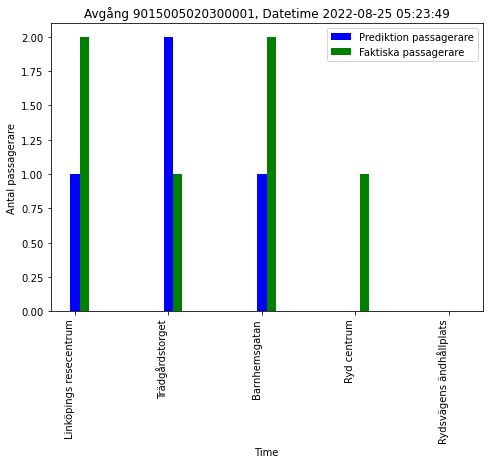

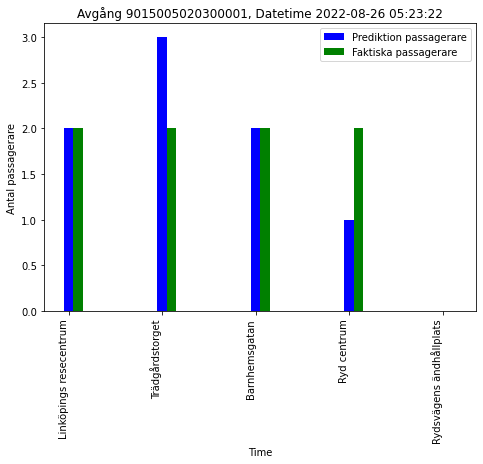

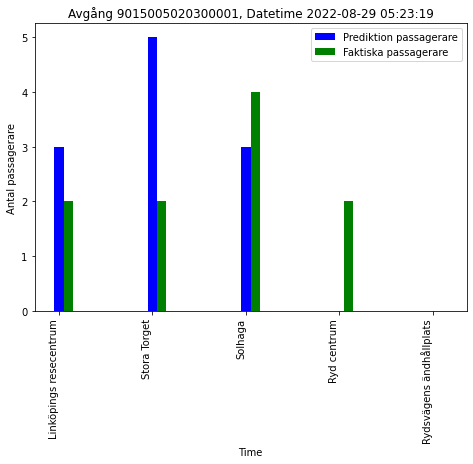

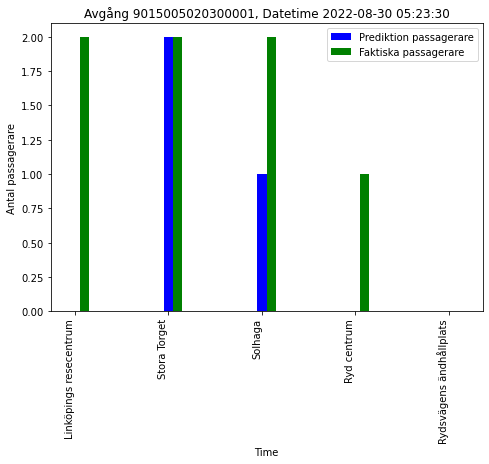

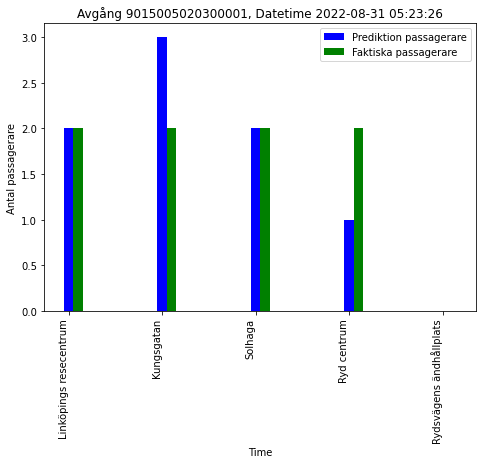

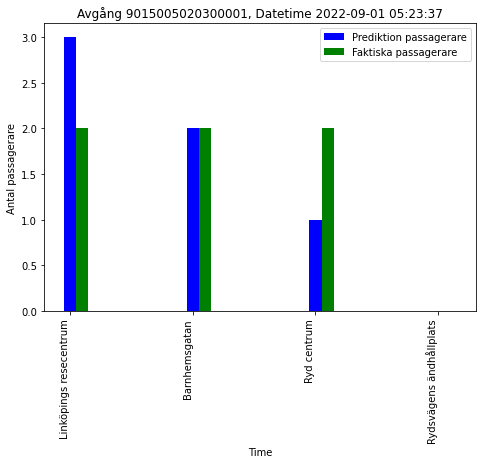

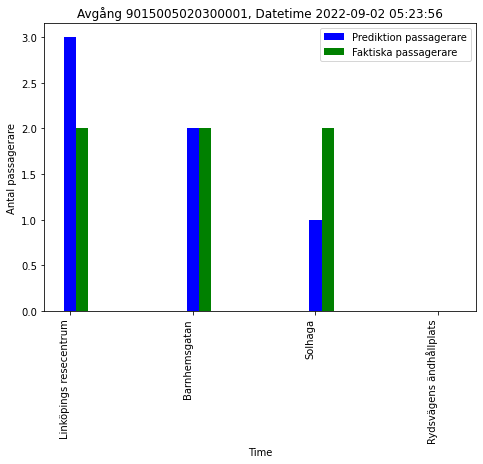

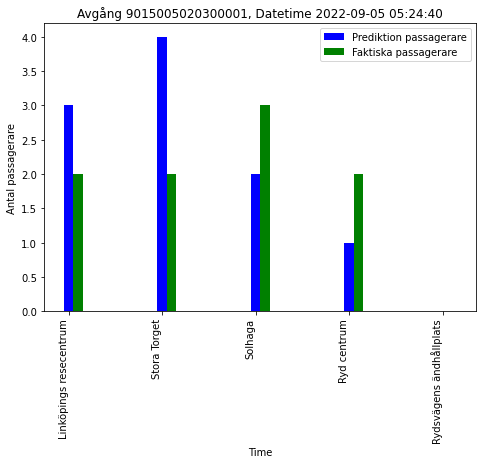

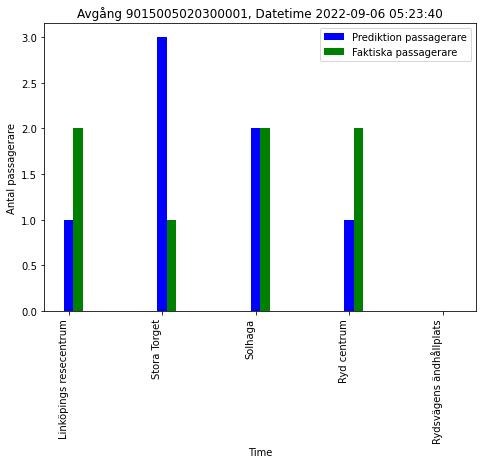

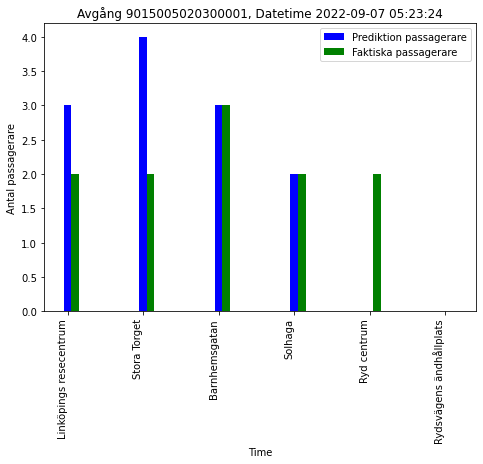

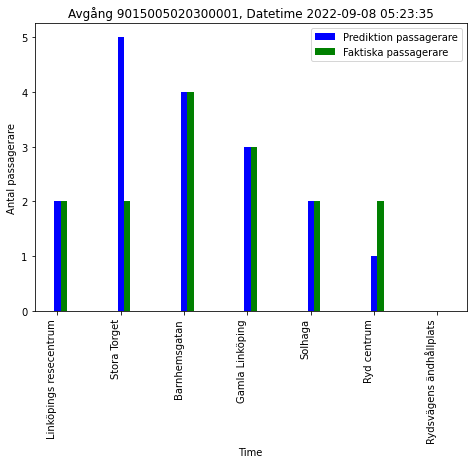

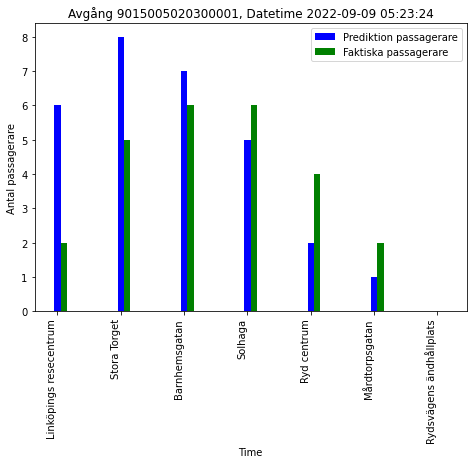

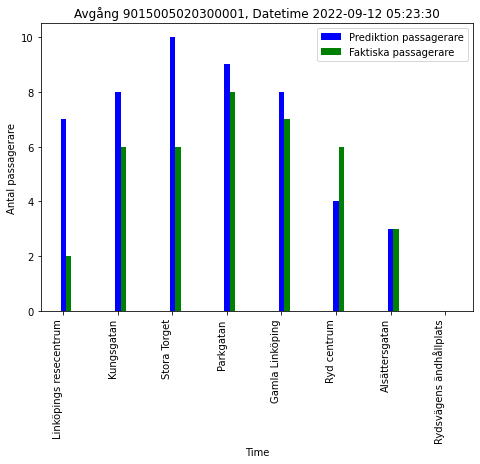

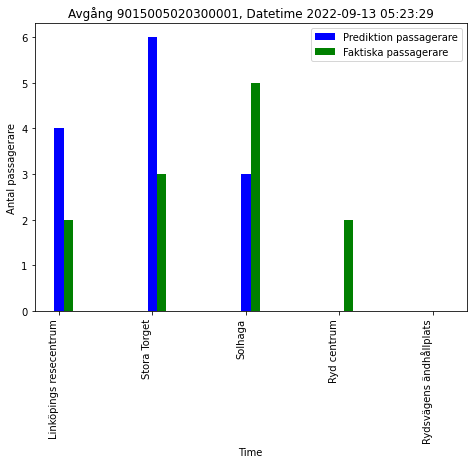

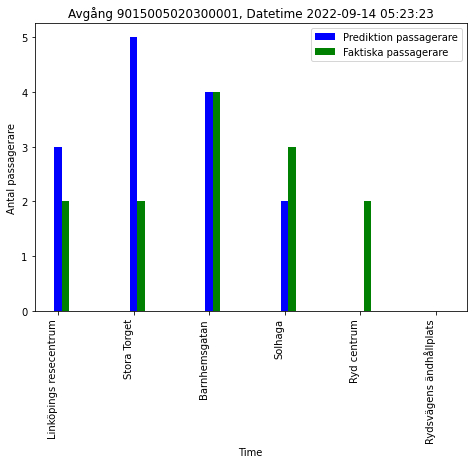

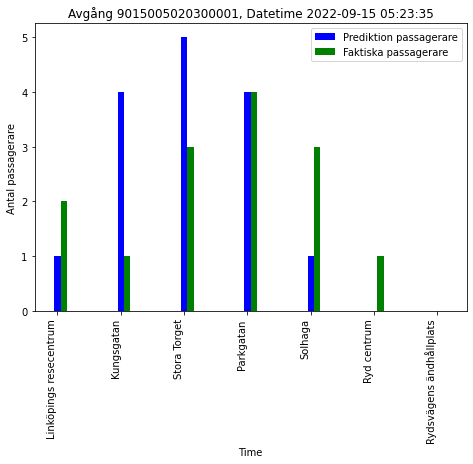

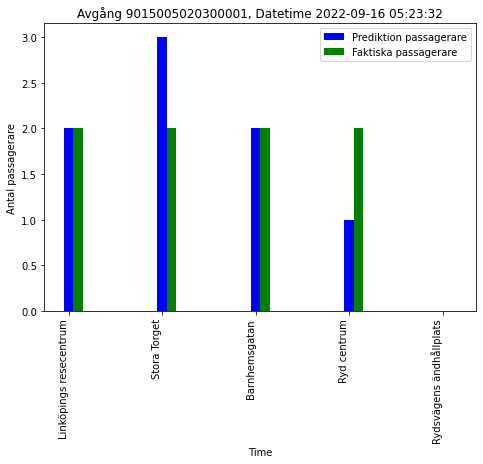

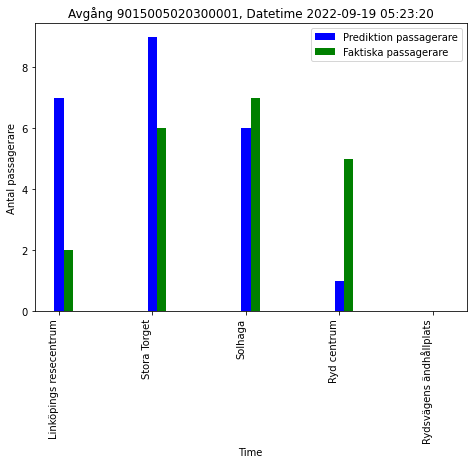

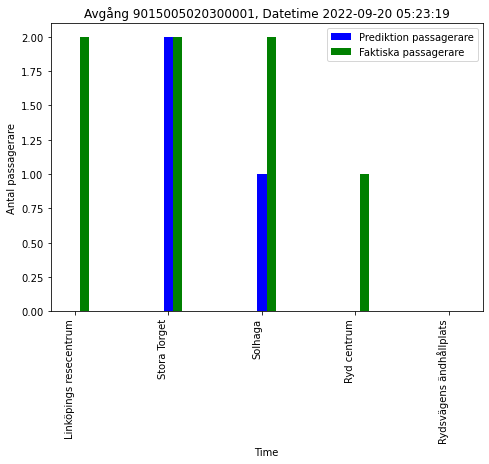

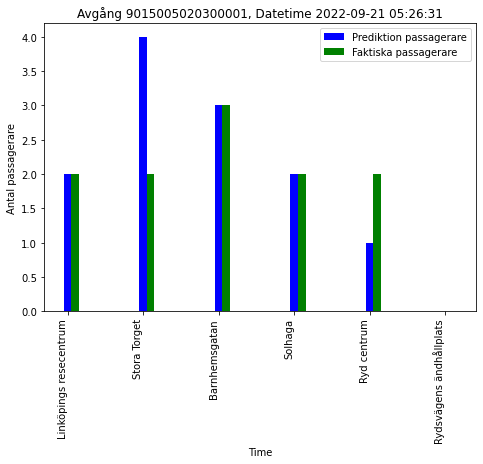

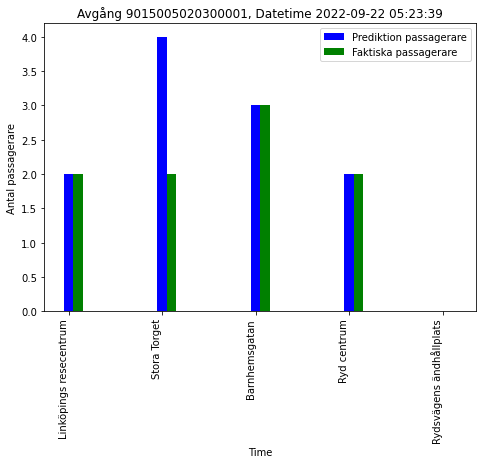

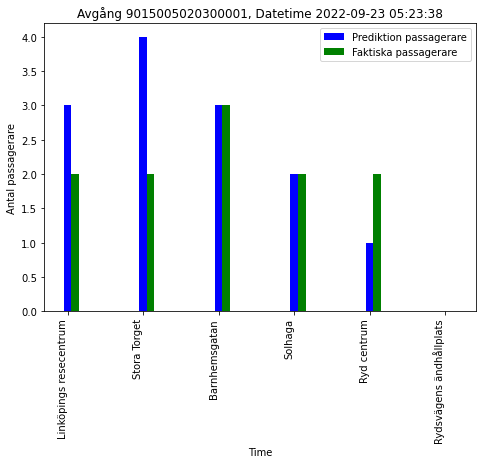

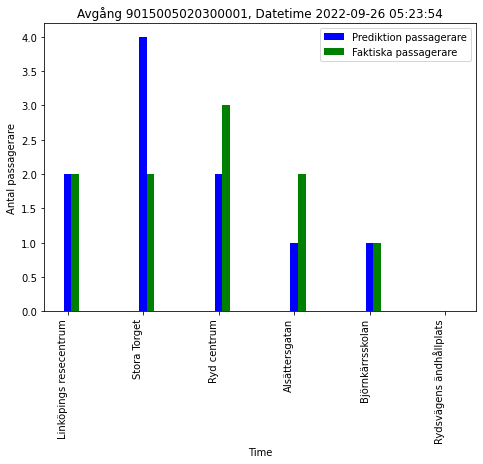

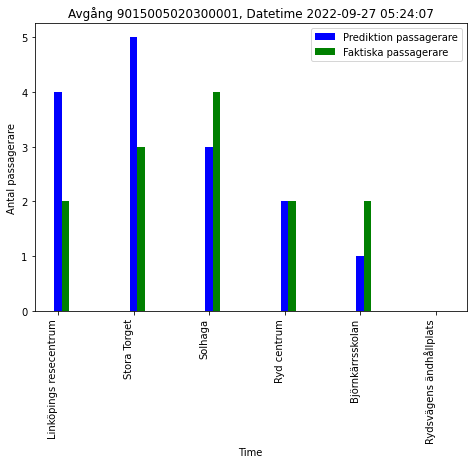

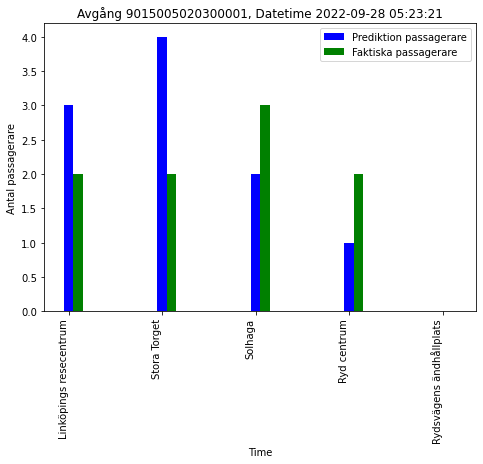

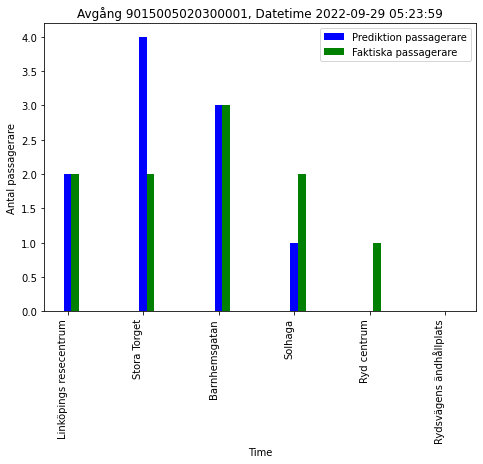

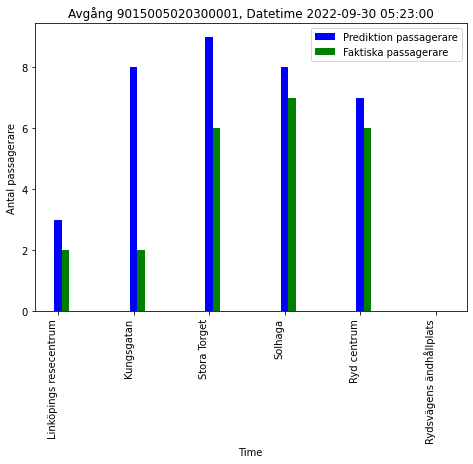

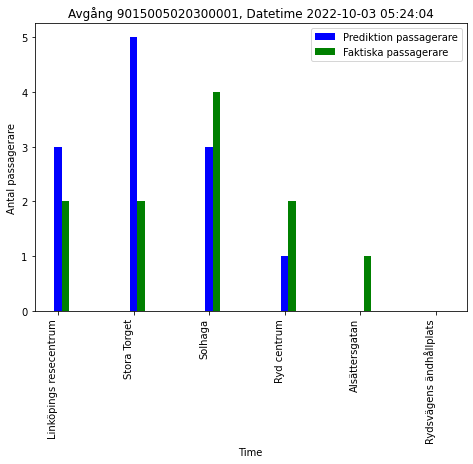

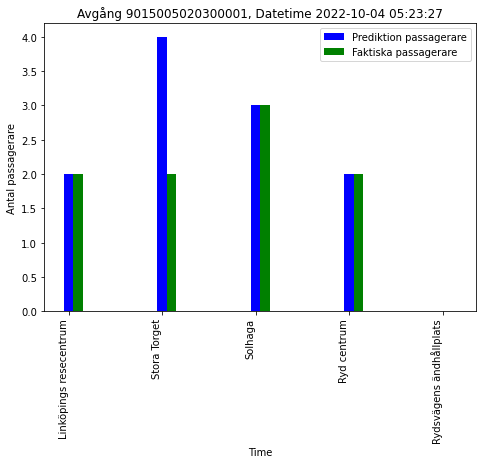

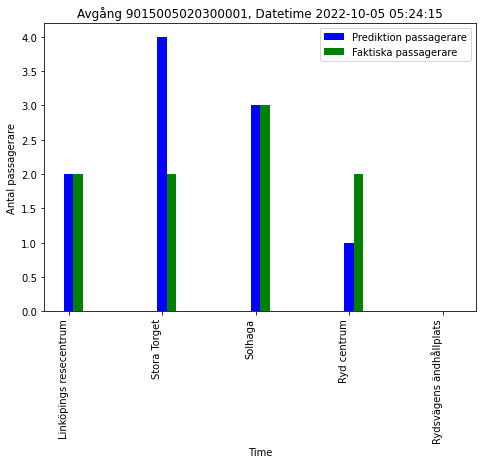

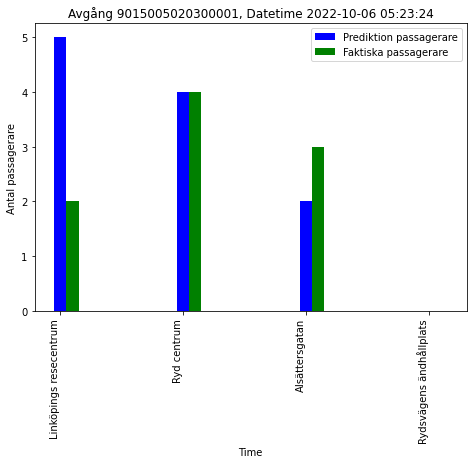

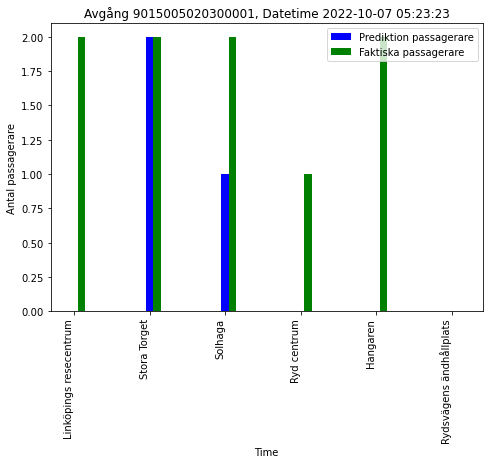

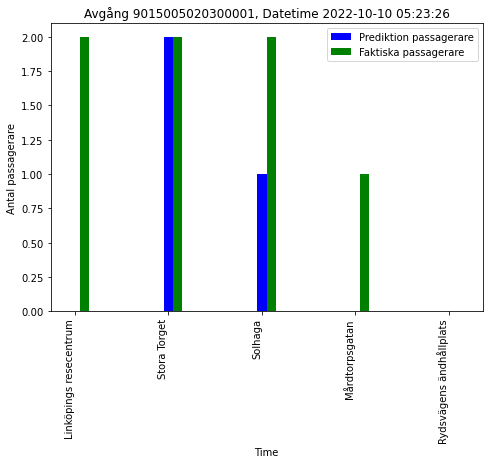

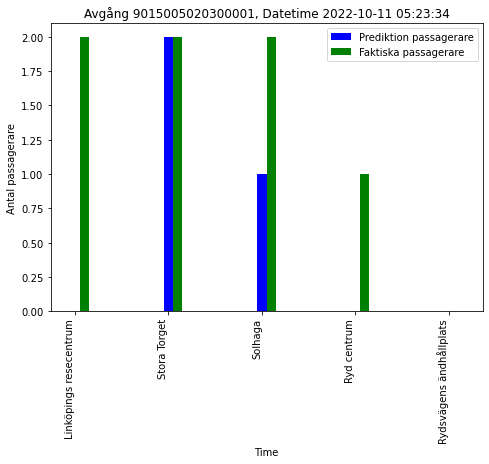

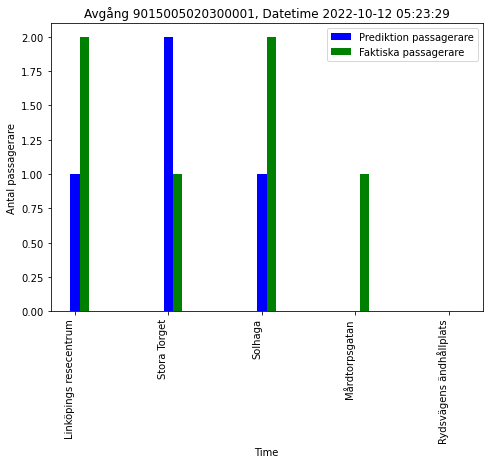

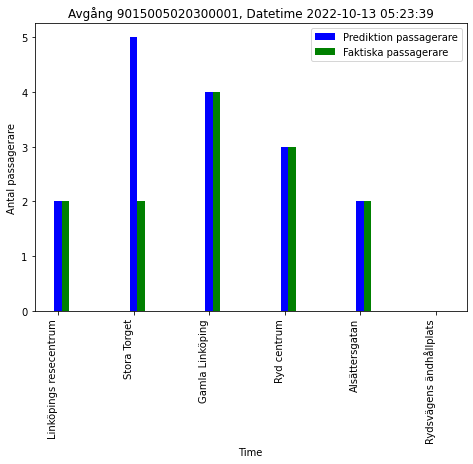

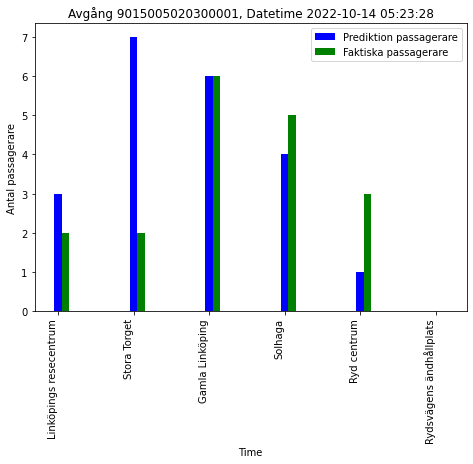

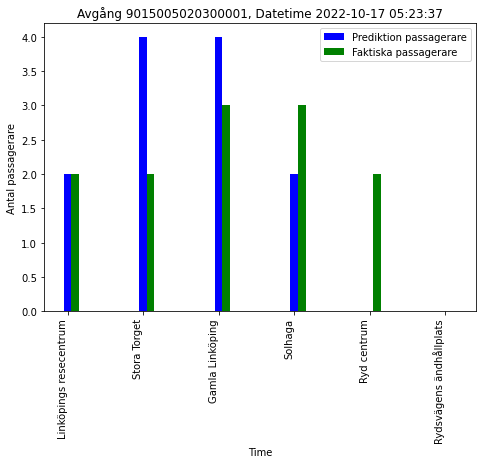

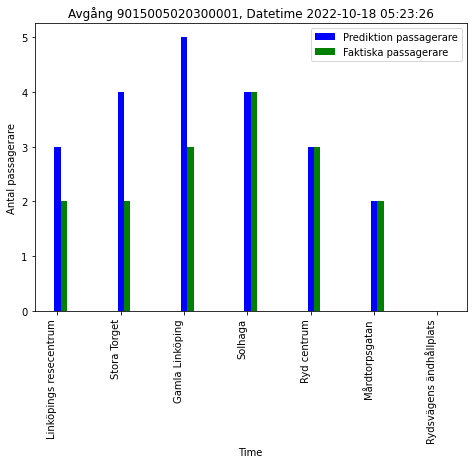

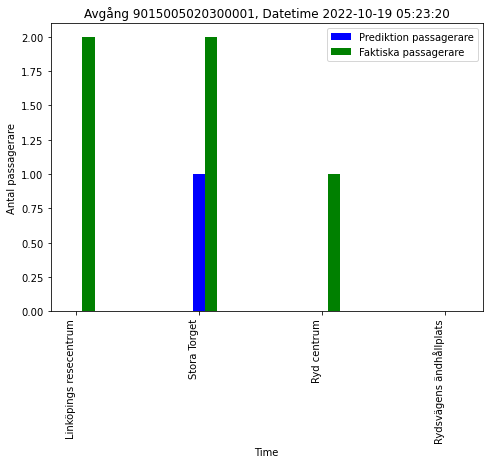

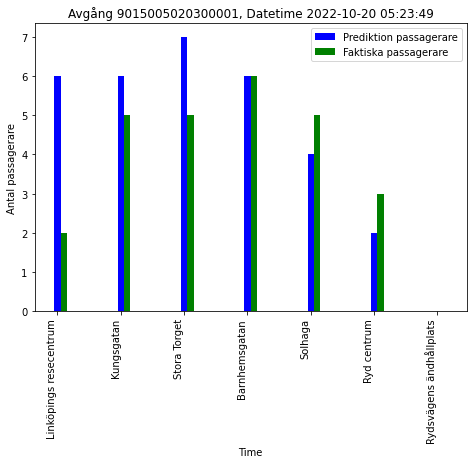

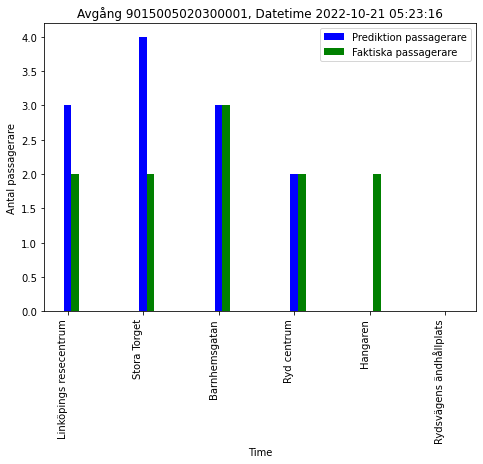

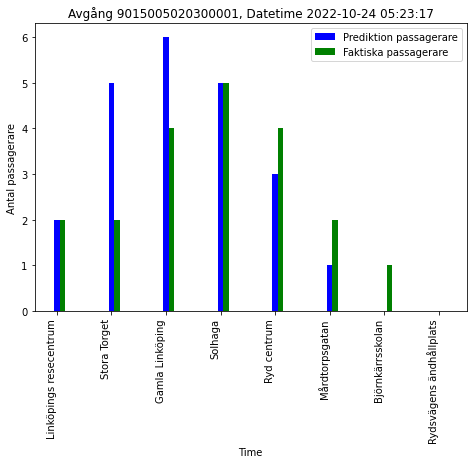

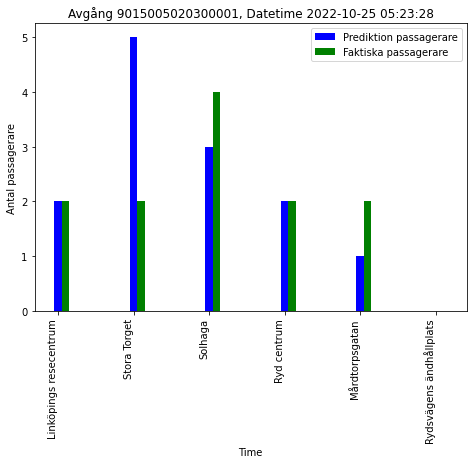

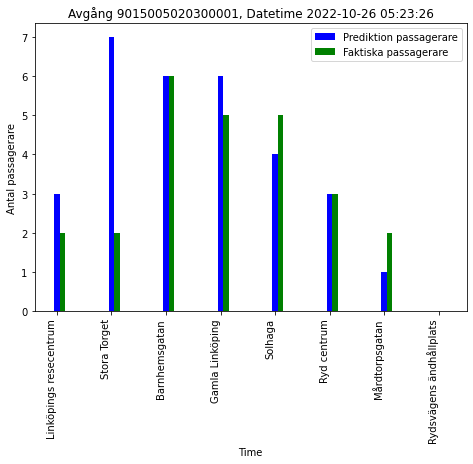

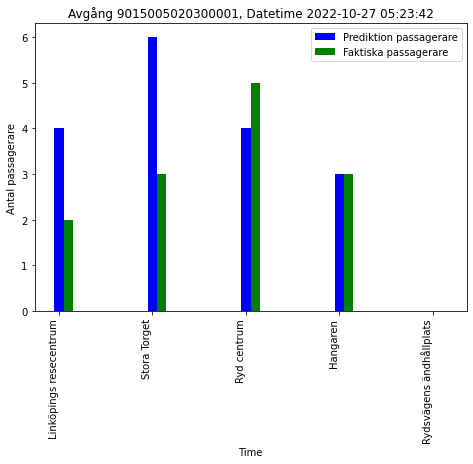

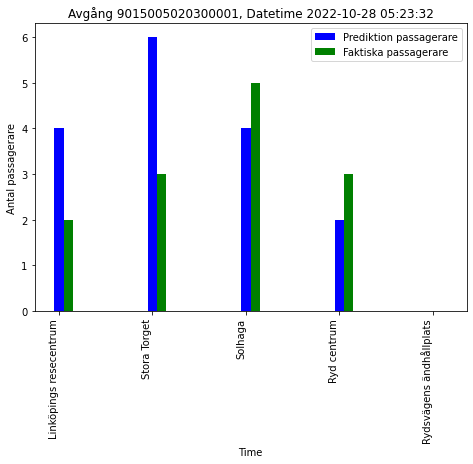

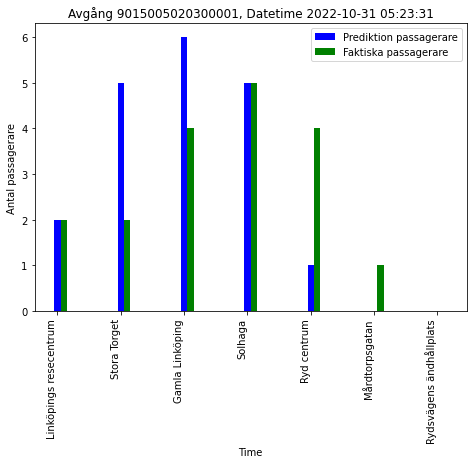

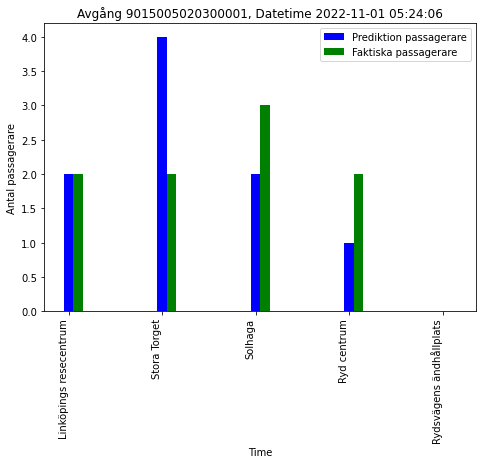

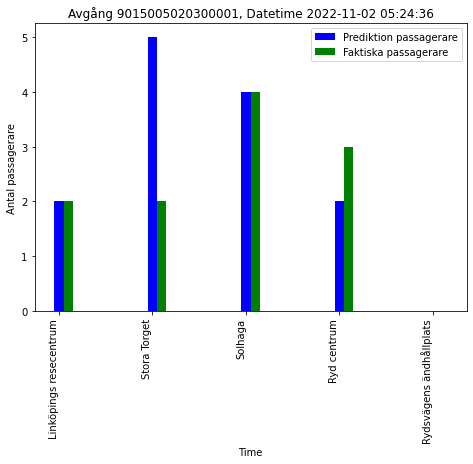

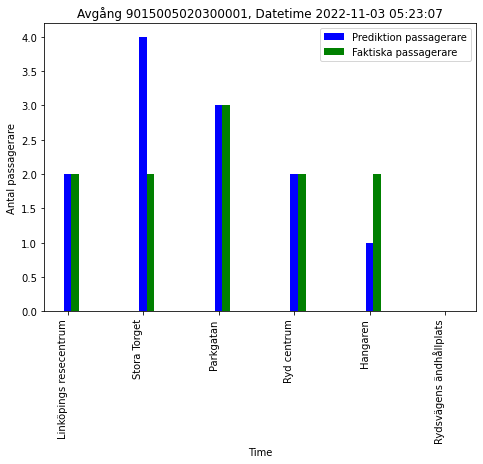

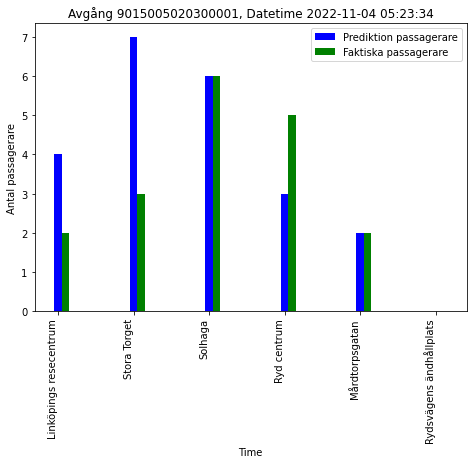

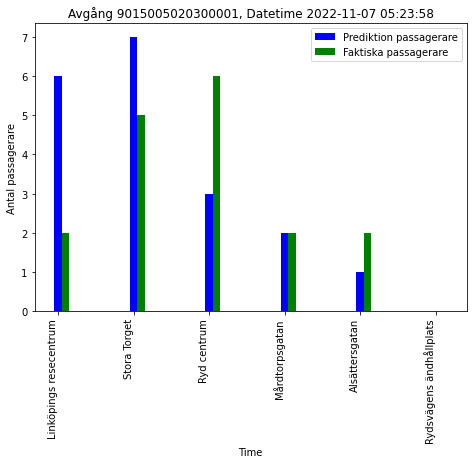

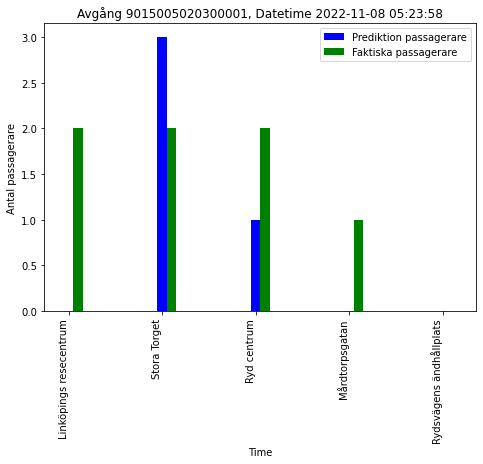

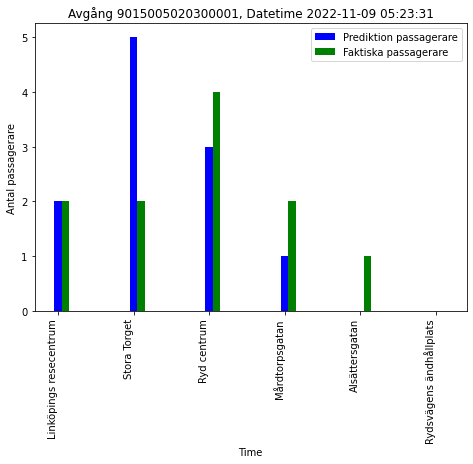

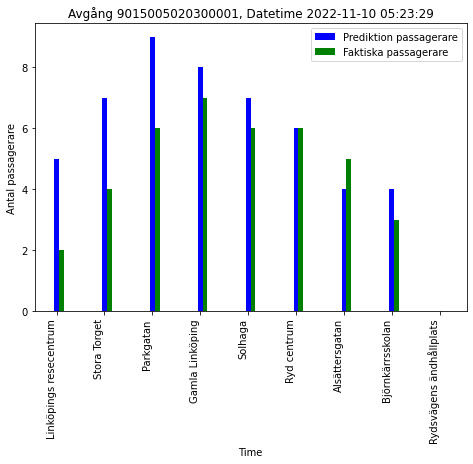

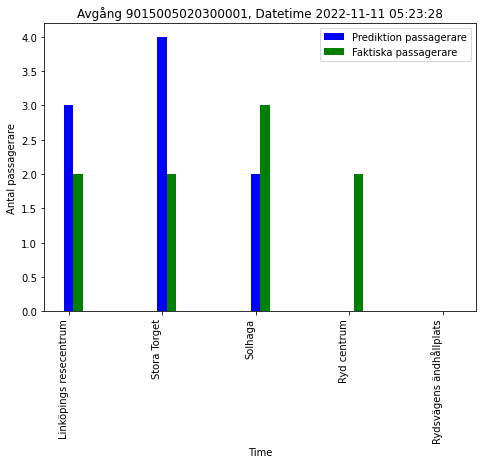

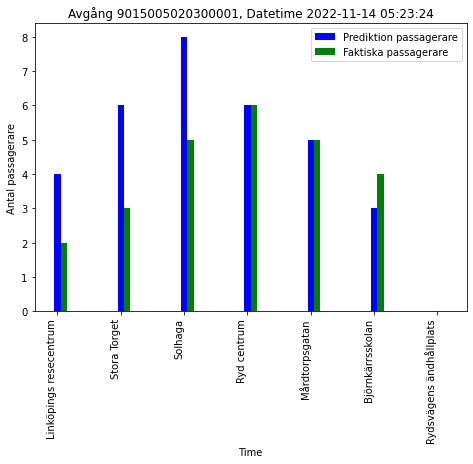

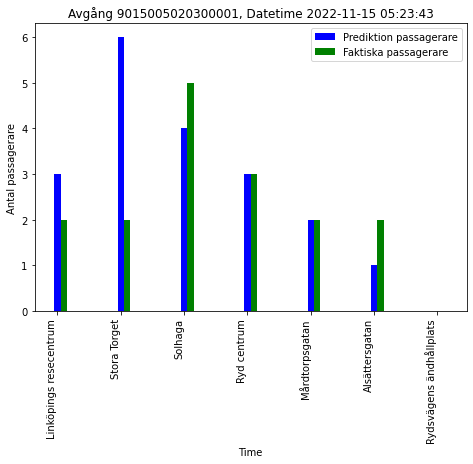

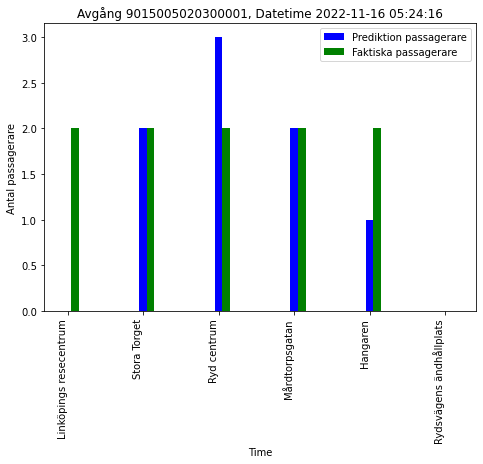

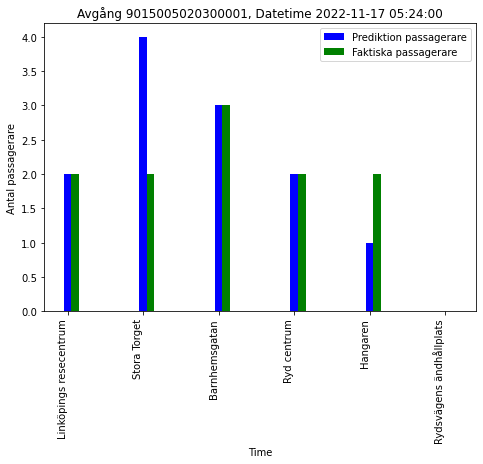

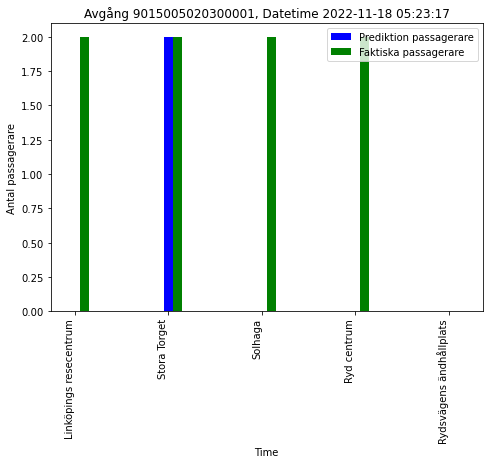

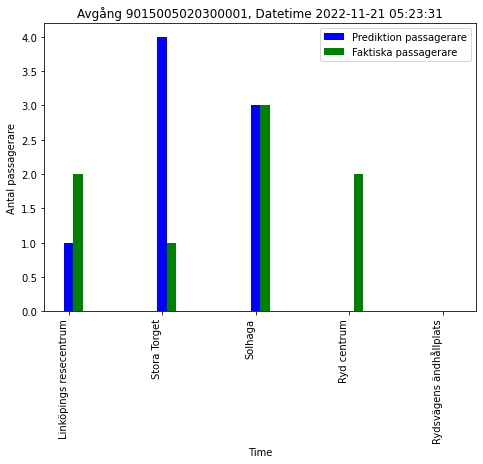

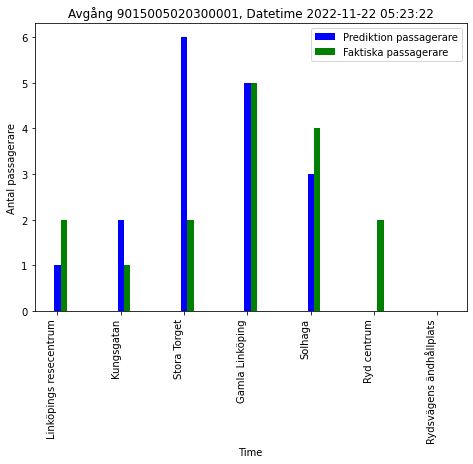

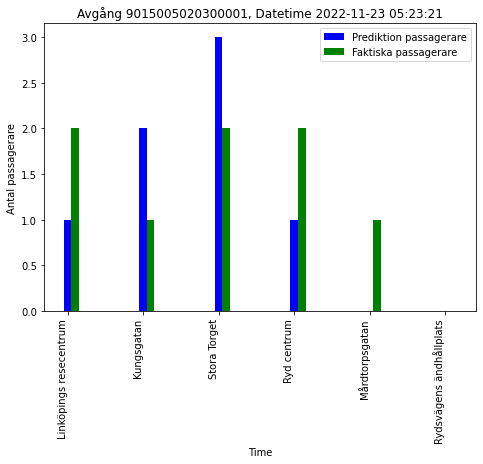

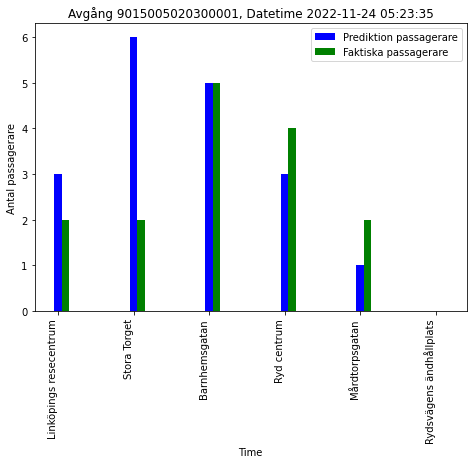

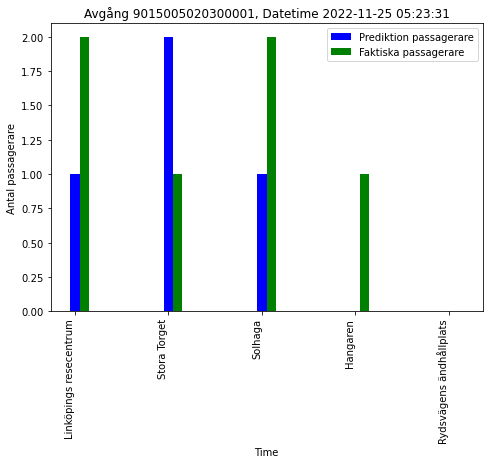

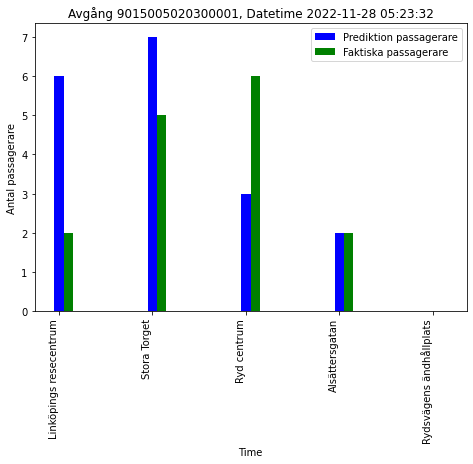

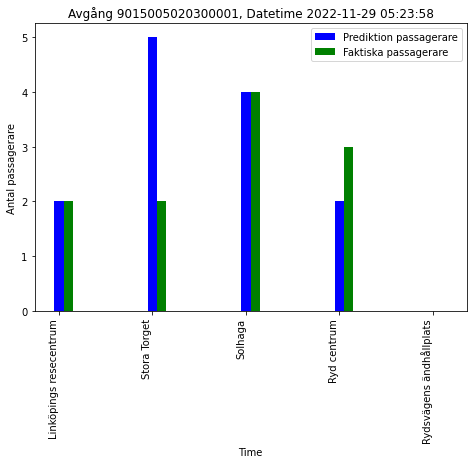

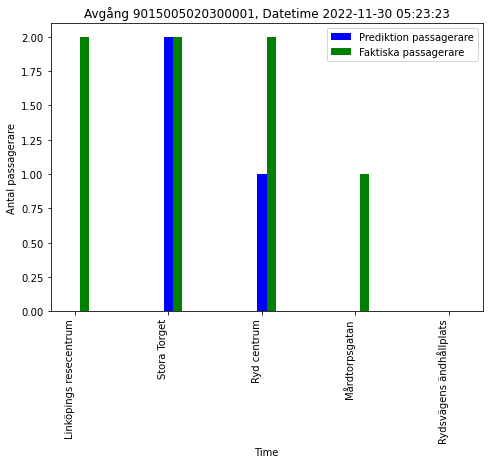

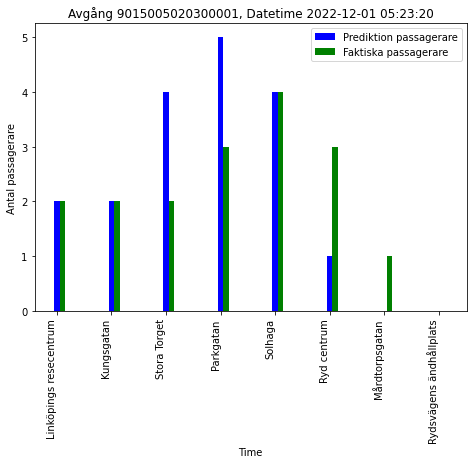

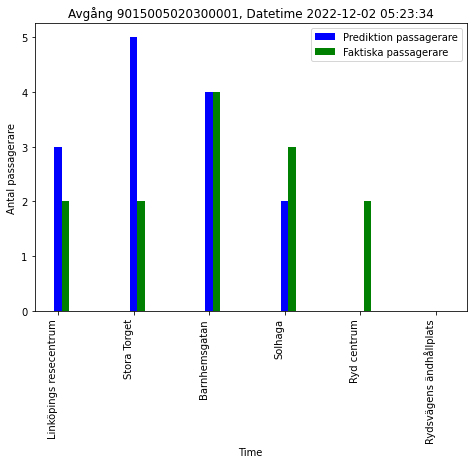

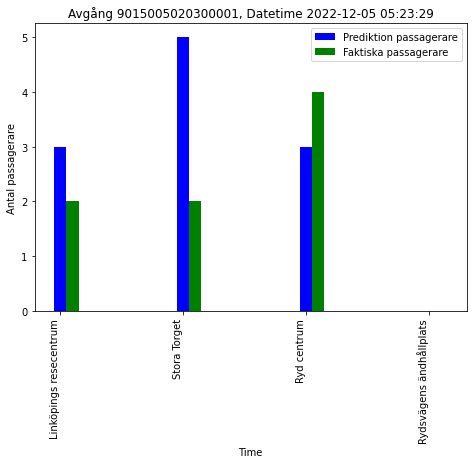

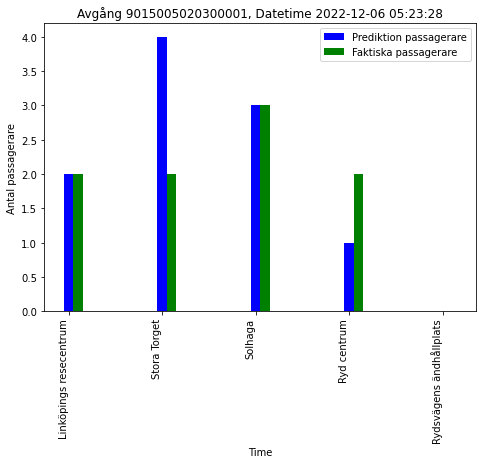

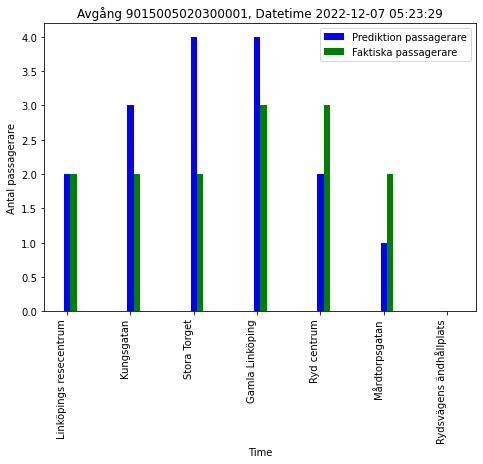

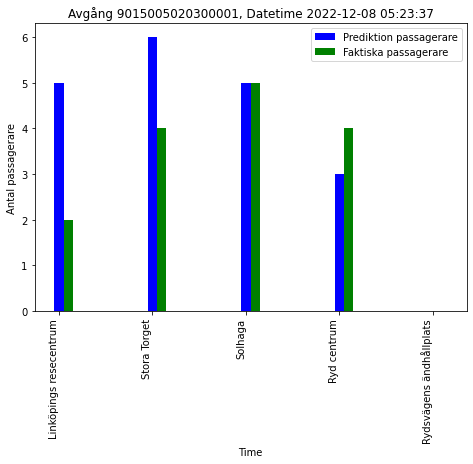

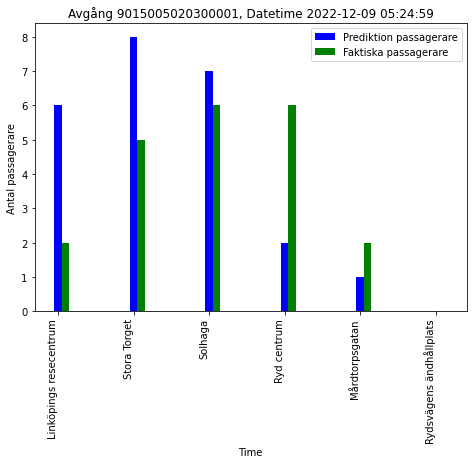

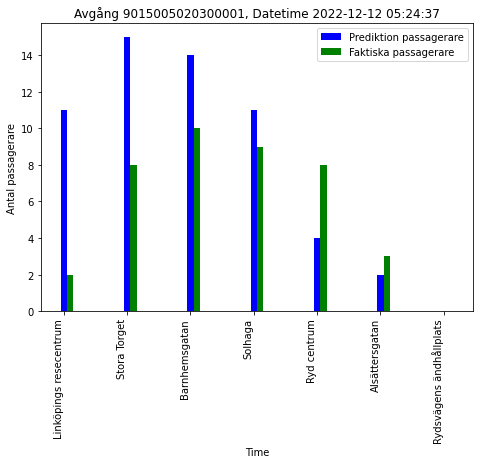

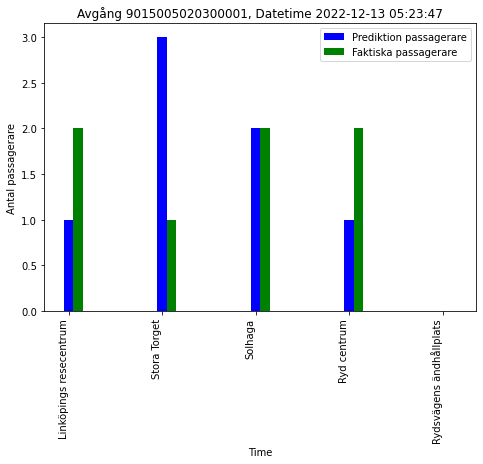

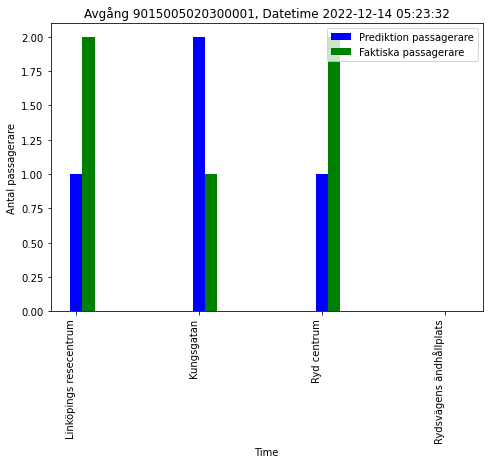

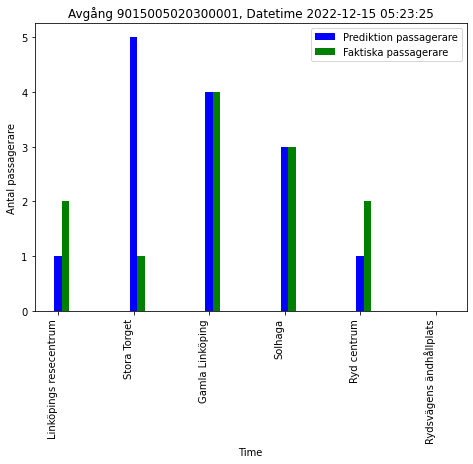

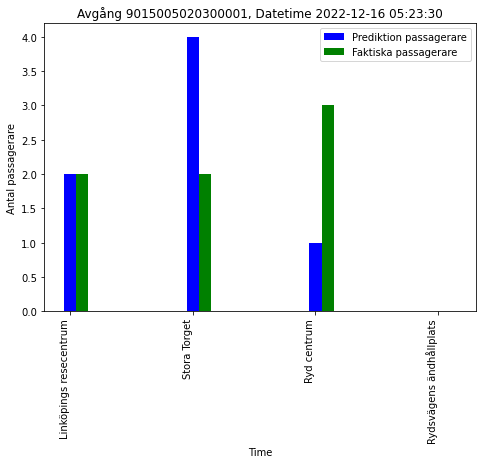

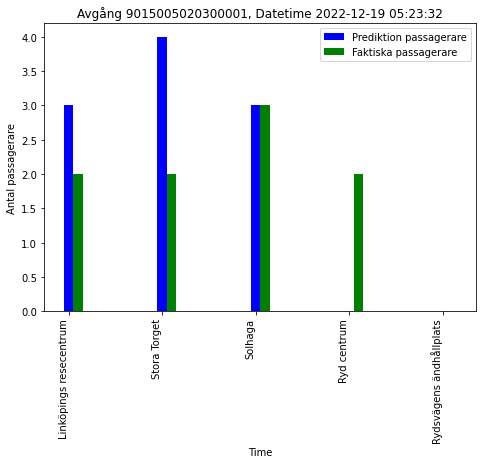

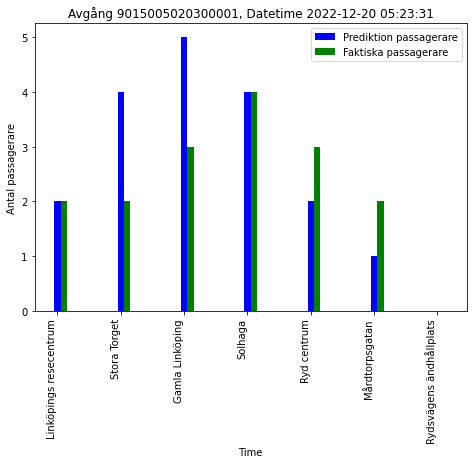

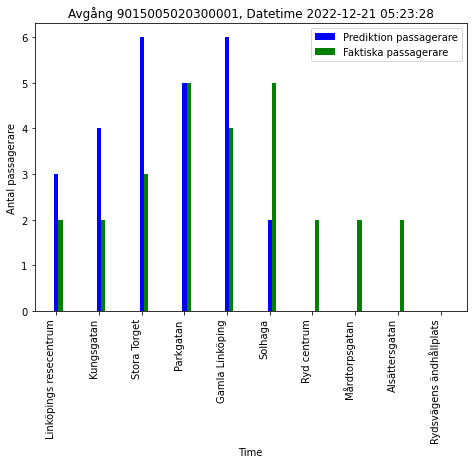

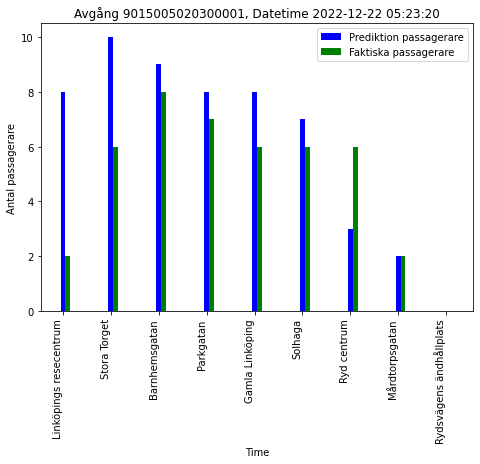

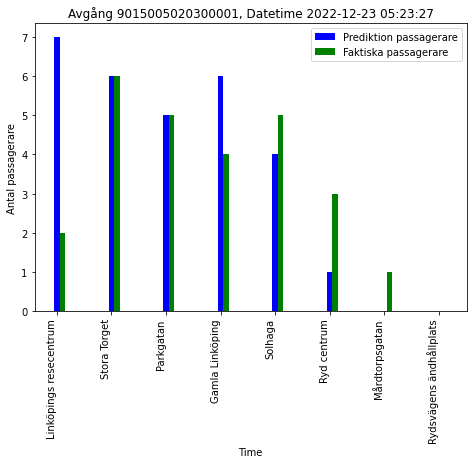

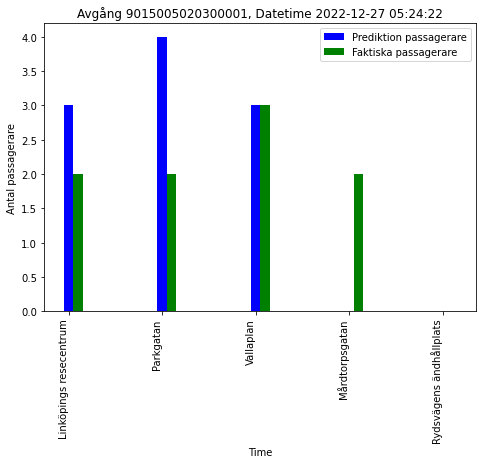

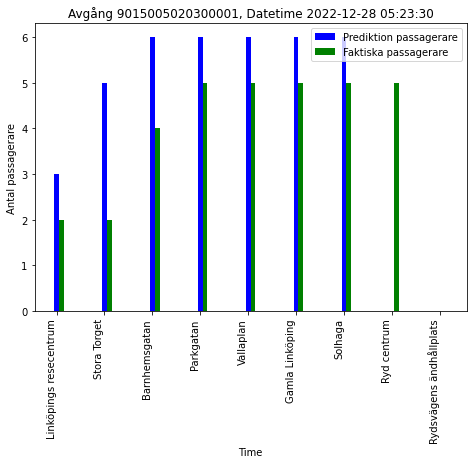

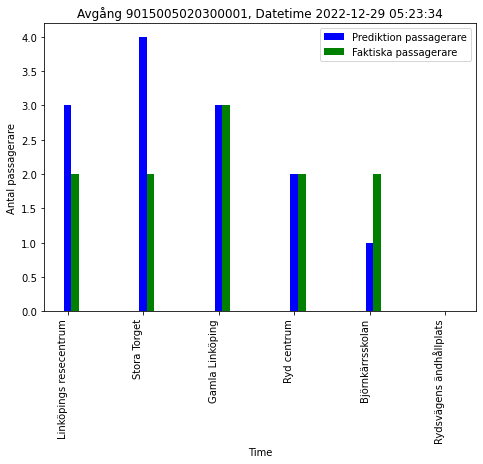

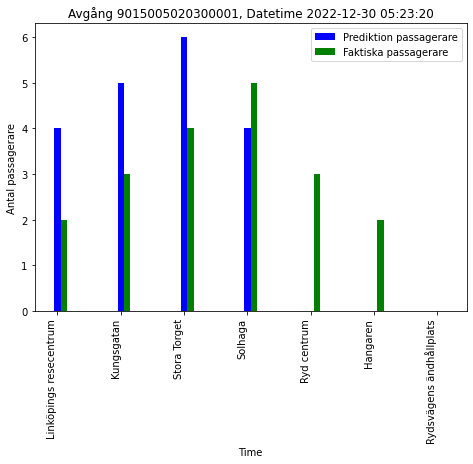

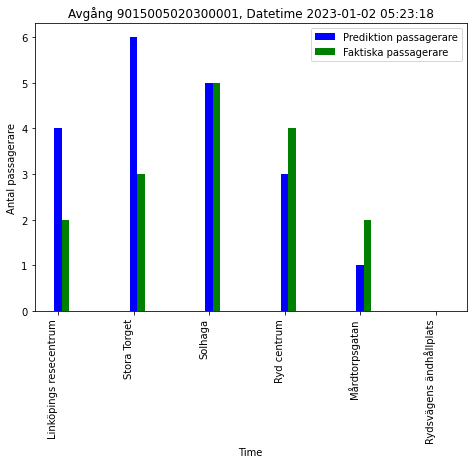

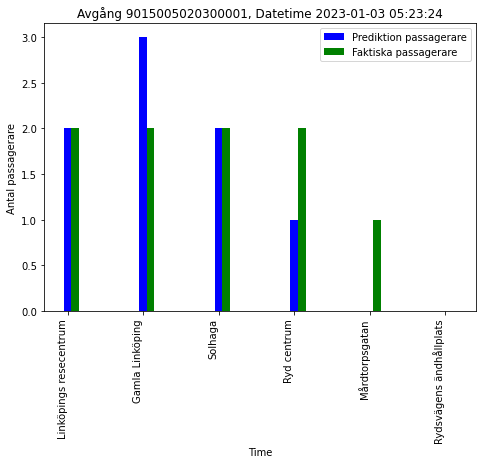

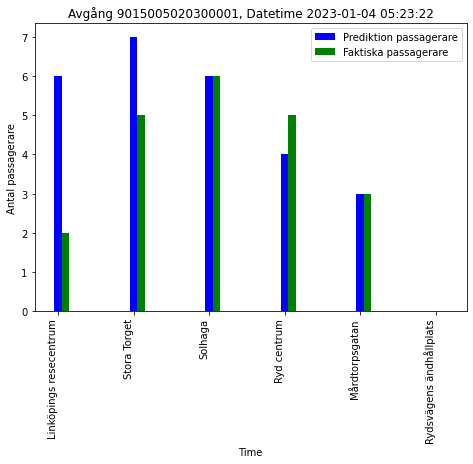

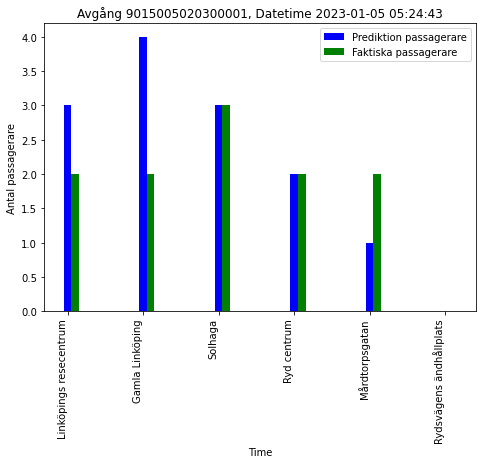

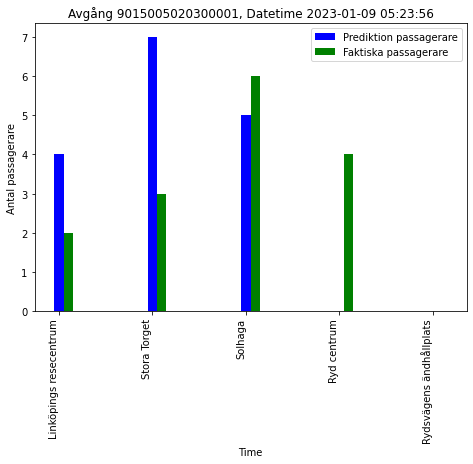

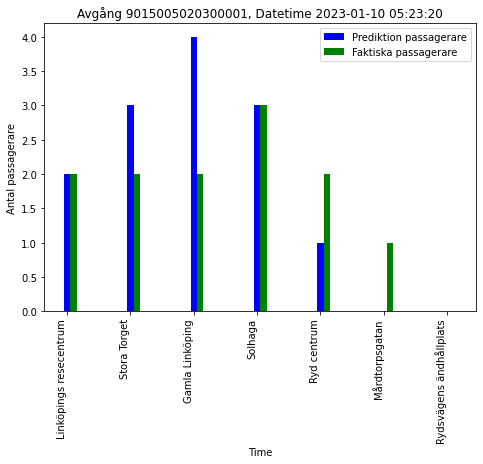

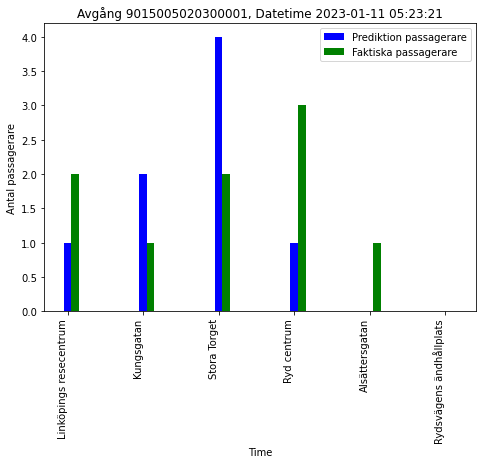

In [59]:
for i in range(0, len(saved_tours)):
    date_time = pd.to_datetime(saved_tours[i]['Tidpunkt'])
    stopname = saved_tours[i]['Hållplatsnamn']
    X = np.arange(len(saved_tours[i]))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    fig.autofmt_xdate(rotation=90)
    ax.bar(X + 0.00, saved_tours[i]['Ombord'].values, color = 'b', width = 0.1)
    ax.bar(X + 0.10, saved_tours[i]['prediction'].values, color = 'g', width = 0.1)

    xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xftm)
    title = 'Avgång ' + str(selected_GID) + ', Datetime ' + saved_tours[i]['Tidpunkt'].iloc[0]
    plt.xlabel('Time')
    plt.ylabel('Antal passagerare')
    plt.title(title)
    plt.xticks(X, stopname)   
    plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])